In [1]:
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import plotly
import numpy as np
import random
import hrr2 as hrr
import math
import state_machine_class as state_machine
import Gate_Class_v4 as gate
from plotly.graph_objs import Scatter, Layout, Surface
plotly.offline.init_notebook_mode(connected=True)

# Uses beta to bias value function

In [2]:
'''
def reward(loc,cue,size):
    if cue == 'red':
        if loc[0] == 0 and loc[1] == 0:
            return 1
        else:
            return 0
    elif cue == 'green': # middle point
        if loc[0] == 0 and loc[1] == size[1]-1:
            return 1
        else:
            return 0
'''

"\ndef reward(loc,cue,size):\n    if cue == 'red':\n        if loc[0] == 0 and loc[1] == 0:\n            return 1\n        else:\n            return 0\n    elif cue == 'green': # middle point\n        if loc[0] == 0 and loc[1] == size[1]-1:\n            return 1\n        else:\n            return 0\n"

In [3]:
# reward for transfer task
def reward(loc,cue,size):
    if cue == 'red':
        if loc[0] == 0 and loc[1] == 0:
            return 1
        else:
            return 0
    elif cue == 'green': 
        if loc[0] == 0 and loc[1] == size[1]-1:
            return 1
        else:
            return 0
    elif cue == 'purple': # middle
        if loc[0] == 0 and loc[1] == 2:
            return 1
        else:
            return 0

In [4]:
def punishment(loc,cue,size):
    if cue == 'red':
        if loc[0] == 0 and loc[1] == 0:
            return 0
        else:
            return -1
    elif cue == 'green': # middle point
        if loc[0] == 0 and loc[1] == size[1]-1:
            return 0
        else:
            return -1

In [5]:
def optimal_path_length(init_loc,cue):
    row,col = init_loc[0],init_loc[1]
    red = [ [0,1,2,2,1],
            [1,2,3,3,2],
            [2,3,4,4,3],
            [2,3,4,4,3],
            [1,2,3,3,2] ]
    
    green = [ [1,2,2,1,0],
              [2,3,3,2,1],
              [3,4,4,3,2],
              [3,4,4,3,2],
              [2,3,3,2,1] ]
    
    if cue == 0: # red
        return red[row][col]
    elif cue == 1:
        return green[row][col]
        

In [6]:
'''
def optimal_path_length_bottle(init_loc,cue):
    row,col = init_loc[0],init_loc[1]
    red = [ [0,1,2,3,4],
            [1,2,3,4,5],
            [6,5,4,5,6],
            [7,6,5,6,7],
            [8,7,6,7,8] ]
    
    green = [ [4,3,2,1,0],
              [5,4,3,2,1],
              [6,5,4,5,6],
              [7,6,5,6,7],
              [8,7,6,7,8] ]
    
    if cue == 0: # red
        return red[row][col]
    elif cue == 1:
        return green[row][col]
'''

'\ndef optimal_path_length_bottle(init_loc,cue):\n    row,col = init_loc[0],init_loc[1]\n    red = [ [0,1,2,3,4],\n            [1,2,3,4,5],\n            [6,5,4,5,6],\n            [7,6,5,6,7],\n            [8,7,6,7,8] ]\n    \n    green = [ [4,3,2,1,0],\n              [5,4,3,2,1],\n              [6,5,4,5,6],\n              [7,6,5,6,7],\n              [8,7,6,7,8] ]\n    \n    if cue == 0: # red\n        return red[row][col]\n    elif cue == 1:\n        return green[row][col]\n'

In [7]:
# Error for Transfer Task
def optimal_path_length_bottle(init_loc,cue):
    row,col = init_loc[0],init_loc[1]
    red = [ [0,1,2,3,4],
            [1,2,3,4,5],
            [6,5,4,5,6],
            [7,6,5,6,7],
            [8,7,6,7,8] ]
    
    green = [ [4,3,2,1,0],
              [5,4,3,2,1],
              [6,5,4,5,6],
              [7,6,5,6,7],
              [8,7,6,7,8] ]
    
    purple = [ [2,1,0,1,2],
               [3,2,1,2,3],
               [4,3,2,3,4],
               [5,4,3,4,5],
               [6,5,4,5,6] ]
    
    if cue == 0: # red
        return red[row][col]
    elif cue == 1:
        return green[row][col]
    elif cue == 2:
        return purple[row][col]

In [8]:
def store_data(fname,datalist):
    # store data in file [episode,row,col,colors[color],o_gate_state]
    f_obj = open(fname,"w")
    #datalist = [[1,1,2,'red',0],[1,3,4,'red',0],[2,5,6,'red',0],[2,7,8,'red',0]]
    for row in datalist:
        f_obj.writelines("%s " % mydata for mydata in row)
        f_obj.write("\n")
    f_obj.close()

In [9]:
# stores 1D list of weights in file
def store_weights(fname,datalist):
    f_obj = open(fname,"w")
    for item in datalist:
        f_obj.write(str(item))
        f_obj.write("\n")

In [10]:
# load weights into 1D list from file
def load_weights(fname):
    W = []
    f_obj = open(fname,"r")
    for item in f_obj:
        W.append(float(item))
        
    return np.array(W)

In [11]:
def Testing_Phase(WM_Objs,state_size,nepisodes,stat_window):
    n = 1024
    nagent_actions = 4
    gate_actions = 2
    ncolors = 2
    nslots = 1
    nroles = 1
    nrolestates = 2
    Closed,Open = 0,1
    agent_actions = ['up','down','left','right']
    colors = ['red','green',''] # external colors
    nothing = len(colors)-1
    #wm_colors = ['wm_red','wm_green',''] # internal colors
    roles = ['role_avail','role_unavail']
    gate_actions = ['closed','open']
    gateclosed = 'gateclosed'
    gateopen = 'gateopen'
    
    nrows,ncols = state_size
    state_table = state_machine.state_machine.generate_state_table_bottle(nrows,ncols)
    
    LTM_obj = WM_Objs[0]
    agent = WM_Objs[1]
    i_gate = WM_Objs[2]
    o_gate = WM_Objs[3]
    WM = WM_Objs[4]
    s_mac = state_machine.state_machine(state_table)
    nsteps = 100
    goal = [ [0,0],[0,ncols-1] ]
    value_function = np.zeros((nrows,ncols)) # store Q values for statitics
     # track performance
    opt_array = []
    diff_array = []
    t1 = "t1"
    
    handhold = 0
    anneal = 0
    
    o_gate_correct = 0 # stats for output gate
    o_gate_total = 0 # stats for output gate
    o_gate_correct_shared = 0
    o_gate_correct_non = 0
    shared_total = 0
    non_total = 0
    o_gate_stat = []
    mean_o_gate = []
    
    fname = "agent_output.dat"
    agent_output = [] # used for showing agent move in maze world
    for episode in range(nepisodes):
        
        row = random.randrange(2,nrows) # get random row for state (in shared area)
        col = random.randrange(0,ncols) # get random col for state
        cur_loc = [row,col] # current location of agent
        color_signal = random.randrange(0,ncolors) # get random color
        color = color_signal # used for reward because color signal may change
        #r = reward(cur_loc,colors[color],state_size) if color!=nothing else 0
        
        if episode == anneal:
            agent.epsilon,i_gate.epsilon,o_gate.epsilon = 0,0,0
        #optimal_steps = optimal_path_length(cur_loc,color_signal) # get optimal steps to goal 
        optimal_steps = optimal_path_length_bottle(cur_loc,color_signal) # get optimal steps to goal 
        state = (state_table[row][col])["state"] # current state
        
        role_i = 0 if color_signal!=nothing else 1
        slot = 0
        igate_restrict = [0,1] # restricted set 
        ogate_restrict = [0,1] # restricted set
        
        #igate_restrict = [1] if episode < 20000 else [0,1] # hand holding
        #ogate_restrict = [1] if episode < handhold else [0,1] # hand holding
        ''''
        if episode < handhold: # hand holding
            ogate_restrict = [0] if row >= 2 else [1]
        else:
            ogate_restrict = [0,1]
        '''
        
        WM.flush_all_wm_maint()
        #print("cue:",colors[color_signal])
        #print("role_i:",roles[role_i])
        i_gate_input = roles[role_i]+'*'+state+'*'+t1
        LTM_obj.encode(i_gate_input)
        i_gate_state,i_value,i_max,i_input,i_values = i_gate.action(i_gate_input,gate_actions,igate_restrict)
        WM.wm_in_flow(i_gate_state,slot,color_signal) # control flow of wm contents
        #print("i_gate:",i_gate_state)
        #print("wm_in:",WM.get_one_wm_maint(slot))
        role_o = 1 if WM.wm_maint_slot_is_empty(slot) else 0
        #print("role_o:",roles[role_o])
        o_gate_input = roles[role_o]+'*'+state+'*'+t1
        LTM_obj.encode(o_gate_input)
        o_gate_state,o_value,o_max,o_input,o_values = o_gate.action(o_gate_input,gate_actions,ogate_restrict)
        WM.wm_out_flow(o_gate_state,slot) # wm out contents for given slots
        wm_out = WM.get_one_wm_output(slot)
        #print("o_gate:",o_gate_state)
        #print("wm_out:",WM.get_one_wm_output(slot))
        #print("\n\n")
        
        if o_gate_state == Closed:
            agent_input = gateclosed+'*'+colors[color_signal]+'*'+state+'*'+wm_out+'*'+t1
            LTM_obj.encode(agent_input)
        else:
            agent_input = colors[color_signal]+'*'+state+'*'+wm_out+'*'+t1
            LTM_obj.encode(agent_input)
        
        #agent_input = colors[color_signal]+'*'+state+'*'+wm_out+'*'+t1
        action_restrict = (state_table[row][col])["action_restrict"]# get restricted action set
        action,a_value,a_max,a_input,a_values = agent.action(agent_input,agent_actions,action_restrict) # agent action
        #print("agent_value: ",a_value)
        #print("input_value: ",i_value)
        #print("output_value:",o_value)
        o_gate_correct_shared += 1 if o_gate_state == Closed else 0
        shared_total += 1
        #o_gate_total += 1
        
        i_gate.set_eligibility_zero()
        o_gate.set_eligibility_zero()
        agent.set_eligibility_zero() # set eligibility trace to zero
        WM.flush_all_wm_output()
        init_state = 'S'+str(cur_loc[0])+str(cur_loc[1])
        agent_output.append([init_state,episode,row,col,colors[color],o_gate_state]) # stores agents movement for visualization
        for step in range(nsteps):
            r = reward(cur_loc,colors[color],state_size) if color!=nothing else 0
            #r = punishment(cur_loc,colors[color],state_size) if color!=nothing else -1
            #print(state)
            if color!=nothing and cur_loc == goal[color]:
                i_gate.eligibility_trace_update(i_input)
                o_gate.eligibility_trace_update(o_input)
                agent.eligibility_trace_update(a_input)
                i_gate.td_update_goal(r,i_value)
                o_gate.td_update_goal(r,o_value)
                agent.td_update_goal(r,a_value)
                #print('goal!!!')
                break
                
            p_a_input = agent_input
            p_i_input = i_gate_input
            p_o_input = o_gate_input
            p_a_action = action
            p_i_action = i_gate_state
            p_o_action = o_gate_state
            p_action_restrict = action_restrict
            p_igate_restrict = igate_restrict
            p_ogate_restrict = ogate_restrict
        
            p_loc = cur_loc
            p_i_value = i_value # Q val for input gate
            p_i_max = i_max
            p_o_value = o_value # Q val for output gate
            p_o_max = o_max
            p_a_value = a_value # Q val for agent
            p_a_max = a_max
            
            # update eligibility traces
            i_gate.eligibility_trace_update(i_input)
            o_gate.eligibility_trace_update(o_input)
            agent.eligibility_trace_update(a_input)
            # move agent
            state,cur_loc = s_mac.move(p_loc,action)
            row,col = cur_loc[0],cur_loc[1]
            color_signal = 2 # turn off cue
            
            role_i = 0 if color_signal!=nothing else 1
            igate_restrict = [0] # restricted set 
            ogate_restrict = [0,1] # restricted set
            #ogate_restrict = [1] if episode < handhold else [0,1] # hand holding
            '''
            if episode < handhold: # hand holding
                ogate_restrict = [0] if row >= 2 else [1]
            else:
                ogate_restrict = [0,1]
            '''
            #
            #print("cue:",colors[color_signal])
            #print("role_i:",roles[role_i])
            i_gate_input = roles[role_i]+'*'+state
            LTM_obj.encode(i_gate_input)
            i_gate_state,i_value,i_max,i_input,i_values = i_gate.action(i_gate_input,gate_actions,igate_restrict)
            #print("i_gate:",i_gate_state)
            WM.wm_in_flow(i_gate_state,slot,color_signal) # control flow of wm contents
            #print("wm_in:",WM.get_one_wm_maint(slot))
            role_o = 1 if WM.wm_maint_slot_is_empty(slot) else 0
            o_gate_input = roles[role_o]+'*'+state
            LTM_obj.encode(o_gate_input)
            o_gate_state,o_value,o_max,o_input,o_values = o_gate.action(o_gate_input,gate_actions,ogate_restrict)
            #print("role_o:",roles[role_o])
            #print("o_gate:",o_gate_state)
            WM.wm_out_flow(o_gate_state,slot) # wm out contents for given slots
            wm_out = WM.get_one_wm_output(slot)
            #print("wm_out:",wm_out)
            #print("\n\n")
            
            if o_gate_state == Closed:
                agent_input = gateclosed+'*'+colors[color_signal]+'*'+state+'*'+wm_out
                LTM_obj.encode(agent_input)
            else:
                agent_input = colors[color_signal]+'*'+state+'*'+wm_out
                LTM_obj.encode(agent_input)
            
            #agent_input = colors[color_signal]+'*'+state+'*'+wm_out
            action_restrict = (state_table[row][col])["action_restrict"]# get restricted action set
            action,a_value,a_max,a_input,a_values = agent.action(agent_input,agent_actions,action_restrict) # agent action

            # Bias gates to stay in a state for long periods of time
            a_beta = 0
            if a_value > 0:
                if p_a_action == action:
                    a_beta = 0
                else:
                    a_beta = 1
            else:
                if p_a_action == action:
                    a_beta = 1
                else:
                    a_beta = 0
        
            o_beta = 0
            if a_value > 0:
                if p_o_action == o_gate_state:
                    o_beta = 0
                else:
                    o_beta = 1
            else:
                if p_o_action == o_gate_state:
                    o_beta = 1
                else:
                    o_beta = 0
                    
            i_beta = 0
            if a_value > 0:
                if p_i_action == i_gate_state:
                    i_beta = 0
                else:
                    i_beta = 1
            else:
                if p_i_action == i_gate_state:
                    i_beta = 1
                else:
                    i_beta = 0
            # -------------------------------------
            
            if row >= 2:
                o_gate_correct_shared += 1 if o_gate_state == Closed else 0
                shared_total += 1
            else:
                o_gate_correct_non += 1 if o_gate_state == Open else 0
                non_total += 1
            #o_gate_total += 1
            
            #agent.td_update(r,a_value,p_a_value)
            #o_gate.td_update(r,a_value,p_o_value)
            #i_gate.td_update(r,a_value,p_i_value)
            '''
            agent.td_update_transfer(r,a_value,p_a_value,a_beta)
            o_gate.td_update_transfer(r,a_value,p_o_value,o_beta)
            i_gate.td_update_transfer(r,a_value,p_i_value,i_beta)
            '''
            WM.flush_all_wm_output()
            agent_output.append([init_state,episode,row,col,colors[color],o_gate_state]) # stores agent movement for visualization
            
        if color != nothing:    
            step_diff = abs(step-optimal_steps)
            #print(step_diff)
            opt_array.append(step_diff)
            #o_gate_stat.append(o_gate_correct/o_gate_total)
        if (episode+1)%stat_window == 0:
            # print performance
            mean_diff = sum(opt_array)/len(opt_array)
            diff_array.append(mean_diff)
            #mean_o = sum(o_gate_stat)/len(o_gate_stat)
            #mean_o_gate.append(mean_o)
            plt.plot(diff_array)
            plt.show()
            opt_array = []
            o_gate_stat = []
            
            print("agent_value:",a_value)
            print("input_value:",i_value)
            print("output_value:",o_value)
            print("mean diff:",mean_diff)
            print("mean o_gate_shared:",o_gate_correct_shared/shared_total)
            print("mean o_gate_non:",o_gate_correct_non/non_total)
            o_gate_correct_shared = 0
            o_gate_correct_non = 0
            shared_total = 0
            non_total = 0
            o_gate_total = 0
            ###################
    store_data(fname, agent_output)      
    return LTM_obj, agent, i_gate, o_gate, WM

# Output Gate Model with Handholding

In [12]:
def IO_gate_model(state_size,nepisodes,stat_window):
    n = 128
    nagent_actions = 4
    gate_actions = 2
    ncolors = 2
    nslots = 1
    nroles = 1
    nrolestates = 2
    Closed,Open = 0,1
    agent_actions = ['up','down','left','right']
    colors = ['red','green',''] # external colors
    nothing = len(colors)-1
    #wm_colors = ['wm_red','wm_green',''] # internal colors
    roles = ['role_avail','role_unavail']
    gate_actions = ['closed','open']
    gateclosed = 'gateclosed'
    gateopen = 'gateopen'
    
    nrows,ncols = state_size
    state_table = state_machine.state_machine.generate_state_table_bottle(nrows,ncols)
    
    LTM_obj = hrr.LTM(n,True)
    #agent = gate.Q_learning(n,LTM_obj,epsilon=0.05,bias=1)
    agent = gate.Q_learning(n,LTM_obj,epsilon=0.01,bias=0)
    i_gate = gate.Q_learning(n,LTM_obj,epsilon=0.01,bias=0)
    o_gate = gate.Q_learning(n,LTM_obj,epsilon=0.01,bias=0)
    WM = gate.wm_content(colors,nslots,LTM_obj)
    s_mac = state_machine.state_machine(state_table)
    nsteps = 100
    goal = [ [0,0],[0,ncols-1] ]
    value_function = np.zeros((nrows,ncols)) # store Q values for statitics
     # track performance
    opt_array = []
    diff_array = []
    t1 = ""
    
    handhold = 300000
    anneal = 400000
    
    o_gate_correct = 0 # stats for output gate
    o_gate_total = 0 # stats for output gate
    o_gate_correct_shared = 0
    o_gate_correct_non = 0
    shared_total = 0
    non_total = 0
    o_gate_stat = []
    mean_o_gate = []
    
    for episode in range(nepisodes):
        
        count = 0
        #t1 = str(count)
        t1 = "t1"
        row = random.randrange(2,nrows) # get random row for state (in shared area)
        col = random.randrange(0,ncols) # get random col for state
        cur_loc = [row,col] # current location of agent
        color_signal = random.randrange(0,ncolors) # get random color
        color = color_signal # used for reward because color signal may change
        #r = reward(cur_loc,colors[color],state_size) if color!=nothing else 0
        
        if episode == anneal:
            agent.epsilon,i_gate.epsilon,o_gate.epsilon = 0,0,0
        #optimal_steps = optimal_path_length(cur_loc,color_signal) # get optimal steps to goal 
        optimal_steps = optimal_path_length_bottle(cur_loc,color_signal) # get optimal steps to goal 
        state = (state_table[row][col])["state"] # current state
        
        role_i = 0 if color_signal!=nothing else 1
        slot = 0
        igate_restrict = [0,1] # restricted set 
        ogate_restrict = [0,1] # restricted set

        
        if episode < handhold: # hand holding
            ogate_restrict = [0] if row >= 2 else [1]
        else:
            ogate_restrict = [0,1]
        
        
        WM.flush_all_wm_maint()
        #print("cue:",colors[color_signal])
        #print("role_i:",roles[role_i])
        i_gate_input = roles[role_i]+'*'+state+'*'+t1
        LTM_obj.encode(i_gate_input)
        i_gate_state,i_value,i_max,i_input,i_values = i_gate.action(i_gate_input,gate_actions,igate_restrict)
        WM.wm_in_flow(i_gate_state,slot,color_signal) # control flow of wm contents
        #print("i_gate:",i_gate_state)
        #print("wm_in:",WM.get_one_wm_maint(slot))
        role_o = 1 if WM.wm_maint_slot_is_empty(slot) else 0
        #print("role_o:",roles[role_o])
        o_gate_input = roles[role_o]+'*'+state+'*'+t1
        LTM_obj.encode(o_gate_input)
        o_gate_state,o_value,o_max,o_input,o_values = o_gate.action(o_gate_input,gate_actions,ogate_restrict)
        WM.wm_out_flow(o_gate_state,slot) # wm out contents for given slots
        wm_out = WM.get_one_wm_output(slot)
        #print("o_gate:",o_gate_state)
        #print("wm_out:",WM.get_one_wm_output(slot))
        #print("\n\n")
        
        if o_gate_state == Closed:
            agent_input = gateclosed+'*'+colors[color_signal]+'*'+state+'*'+wm_out+'*'+t1
            LTM_obj.encode(agent_input)
        else:
            agent_input = colors[color_signal]+'*'+state+'*'+wm_out+'*'+t1
            LTM_obj.encode(agent_input)
        
        #agent_input = colors[color_signal]+'*'+state+'*'+wm_out+'*'+t1
        action_restrict = (state_table[row][col])["action_restrict"]# get restricted action set
        action,a_value,a_max,a_input,a_values = agent.action(agent_input,agent_actions,action_restrict) # agent action
        #print("agent_value: ",a_value)
        #print("input_value: ",i_value)
        #print("output_value:",o_value)
        
        o_gate_correct_shared += 1 if o_gate_state == Closed else 0
        shared_total += 1
        
        i_gate.set_eligibility_zero()
        o_gate.set_eligibility_zero()
        agent.set_eligibility_zero() # set eligibility trace to zero
        WM.flush_all_wm_output()
        count += 1
        for step in range(nsteps):
            
            #t1 = str(count)
            t1 = ''
            r = reward(cur_loc,colors[color],state_size) if color!=nothing else 0
            #r = punishment(cur_loc,colors[color],state_size) if color!=nothing else -1
            #print(state)
            if color!=nothing and cur_loc == goal[color]:
                i_gate.eligibility_trace_update(i_input)
                o_gate.eligibility_trace_update(o_input)
                agent.eligibility_trace_update(a_input)
                i_gate.td_update_goal(r,i_value)
                o_gate.td_update_goal(r,o_value)
                agent.td_update_goal(r,a_value)
                #print('goal!!!')
                break
                
            p_a_input = agent_input
            p_i_input = i_gate_input
            p_o_input = o_gate_input
            p_a_action = action
            p_i_action = i_gate_state
            p_o_action = o_gate_state
            p_action_restrict = action_restrict
            p_igate_restrict = igate_restrict
            p_ogate_restrict = ogate_restrict
        
            p_loc = cur_loc
            p_i_value = i_value # Q val for input gate
            p_i_max = i_max
            p_o_value = o_value # Q val for output gate
            p_o_max = o_max
            p_a_value = a_value # Q val for agent
            p_a_max = a_max
            
            # update eligibility traces
            i_gate.eligibility_trace_update(i_input)
            o_gate.eligibility_trace_update(o_input)
            agent.eligibility_trace_update(a_input)
            # move agent
            state,cur_loc = s_mac.move(p_loc,action)
            row,col = cur_loc[0],cur_loc[1]
            color_signal = 2 # turn off cue
            
            role_i = 0 if color_signal!=nothing else 1
            igate_restrict = [0] # restricted set 
            ogate_restrict = [0,1] # restricted set
            #ogate_restrict = [1] if episode < handhold else [0,1] # hand holding
            
            if episode < handhold: # hand holding
                ogate_restrict = [0] if row >= 2 else [1]
            else:
                ogate_restrict = [0,1]
            
            #
            #print("cue:",colors[color_signal])
            #print("role_i:",roles[role_i])
            i_gate_input = roles[role_i]+'*'+state+'*'+t1
            LTM_obj.encode(i_gate_input)
            i_gate_state,i_value,i_max,i_input,i_values = i_gate.action(i_gate_input,gate_actions,igate_restrict)
            #print("i_gate:",i_gate_state)
            WM.wm_in_flow(i_gate_state,slot,color_signal) # control flow of wm contents
            #print("wm_in:",WM.get_one_wm_maint(slot))
            role_o = 1 if WM.wm_maint_slot_is_empty(slot) else 0
            o_gate_input = roles[role_o]+'*'+state+'*'+t1
            LTM_obj.encode(o_gate_input)
            o_gate_state,o_value,o_max,o_input,o_values = o_gate.action(o_gate_input,gate_actions,ogate_restrict)
            #print("role_o:",roles[role_o])
            #print("o_gate:",o_gate_state)
            WM.wm_out_flow(o_gate_state,slot) # wm out contents for given slots
            wm_out = WM.get_one_wm_output(slot)
            #print("wm_out:",wm_out)
            #print("\n\n")
            
            if o_gate_state == Closed:
                agent_input = gateclosed+'*'+colors[color_signal]+'*'+state+'*'+wm_out+'*'+t1
                LTM_obj.encode(agent_input)
            else:
                agent_input = colors[color_signal]+'*'+state+'*'+wm_out+'*'+t1
                LTM_obj.encode(agent_input)
            
            #agent_input = colors[color_signal]+'*'+state+'*'+wm_out
            action_restrict = (state_table[row][col])["action_restrict"]# get restricted action set
            action,a_value,a_max,a_input,a_values = agent.action(agent_input,agent_actions,action_restrict) # agent action
            # ----------------------------------
            # Bias gates to stay in a state for long periods of time
            
            a_beta = 0
            '''
            if a_value > 0:
                if p_a_action == action:
                    a_beta = 0
                else:
                    a_beta = 1
            else:
                if p_a_action == action:
                    a_beta = 1
                else:
                    a_beta = 0
            '''
            o_beta = 0
            '''
            if a_value > 0:
                if p_o_action == o_gate_state:
                    o_beta = 0
                else:
                    o_beta = 1
            else:
                if p_o_action == o_gate_state:
                    o_beta = 1
                else:
                    o_beta = 0
            '''       
            i_beta = 0
            '''
            if a_value > 0:
                if p_i_action == i_gate_state:
                    i_beta = 0
                else:
                    i_beta = 1
            else:
                if p_i_action == i_gate_state:
                    i_beta = 1
                else:
                    i_beta = 0
            '''
            # -------------------------------------
            if row >= 2:
                o_gate_correct_shared += 1 if o_gate_state == Closed else 0
                shared_total += 1
            else:
                o_gate_correct_non += 1 if o_gate_state == Open else 0
                non_total += 1
            
            
            '''
            agent.td_update(r,a_value,p_a_value)
            o_gate.td_update(r,a_value,p_o_value)
            i_gate.td_update(r,a_value,p_i_value)
            '''
            
            agent.td_update_transfer(r,a_value,p_a_value,a_beta)
            o_gate.td_update_transfer(r,a_value,p_o_value,o_beta)
            i_gate.td_update_transfer(r,a_value,p_i_value,i_beta)
            
            
            WM.flush_all_wm_output()
            count += 1
        if color != nothing:    
            step_diff = abs(step-optimal_steps)
            #print(step_diff)
            opt_array.append(step_diff)
        if (episode+1)%stat_window == 0:
            # print performance
            mean_diff = sum(opt_array)/len(opt_array)
            diff_array.append(mean_diff)
            plt.plot(diff_array)
            plt.show()
            opt_array = []
            print("agent_value:",a_value)
            print("input_value:",i_value)
            print("output_value:",o_value)
            print("mean diff:",mean_diff)
            ###################
            if shared_total > 0:
                print("mean o_gate_shared:",o_gate_correct_shared/shared_total)
            if non_total > 0:
                print("mean o_gate_non:",o_gate_correct_non/non_total)
            o_gate_correct_shared = 0
            o_gate_correct_non = 0
            shared_total = 0
            non_total = 0
            o_gate_total = 0
    #WA,fname1 = agent.get_weights(), "IO_Model_agent_weights.txt" # agent weights
    #WO,fname2 = o_gate.get_weights(), "IO_Model_output_weights.txt"# output gate weights
    #WI,fname3 = i_gate.get_weights(), "IO_Model_input_weights.txt"# input gate weights
    #store_weights(fname1,WA) # store agent weights
    #store_weights(fname2,WO) # store output gate weights
    #store_weights(fname3,WI) # store input gate weights
    return LTM_obj, agent, i_gate, o_gate, WM

# Train Output Gate Model

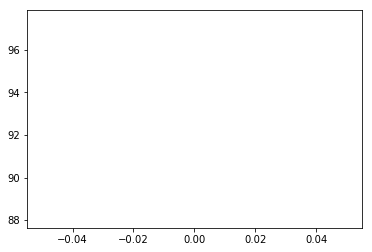

agent_value: -1.90581053424e-06
input_value: 6.706792861e-06
output_value: 4.34818636572e-06
mean diff: 92.742
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


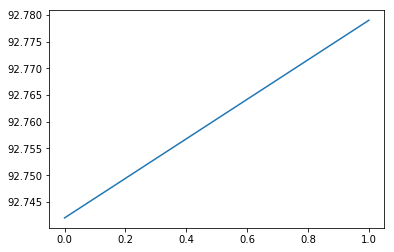

agent_value: 4.12163215363e-09
input_value: -5.81937449395e-07
output_value: -1.7484182745e-07
mean diff: 92.779
mean o_gate_shared: 1.0


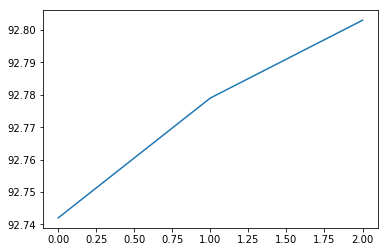

agent_value: -2.6101170768e-06
input_value: 8.78701253076e-06
output_value: 4.00228531839e-05
mean diff: 92.803
mean o_gate_shared: 1.0


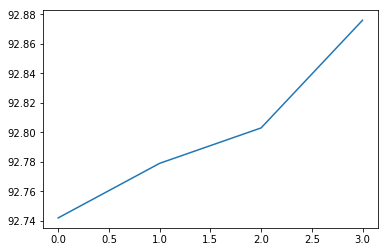

agent_value: 9.97778221885e-07
input_value: -5.22208118291e-06
output_value: -9.12148174053e-05
mean diff: 92.876
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


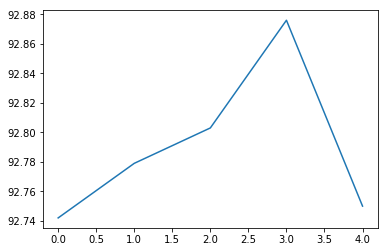

agent_value: 1.79883754604e-07
input_value: -1.27046130127e-06
output_value: -7.46689875632e-07
mean diff: 92.75
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


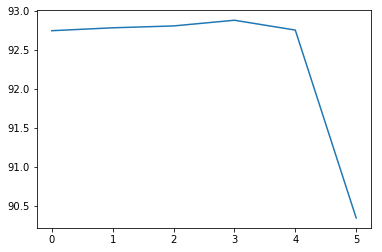

agent_value: 0.00114152282898
input_value: -0.0111698915876
output_value: 0.00457337083136
mean diff: 90.343
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


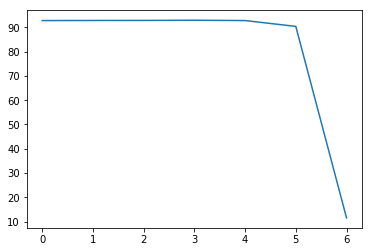

agent_value: 0.988819285785
input_value: 1.00283643757
output_value: 0.918672781984
mean diff: 11.567
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


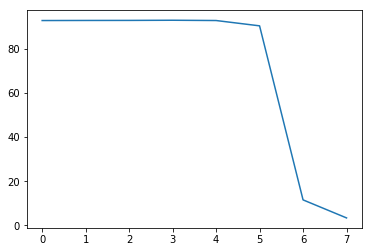

agent_value: 0.998966220289
input_value: 1.00436395731
output_value: 0.993361343189
mean diff: 3.403
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


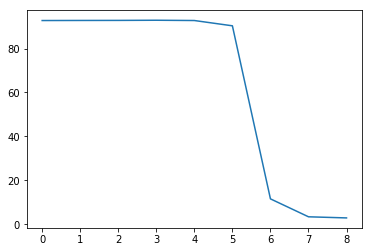

agent_value: 1.00853325689
input_value: 1.00499232363
output_value: 0.996099988022
mean diff: 2.893
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


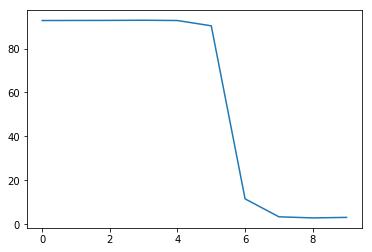

agent_value: 1.00137369649
input_value: 1.00513278725
output_value: 0.993351086796
mean diff: 3.134
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


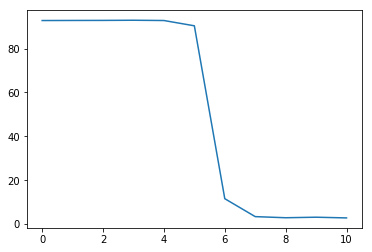

agent_value: 1.00903369556
input_value: 1.00410425829
output_value: 1.0036453311
mean diff: 2.813
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


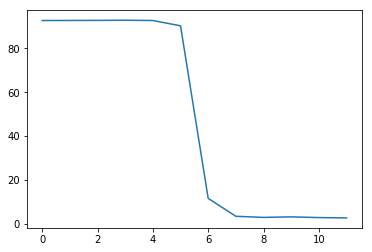

agent_value: 0.997228184305
input_value: 1.00829255179
output_value: 0.986746914495
mean diff: 2.657
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


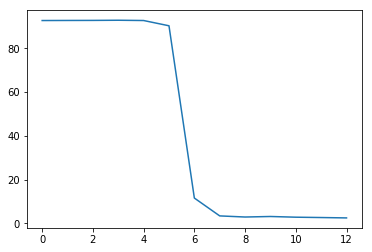

agent_value: 1.00322475423
input_value: 0.996064772724
output_value: 0.991371026554
mean diff: 2.483
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


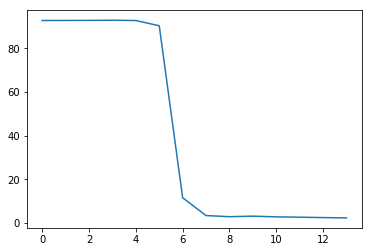

agent_value: 0.999705819774
input_value: 1.00330951196
output_value: 1.00031819432
mean diff: 2.329
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


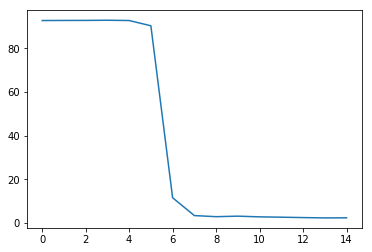

agent_value: 1.00304302776
input_value: 0.994915922944
output_value: 1.00014541296
mean diff: 2.374
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


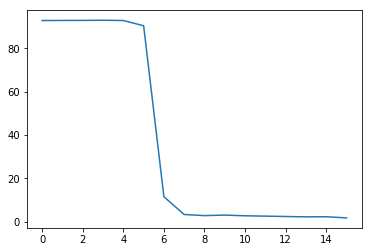

agent_value: 0.995438586459
input_value: 0.875218714325
output_value: 0.998790376421
mean diff: 1.834
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


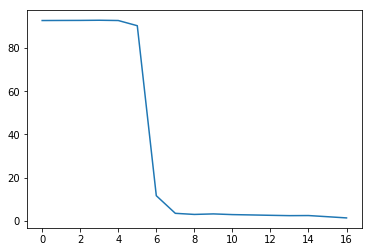

agent_value: 1.00289628587
input_value: 0.999068074172
output_value: 0.994378388673
mean diff: 1.276
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


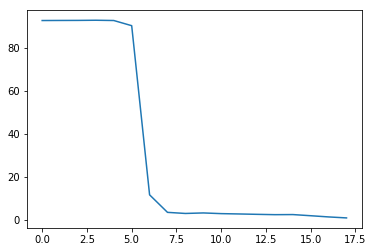

agent_value: 0.999893701221
input_value: 1.00102290498
output_value: 1.00053617692
mean diff: 0.816
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


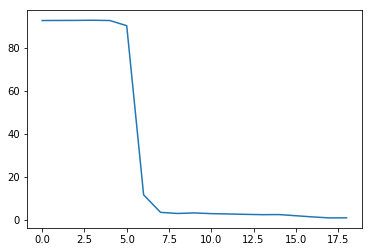

agent_value: 0.997839866376
input_value: 0.997408763418
output_value: 0.999005626109
mean diff: 0.85
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


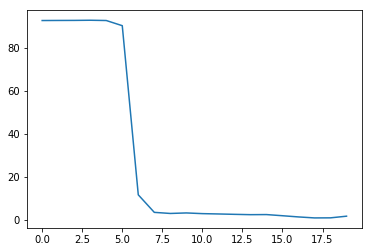

agent_value: 1.00418110731
input_value: 0.98538621866
output_value: 0.99363188675
mean diff: 1.622
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


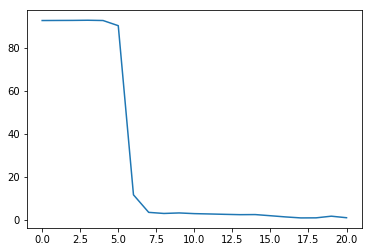

agent_value: 0.996311904119
input_value: 0.998836797447
output_value: 0.991069600613
mean diff: 0.905
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


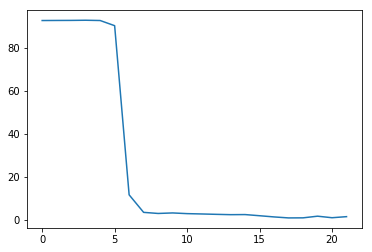

agent_value: 1.00186718769
input_value: 1.00033914403
output_value: 0.996142340976
mean diff: 1.405
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


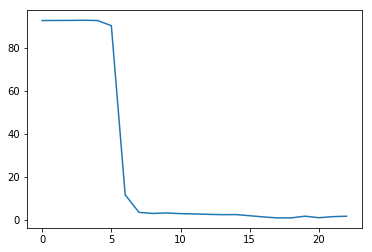

agent_value: 0.999537244089
input_value: 0.985999050765
output_value: 0.998740964099
mean diff: 1.605
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


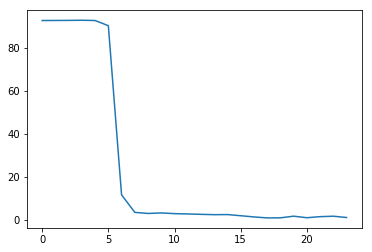

agent_value: 0.999427616999
input_value: 0.998602567498
output_value: 1.00108797269
mean diff: 1.006
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


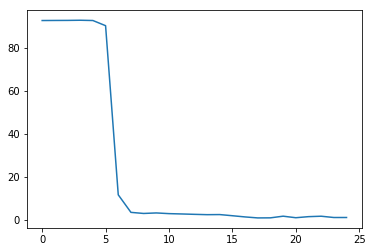

agent_value: 0.997974961103
input_value: 0.999103924398
output_value: 1.00786426929
mean diff: 1.012
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


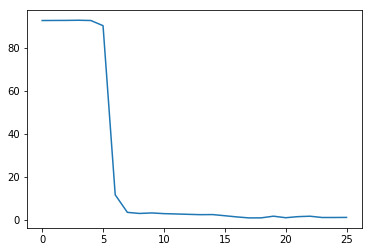

agent_value: 1.0032813252
input_value: 0.993249103737
output_value: 0.99463822135
mean diff: 1.049
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


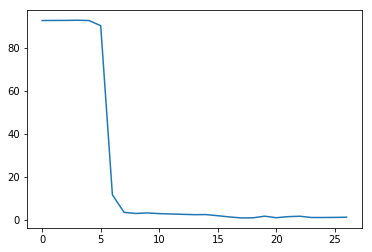

agent_value: 1.00017020472
input_value: 0.99745161974
output_value: 1.00123359234
mean diff: 1.151
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


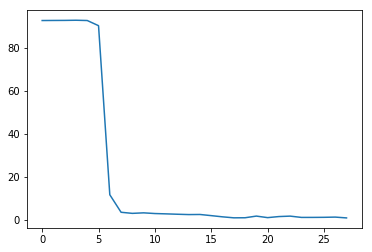

agent_value: 1.00051275243
input_value: 1.00084715278
output_value: 0.998945901024
mean diff: 0.772
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


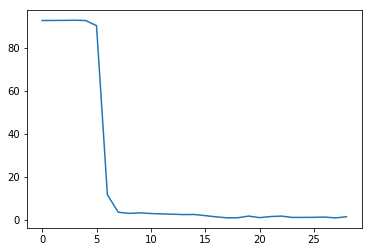

agent_value: 1.00426465513
input_value: 1.00570669117
output_value: 1.00856117242
mean diff: 1.324
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


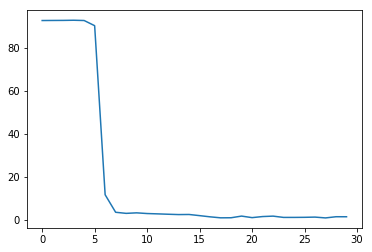

agent_value: 1.00387824268
input_value: 1.00301433981
output_value: 0.994040970566
mean diff: 1.315
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


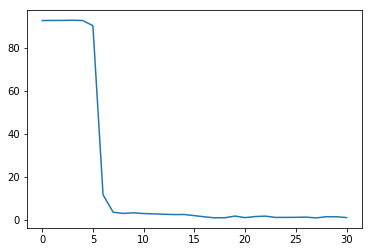

agent_value: 0.996194508206
input_value: 0.992458650251
output_value: 0.997185319323
mean diff: 0.934
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


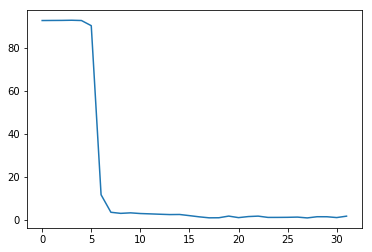

agent_value: 1.00502231624
input_value: 0.832029057344
output_value: 0.994066188063
mean diff: 1.59
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


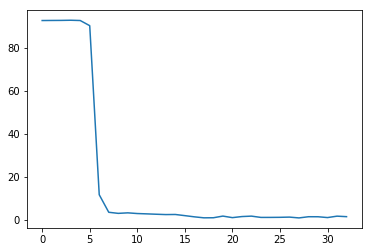

agent_value: 1.0015680951
input_value: 0.991148375528
output_value: 0.996852244184
mean diff: 1.356
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


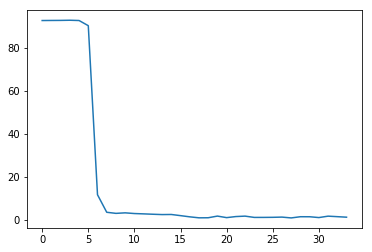

agent_value: 1.00026282167
input_value: 0.994242119574
output_value: 1.0023033273
mean diff: 1.11
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


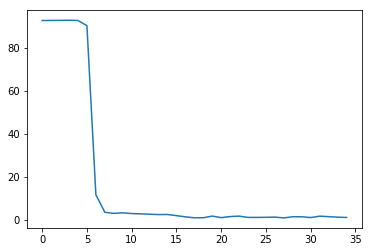

agent_value: 1.00476178113
input_value: 1.0015369764
output_value: 1.00721166667
mean diff: 0.978
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


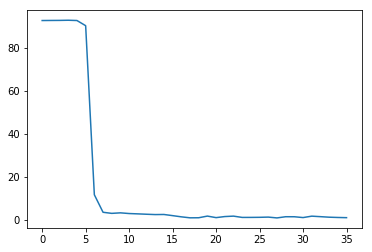

agent_value: 1.00131561694
input_value: 0.999003024687
output_value: 0.999535018475
mean diff: 0.888
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


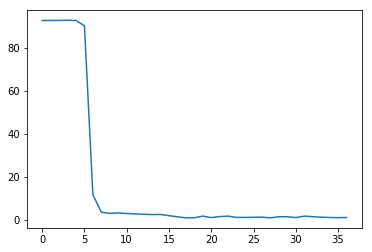

agent_value: 0.99949805065
input_value: 0.998340698083
output_value: 0.997981741018
mean diff: 0.966
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


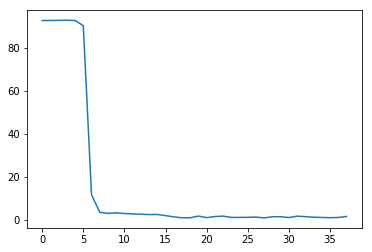

agent_value: 1.00285152192
input_value: 0.993497425296
output_value: 0.99838599965
mean diff: 1.456
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


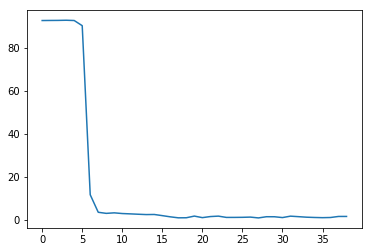

agent_value: 1.0041599981
input_value: 0.987256767463
output_value: 0.978128155838
mean diff: 1.46
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


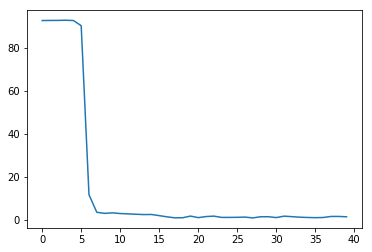

agent_value: 0.989231747021
input_value: 0.947024575307
output_value: 0.996770010291
mean diff: 1.301
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


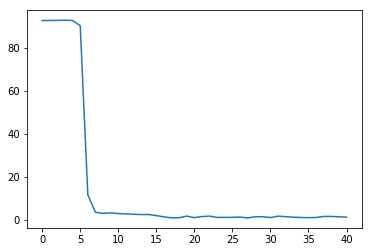

agent_value: 1.00071643734
input_value: 0.998418192997
output_value: 1.00555263148
mean diff: 1.134
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


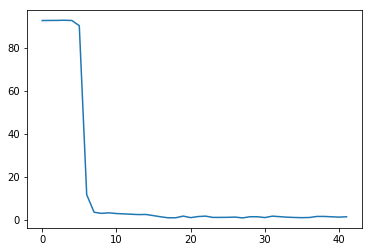

agent_value: 0.997652363445
input_value: 1.00290264609
output_value: 1.00380647824
mean diff: 1.309
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


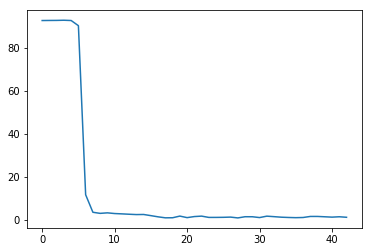

agent_value: 0.998131364629
input_value: 0.922859240642
output_value: 1.00900292161
mean diff: 1.068
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


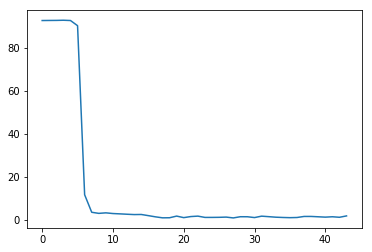

agent_value: 0.998745053136
input_value: 1.00373884936
output_value: 0.999227911669
mean diff: 1.706
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


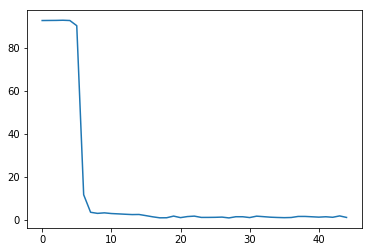

agent_value: 0.997712013553
input_value: 0.995638784491
output_value: 0.991399580525
mean diff: 0.993
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


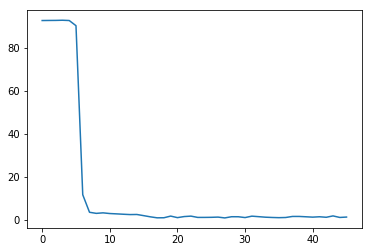

agent_value: 1.00070732619
input_value: 0.990316526089
output_value: 1.00149145404
mean diff: 1.169
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


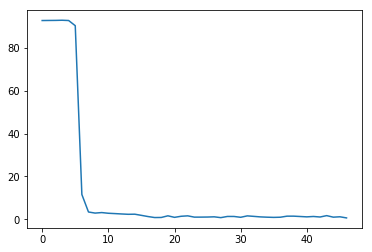

agent_value: 1.00205212452
input_value: 1.00247492984
output_value: 1.00031988195
mean diff: 0.64
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


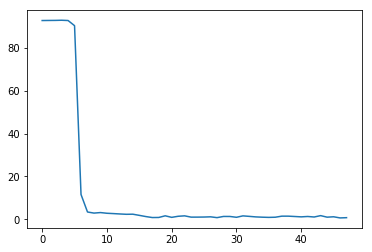

agent_value: 1.0016080884
input_value: 1.00033660252
output_value: 1.00099921557
mean diff: 0.753
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


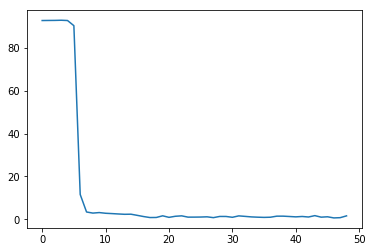

agent_value: 0.995971301262
input_value: 0.999009907971
output_value: 1.00224013311
mean diff: 1.601
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


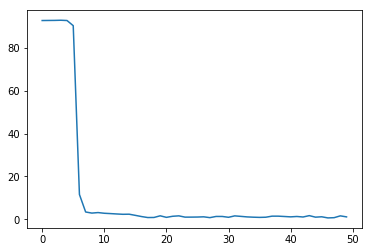

agent_value: 1.00050269675
input_value: 0.997190327238
output_value: 0.995478205135
mean diff: 1.124
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


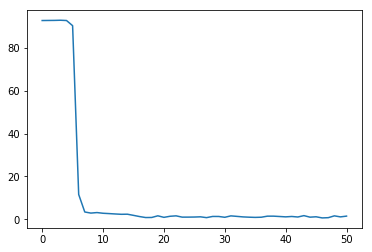

agent_value: 1.01203496299
input_value: 0.985761752014
output_value: 0.986784902225
mean diff: 1.48
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


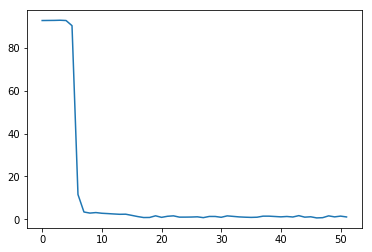

agent_value: 0.999942631199
input_value: 0.998372928703
output_value: 0.99807991699
mean diff: 1.09
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


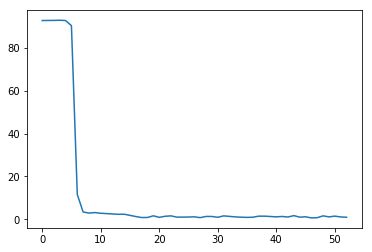

agent_value: 1.00127270154
input_value: 0.994947085762
output_value: 1.00223157788
mean diff: 0.95
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


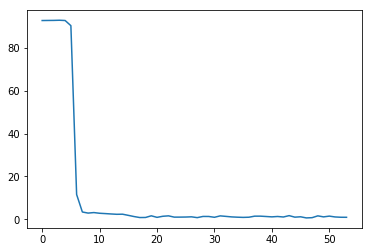

agent_value: 1.00161893026
input_value: 1.00199118796
output_value: 1.00544898942
mean diff: 0.932
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


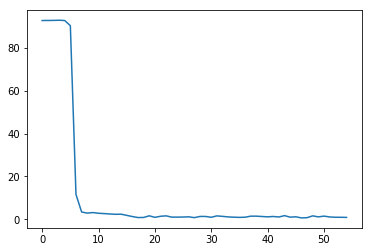

agent_value: 1.00157933093
input_value: 0.998151329437
output_value: 1.00238011982
mean diff: 0.883
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


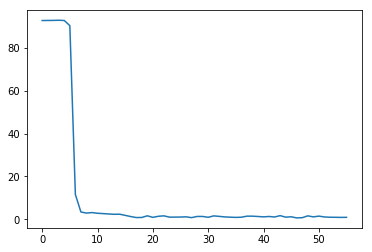

agent_value: 0.998171584312
input_value: 1.0109656916
output_value: 0.993049532181
mean diff: 0.916
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


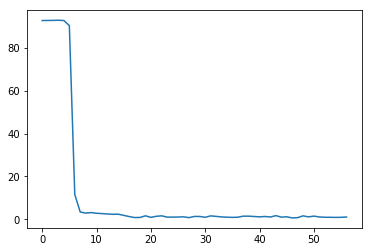

agent_value: 1.0020554314
input_value: 1.00151897597
output_value: 0.99914546161
mean diff: 1.067
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


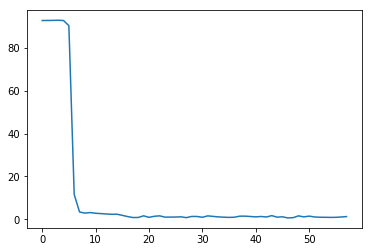

agent_value: 0.984694240004
input_value: 1.02707104884
output_value: 0.993568827396
mean diff: 1.268
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


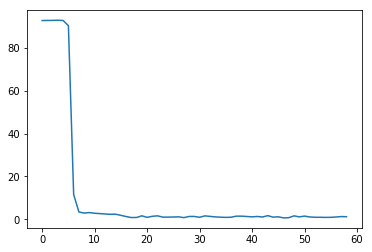

agent_value: 0.997831942229
input_value: 0.76841187506
output_value: 0.976052012176
mean diff: 1.197
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


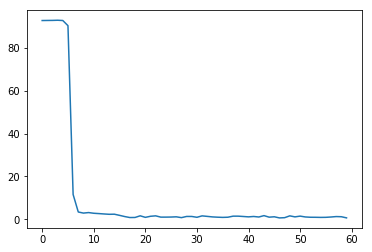

agent_value: 1.00090606545
input_value: 0.996394653566
output_value: 0.997934709914
mean diff: 0.662
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


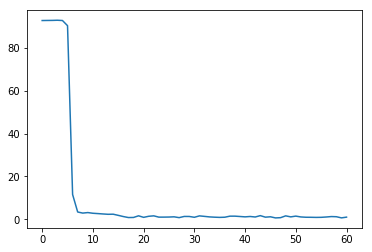

agent_value: 1.0015224475
input_value: 0.990236257565
output_value: 0.991192795599
mean diff: 1.001
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


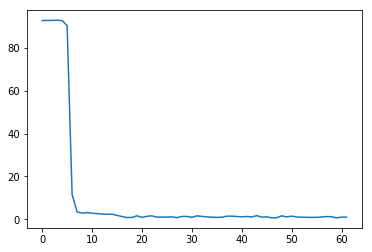

agent_value: 0.998070900028
input_value: 1.00421943546
output_value: 1.00697518793
mean diff: 1.01
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


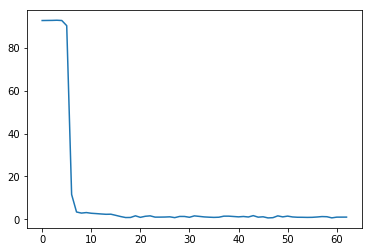

agent_value: 0.999900960048
input_value: 1.00541249091
output_value: 1.00013391098
mean diff: 1.018
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


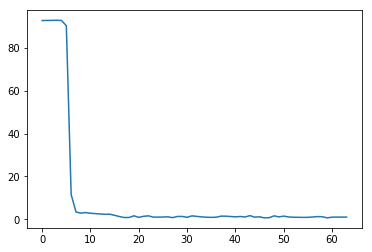

agent_value: 1.0001238605
input_value: 0.996363317954
output_value: 0.998757709501
mean diff: 1.026
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


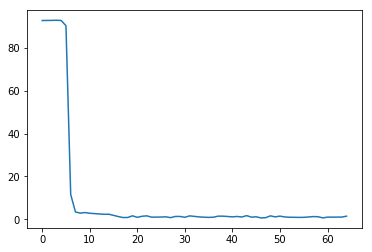

agent_value: 0.997148404419
input_value: 0.992782522719
output_value: 0.991273490799
mean diff: 1.45
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


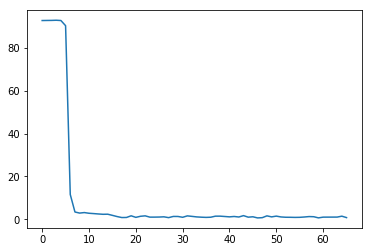

agent_value: 1.00054778637
input_value: 1.00335868814
output_value: 1.00156694807
mean diff: 0.784
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


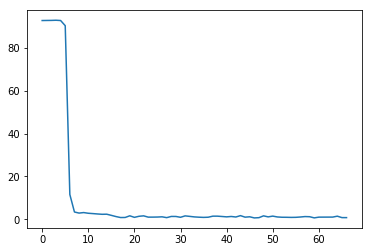

agent_value: 1.00093716091
input_value: 1.01690999207
output_value: 0.997938045991
mean diff: 0.775
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


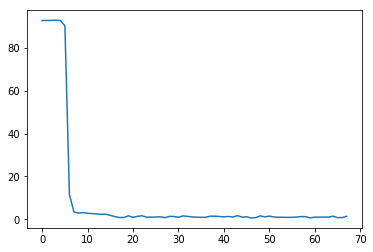

agent_value: 1.00634925614
input_value: 0.990487366542
output_value: 0.995220349206
mean diff: 1.378
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


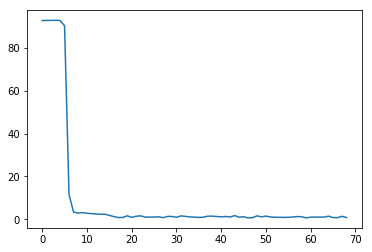

agent_value: 1.00447019951
input_value: 1.0137026143
output_value: 1.00028691795
mean diff: 0.821
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


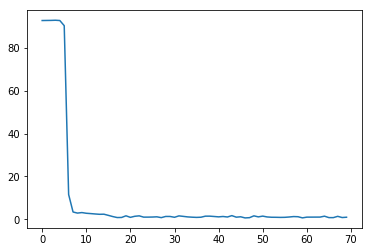

agent_value: 0.993624190526
input_value: 1.0056876437
output_value: 1.01341462334
mean diff: 0.964
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


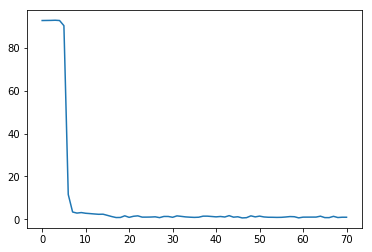

agent_value: 1.00393308365
input_value: 0.99960964638
output_value: 1.00516977667
mean diff: 0.956
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


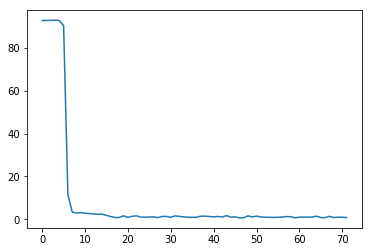

agent_value: 0.999571002147
input_value: 1.00595601654
output_value: 0.997872710402
mean diff: 0.814
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


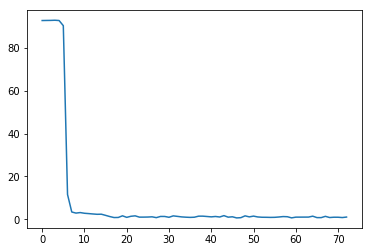

agent_value: 0.998266364879
input_value: 0.9990096539
output_value: 0.998687433088
mean diff: 1.039
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


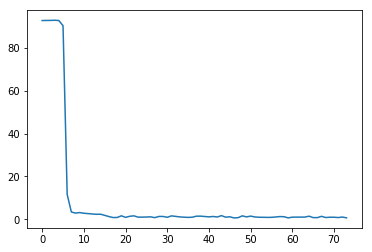

agent_value: 0.999986202666
input_value: 1.00219087037
output_value: 1.00455991868
mean diff: 0.68
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


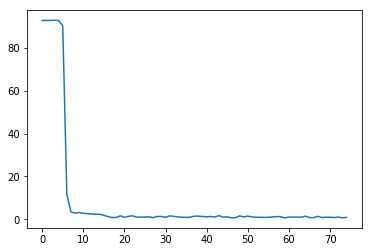

agent_value: 1.00096143922
input_value: 1.00009276676
output_value: 1.00057638429
mean diff: 0.917
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


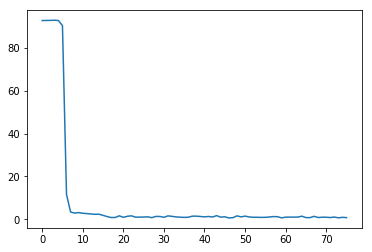

agent_value: 0.998503081645
input_value: 0.996984750635
output_value: 1.00165675677
mean diff: 0.784
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


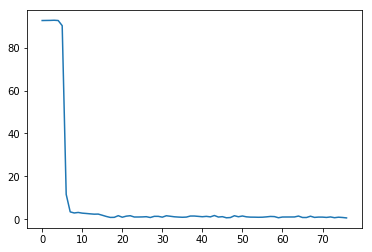

agent_value: 0.998990313367
input_value: 1.00208844006
output_value: 1.00219485418
mean diff: 0.582
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


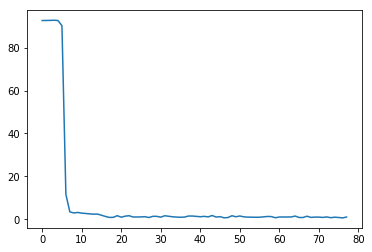

agent_value: 0.995180918356
input_value: 0.995668139244
output_value: 0.99916133439
mean diff: 0.998
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


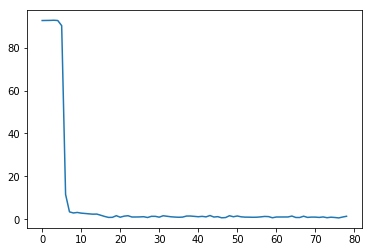

agent_value: 0.99881744672
input_value: 1.00146430549
output_value: 1.00309405724
mean diff: 1.348
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


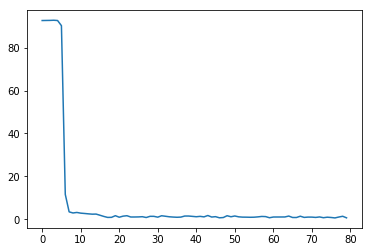

agent_value: 1.00042776779
input_value: 1.00059303512
output_value: 0.999812752672
mean diff: 0.62
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


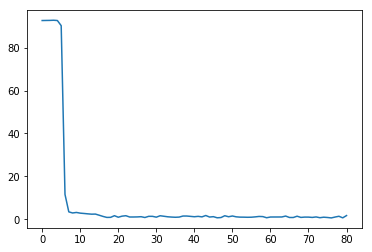

agent_value: 0.998783290429
input_value: 0.999143307973
output_value: 0.997608860131
mean diff: 1.68
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


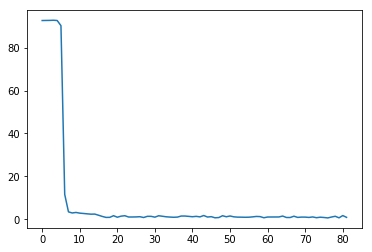

agent_value: 0.999260243039
input_value: 1.00809884338
output_value: 0.998254653307
mean diff: 0.851
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


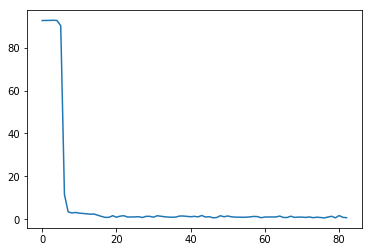

agent_value: 1.00083038594
input_value: 1.00267012216
output_value: 1.00002051051
mean diff: 0.684
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


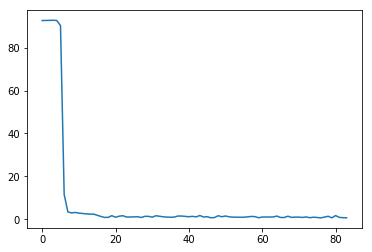

agent_value: 1.0004812547
input_value: 1.00560068355
output_value: 1.00583019117
mean diff: 0.66
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


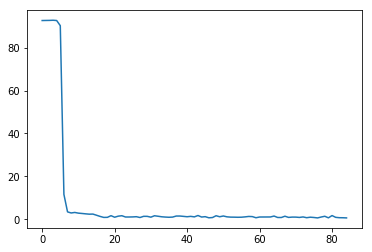

agent_value: 1.00167550465
input_value: 1.00896141598
output_value: 0.996396471289
mean diff: 0.586
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


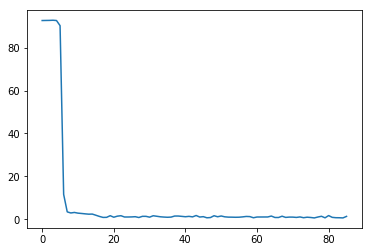

agent_value: 0.995583272581
input_value: 1.07378712873
output_value: 1.01246576754
mean diff: 1.294
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


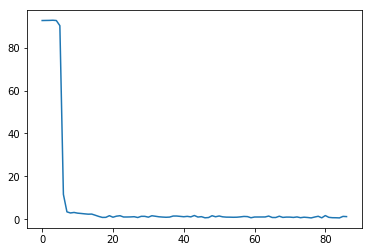

agent_value: 0.999388125022
input_value: 0.998756797823
output_value: 0.995337101214
mean diff: 1.196
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


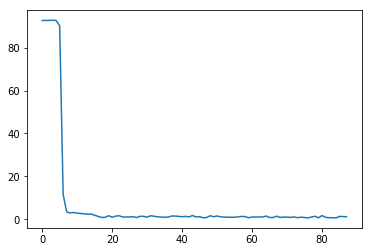

agent_value: 0.999539989455
input_value: 1.0302010298
output_value: 0.98773486258
mean diff: 1.148
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


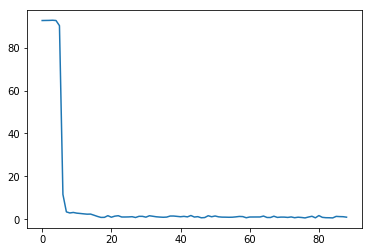

agent_value: 1.00274589032
input_value: 1.00020219257
output_value: 1.00003902132
mean diff: 0.929
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


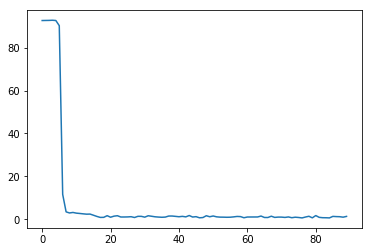

agent_value: 0.997610495726
input_value: 0.999718321689
output_value: 0.997964691456
mean diff: 1.287
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


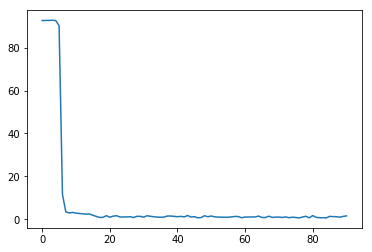

agent_value: 1.00035502301
input_value: 0.98591633596
output_value: 1.01272862494
mean diff: 1.52
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


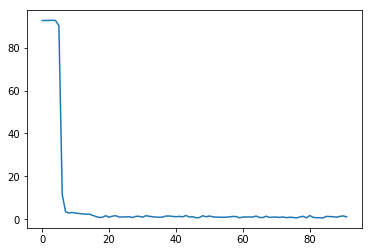

agent_value: 1.00052620156
input_value: 1.00233777152
output_value: 0.999620090564
mean diff: 1.06
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


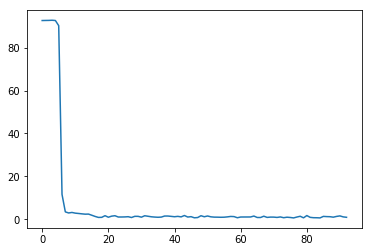

agent_value: 0.997714660961
input_value: 0.99753211853
output_value: 1.00164143713
mean diff: 0.873
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


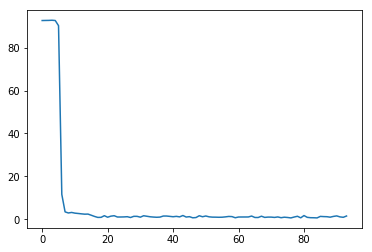

agent_value: 0.950671392991
input_value: 0.870467912612
output_value: 0.929592675949
mean diff: 1.471
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


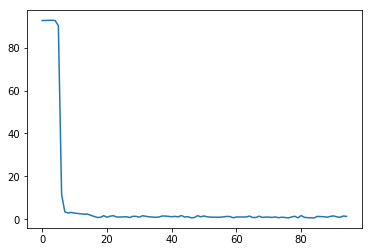

agent_value: 1.00550234162
input_value: 0.99636259495
output_value: 0.997478191122
mean diff: 1.291
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


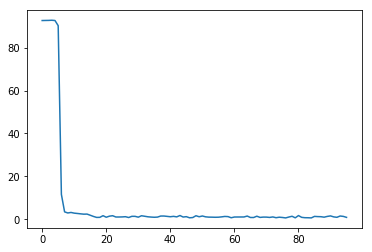

agent_value: 0.998005529957
input_value: 1.00084491489
output_value: 1.00501082308
mean diff: 0.84
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


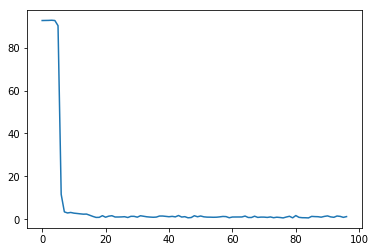

agent_value: 1.00031815621
input_value: 0.998887780934
output_value: 0.99835598533
mean diff: 1.199
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


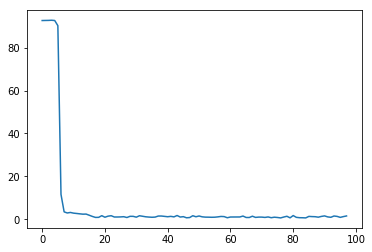

agent_value: 0.996768269494
input_value: 1.00346112759
output_value: 0.997564908201
mean diff: 1.498
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


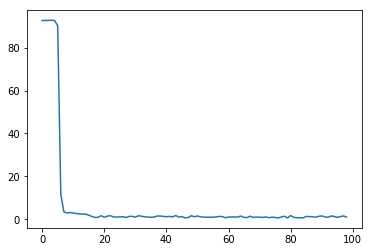

agent_value: 0.998596464173
input_value: 0.997531968276
output_value: 0.998666550148
mean diff: 0.978
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


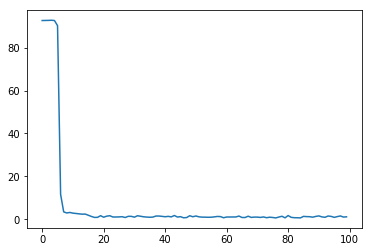

agent_value: 0.918238078523
input_value: 0.999305248016
output_value: 0.992805678297
mean diff: 1.094
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


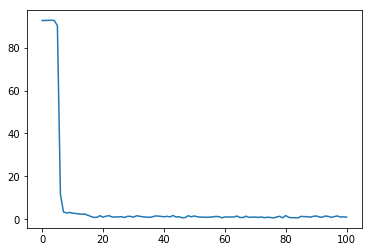

agent_value: 0.999457792175
input_value: 0.995512916979
output_value: 0.998328988124
mean diff: 0.915
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


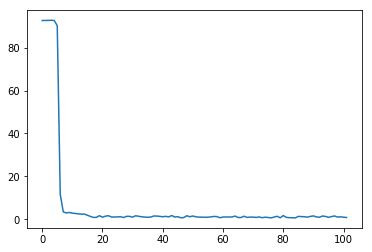

agent_value: 1.00143229489
input_value: 0.996876855782
output_value: 1.0010713724
mean diff: 0.777
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


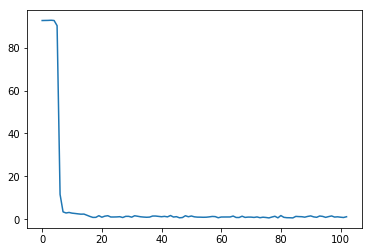

agent_value: 0.998885267311
input_value: 1.0058563054
output_value: 1.00506467293
mean diff: 1.133
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


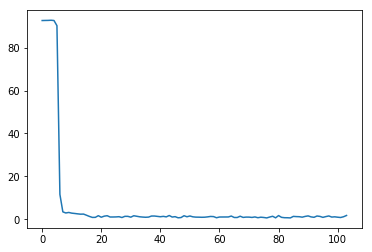

agent_value: 1.00155934358
input_value: 0.999276145914
output_value: 0.998914346467
mean diff: 1.723
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


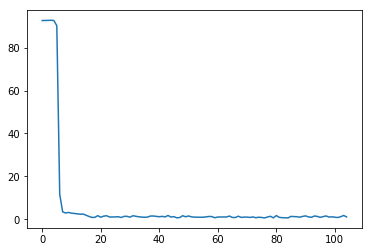

agent_value: 1.00152822034
input_value: 1.00015914956
output_value: 0.996715929772
mean diff: 1.074
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


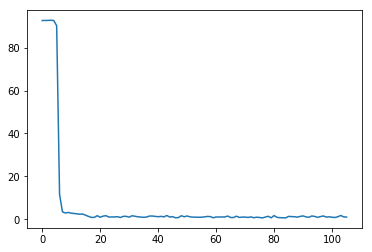

agent_value: 1.0071252238
input_value: 0.998832895549
output_value: 1.0025770207
mean diff: 0.981
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


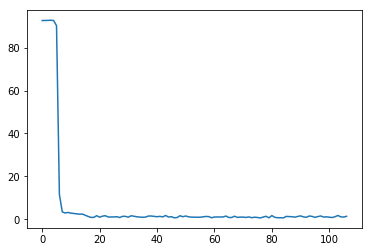

agent_value: 1.00716104573
input_value: 0.950712423883
output_value: 0.999301079928
mean diff: 1.333
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


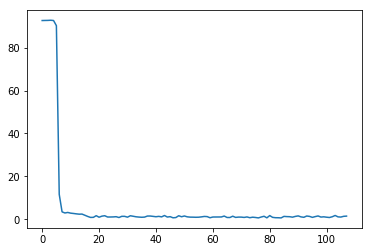

agent_value: 0.99615959223
input_value: 1.01219233489
output_value: 1.0009437335
mean diff: 1.423
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


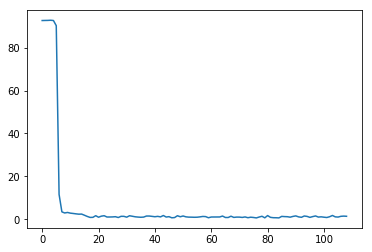

agent_value: 0.998524517952
input_value: 1.00069184499
output_value: 1.00819977682
mean diff: 1.346
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


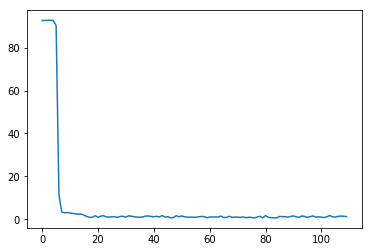

agent_value: 1.00706943282
input_value: 0.991987734172
output_value: 1.00746314326
mean diff: 1.218
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


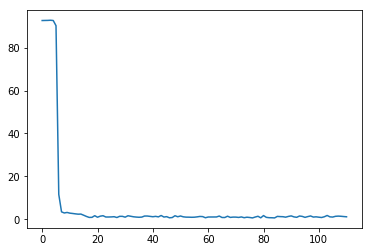

agent_value: 0.999726507677
input_value: 0.997214574723
output_value: 0.997987315436
mean diff: 1.108
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


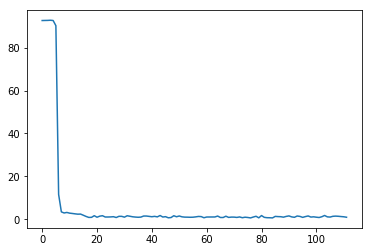

agent_value: 0.997347234312
input_value: 0.988589417829
output_value: 0.993050171214
mean diff: 0.899
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


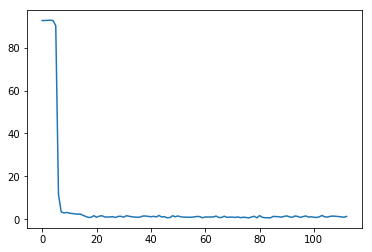

agent_value: 0.997540645748
input_value: 1.00003193726
output_value: 1.01607968651
mean diff: 1.266
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


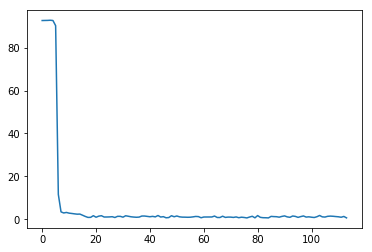

agent_value: 1.00265963431
input_value: 0.99873009744
output_value: 1.00096695661
mean diff: 0.602
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


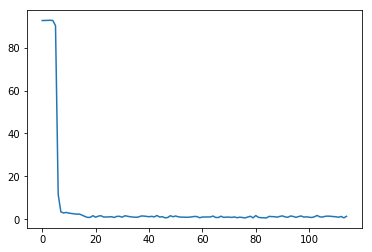

agent_value: 0.998492189549
input_value: 1.00014704317
output_value: 0.99917924714
mean diff: 1.329
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


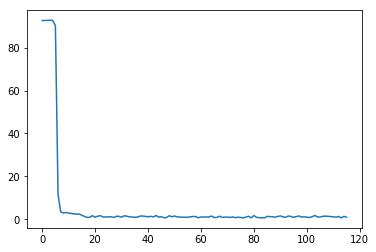

agent_value: 0.998743970537
input_value: 1.00030887964
output_value: 0.998234468744
mean diff: 0.914
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


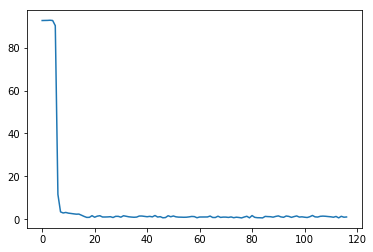

agent_value: 0.999852021205
input_value: 1.00422906719
output_value: 0.999374082438
mean diff: 1.02
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


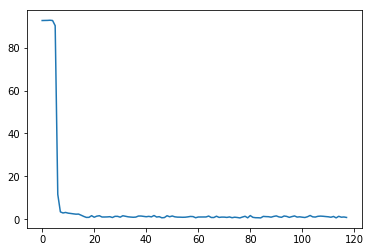

agent_value: 1.00314994954
input_value: 1.00034120794
output_value: 1.00278330083
mean diff: 0.8
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


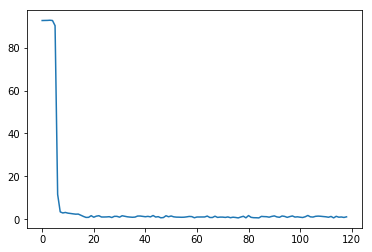

agent_value: 1.00031946952
input_value: 1.00330843296
output_value: 1.0035117808
mean diff: 1.089
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


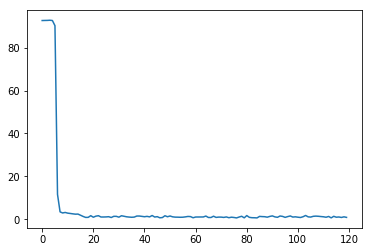

agent_value: 0.996188758468
input_value: 0.999132812219
output_value: 1.00578194144
mean diff: 0.836
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


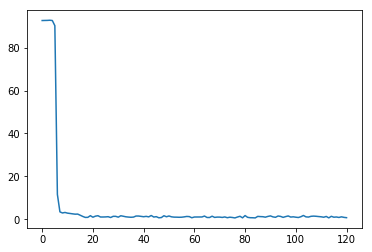

agent_value: 1.00001045562
input_value: 0.998448682894
output_value: 1.00486027909
mean diff: 0.693
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


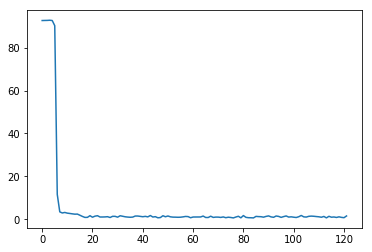

agent_value: 0.993893820419
input_value: 0.99859120881
output_value: 0.992456532461
mean diff: 1.495
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


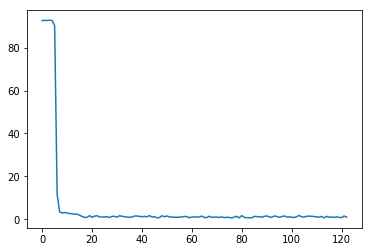

agent_value: 1.00087787768
input_value: 1.00315685822
output_value: 1.00344649674
mean diff: 0.92
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


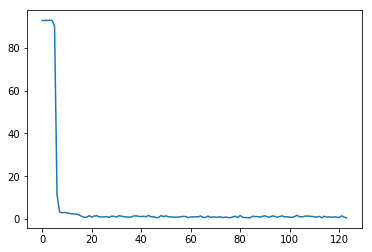

agent_value: 1.0015964705
input_value: 0.995846581035
output_value: 1.00020358419
mean diff: 0.534
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


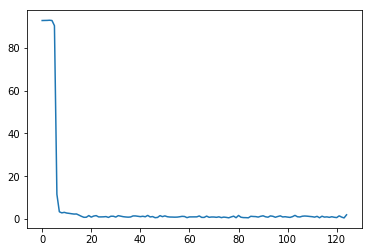

agent_value: 1.00626867185
input_value: 1.0051847603
output_value: 0.993591973055
mean diff: 1.983
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


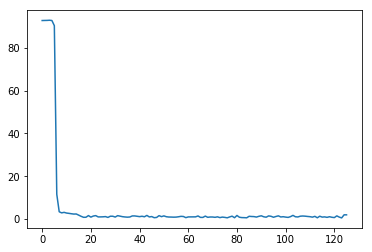

agent_value: 0.993033966983
input_value: 0.86094852777
output_value: 0.998107403211
mean diff: 1.973
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


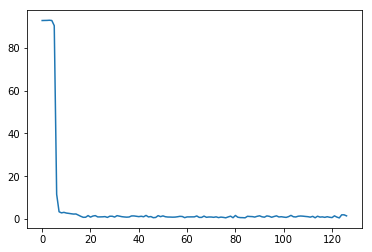

agent_value: 1.00322084594
input_value: 1.00159538078
output_value: 0.998987299997
mean diff: 1.495
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


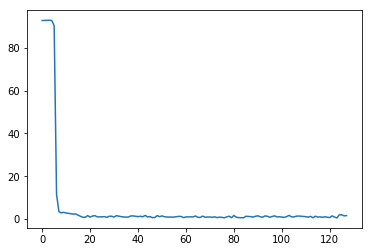

agent_value: 1.00379664919
input_value: 0.997904978973
output_value: 1.00432933692
mean diff: 1.618
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


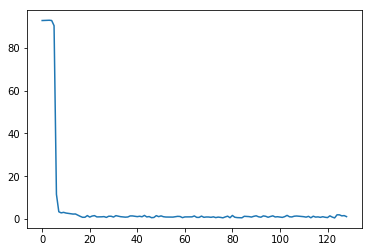

agent_value: 0.999434098179
input_value: 0.999573313858
output_value: 0.999225051928
mean diff: 1.142
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


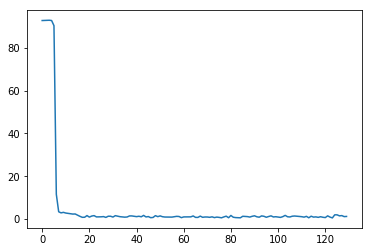

agent_value: 0.99990529715
input_value: 0.996521617321
output_value: 0.995590665232
mean diff: 1.224
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


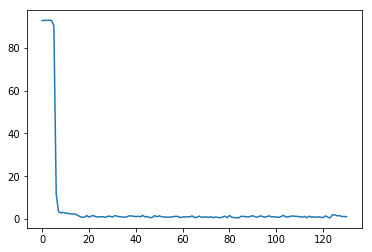

agent_value: 0.998372126721
input_value: 0.99849815292
output_value: 1.01010212985
mean diff: 1.102
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


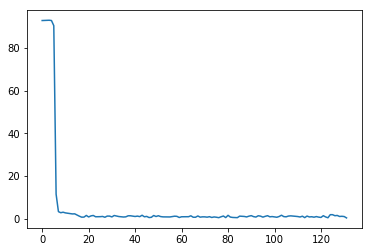

agent_value: 0.999645984631
input_value: 1.00091924062
output_value: 1.00291018164
mean diff: 0.464
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


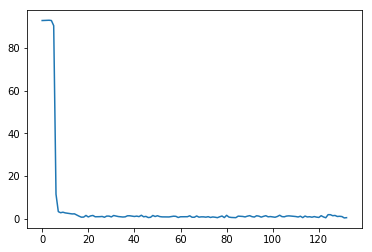

agent_value: 0.995235604776
input_value: 1.00720330675
output_value: 1.00695119037
mean diff: 0.576
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


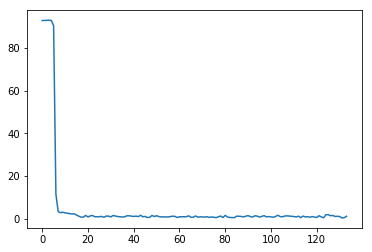

agent_value: 1.01004154439
input_value: 0.994498310458
output_value: 0.992474822807
mean diff: 1.239
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


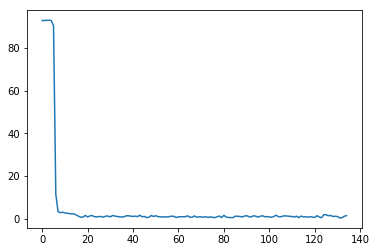

agent_value: 1.00417321592
input_value: 0.995156086474
output_value: 0.992399146474
mean diff: 1.541
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


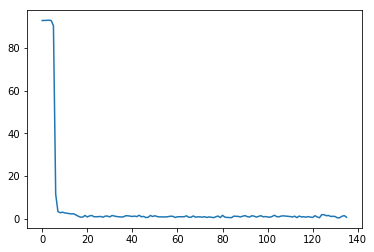

agent_value: 1.00129899258
input_value: 1.00095458173
output_value: 1.00738871253
mean diff: 0.774
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


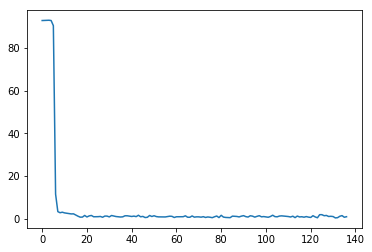

agent_value: 1.0011214267
input_value: 0.998839483551
output_value: 1.00004590799
mean diff: 1.025
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


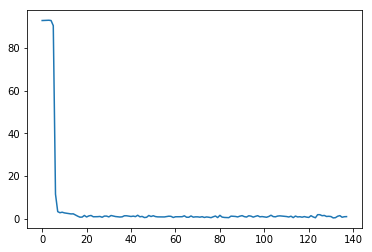

agent_value: 0.998486558635
input_value: 0.996605265107
output_value: 0.995044470534
mean diff: 1.071
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


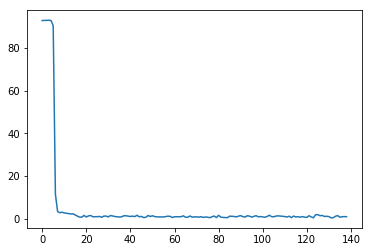

agent_value: 0.979952252399
input_value: 0.933558110121
output_value: 0.970874113024
mean diff: 1.039
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


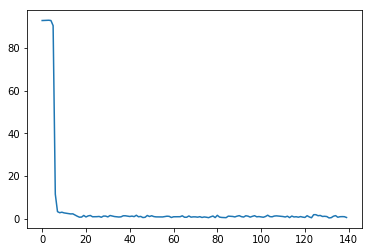

agent_value: 0.991204307538
input_value: 0.983315924828
output_value: 0.989952782069
mean diff: 0.664
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


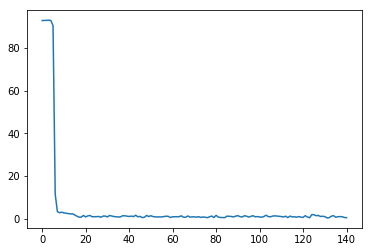

agent_value: 0.998760451162
input_value: 1.00153159218
output_value: 0.999757588314
mean diff: 0.573
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


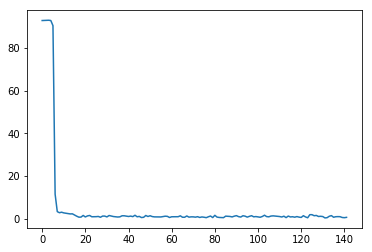

agent_value: 0.992493917852
input_value: 0.887390407943
output_value: 1.0020960174
mean diff: 0.726
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


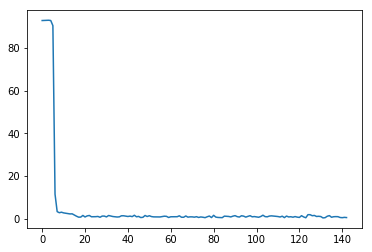

agent_value: 1.00000041141
input_value: 1.00095092962
output_value: 1.00092506772
mean diff: 0.629
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


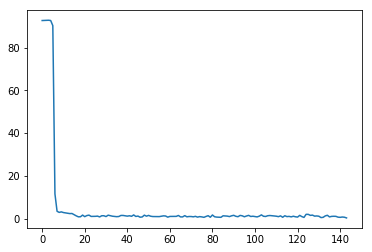

agent_value: 1.000960816
input_value: 1.00111494488
output_value: 1.00023803758
mean diff: 0.304
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


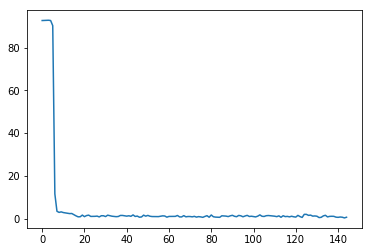

agent_value: 0.998381735368
input_value: 1.00009745511
output_value: 0.997470807134
mean diff: 0.62
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


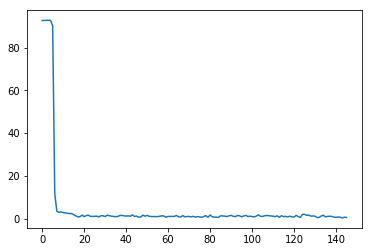

agent_value: 0.998203906287
input_value: 0.998900902655
output_value: 1.00229468098
mean diff: 0.531
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


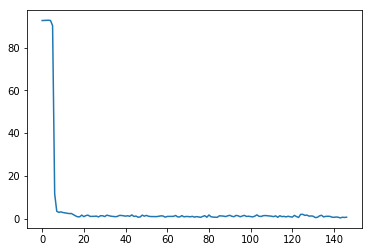

agent_value: 0.998922421459
input_value: 0.998489517945
output_value: 0.998687645884
mean diff: 0.632
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


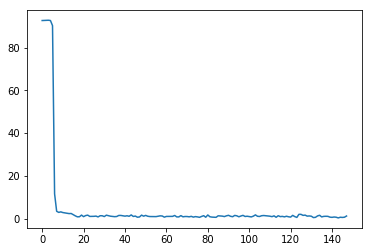

agent_value: 0.999455828197
input_value: 0.998422112989
output_value: 1.00117279007
mean diff: 1.195
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


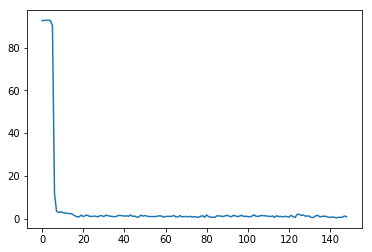

agent_value: 0.99777392531
input_value: 0.998378269408
output_value: 0.998656313716
mean diff: 0.844
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


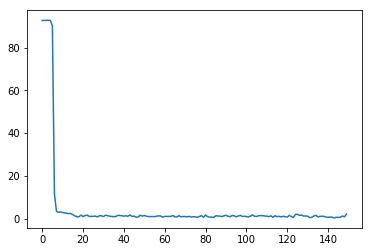

agent_value: 0.997532325715
input_value: 0.999659347708
output_value: 1.00345851075
mean diff: 2.118
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


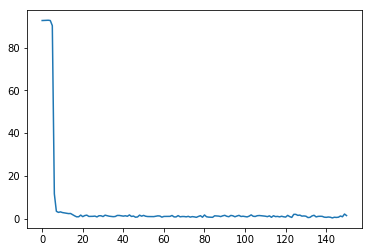

agent_value: 1.00959857366
input_value: 0.997468018478
output_value: 1.00863319253
mean diff: 1.408
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


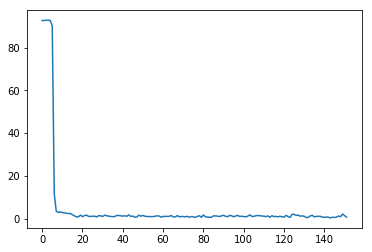

agent_value: 1.00085918784
input_value: 1.00692329395
output_value: 0.999990791252
mean diff: 0.662
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


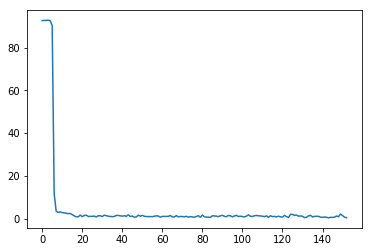

agent_value: 1.00200291589
input_value: 0.997932398836
output_value: 0.999184737206
mean diff: 0.394
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


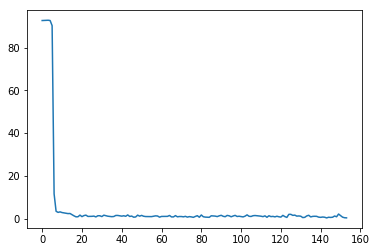

agent_value: 0.999489500972
input_value: 0.997599430656
output_value: 1.00077879585
mean diff: 0.328
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


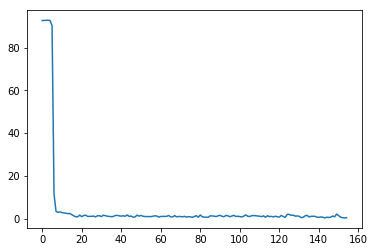

agent_value: 1.00174787841
input_value: 0.999705091205
output_value: 0.999452828154
mean diff: 0.42
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


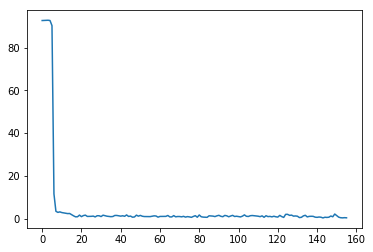

agent_value: 0.999928944351
input_value: 1.00142513519
output_value: 1.0005018346
mean diff: 0.352
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


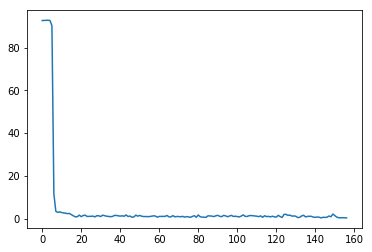

agent_value: 1.00064931816
input_value: 1.00213174695
output_value: 1.00166644995
mean diff: 0.32
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


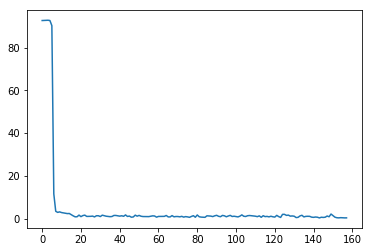

agent_value: 1.00109583011
input_value: 1.00337332568
output_value: 0.995207096853
mean diff: 0.326
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


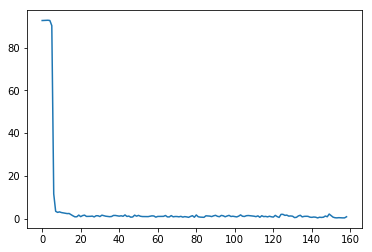

agent_value: 0.9956353548
input_value: 0.995041237214
output_value: 1.00168550178
mean diff: 0.848
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


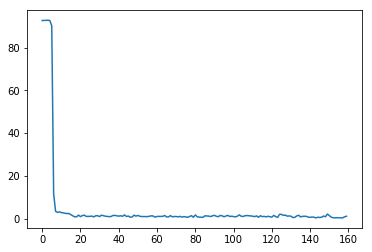

agent_value: 0.995039643653
input_value: 0.984660320672
output_value: 1.00079540131
mean diff: 1.081
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


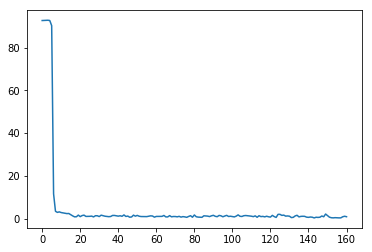

agent_value: 1.0003554464
input_value: 0.994715728277
output_value: 1.00166996672
mean diff: 0.869
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


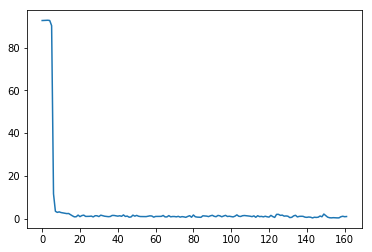

agent_value: 1.00238566949
input_value: 0.944660530364
output_value: 0.991955220625
mean diff: 0.955
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


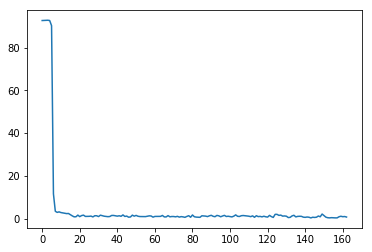

agent_value: 0.999291225916
input_value: 1.00051843739
output_value: 1.00061196166
mean diff: 0.716
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


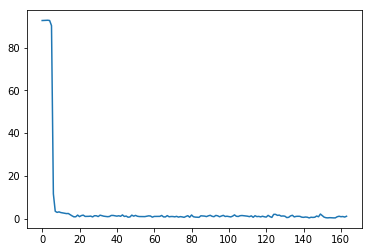

agent_value: 1.00129585198
input_value: 0.99190094677
output_value: 1.00148754884
mean diff: 1.08
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


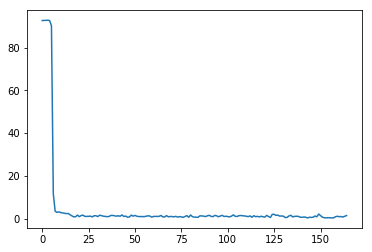

agent_value: 1.00181997968
input_value: 0.97832102504
output_value: 0.990554156741
mean diff: 1.402
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


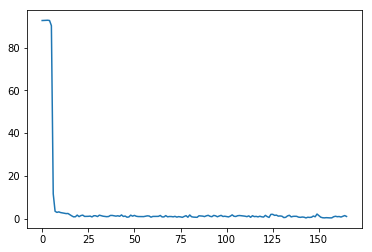

agent_value: 1.00225614416
input_value: 0.998249356862
output_value: 0.999404265336
mean diff: 0.993
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


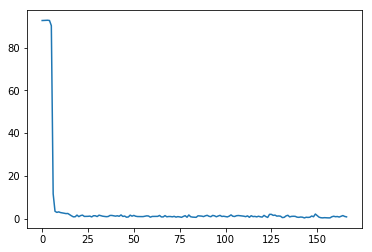

agent_value: 1.00069243942
input_value: 0.998421528133
output_value: 0.999551710914
mean diff: 0.796
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


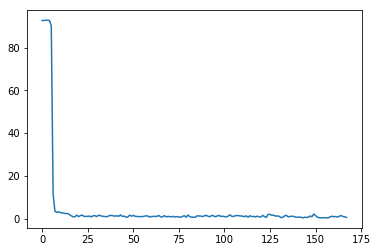

agent_value: 0.998974692708
input_value: 1.00028670697
output_value: 1.00297621539
mean diff: 0.577
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


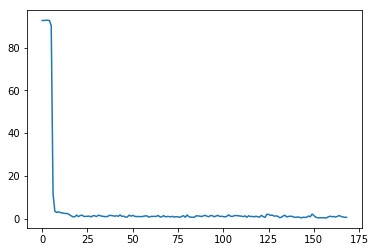

agent_value: 1.00342765989
input_value: 0.99978277386
output_value: 1.00179852868
mean diff: 0.566
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


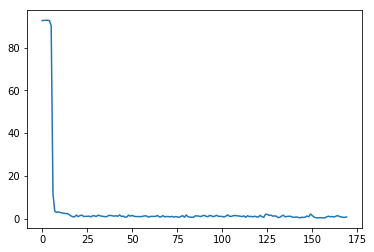

agent_value: 0.999182101452
input_value: 0.477918051646
output_value: 0.99576746153
mean diff: 0.758
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


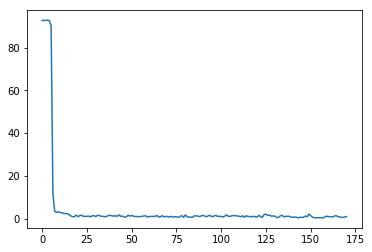

agent_value: 1.01934598394
input_value: 1.06252345886
output_value: 1.00905127687
mean diff: 0.92
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


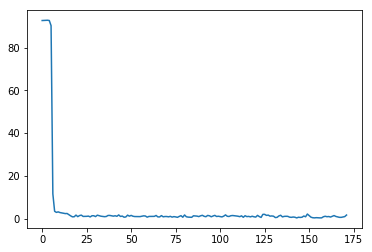

agent_value: 1.00151102014
input_value: 0.998955639597
output_value: 0.98685358015
mean diff: 1.652
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


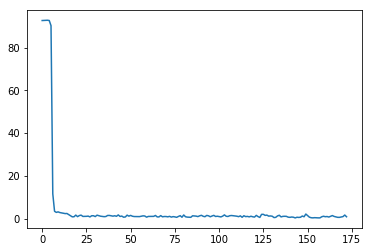

agent_value: 1.00193678314
input_value: 0.99623729452
output_value: 1.01083830178
mean diff: 0.851
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


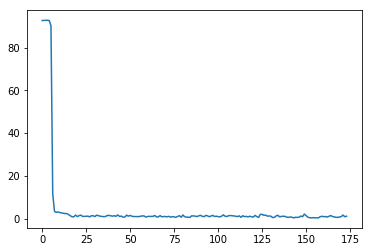

agent_value: 0.999974419655
input_value: 0.987796050016
output_value: 1.00168048488
mean diff: 1.097
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


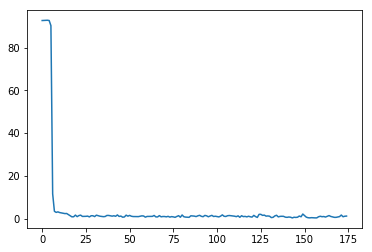

agent_value: 1.00169850027
input_value: 0.995841027223
output_value: 1.0151792252
mean diff: 1.168
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


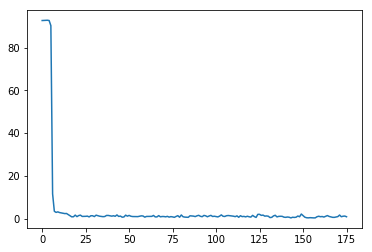

agent_value: 0.99859602493
input_value: 0.992363756205
output_value: 0.998072330804
mean diff: 0.857
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


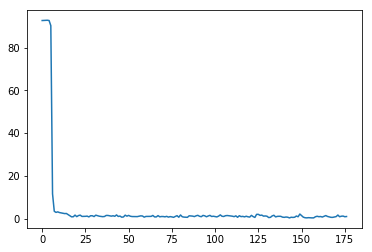

agent_value: 1.0025312238
input_value: 0.998676781728
output_value: 1.00269094895
mean diff: 0.964
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


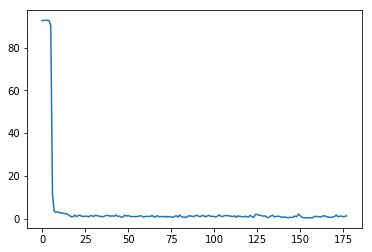

agent_value: 0.998446596773
input_value: 0.983922480866
output_value: 0.996300820352
mean diff: 1.282
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


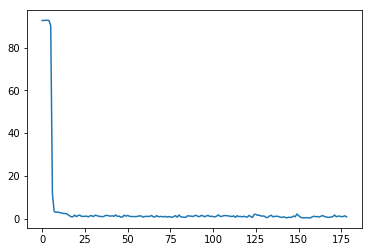

agent_value: 0.999711664689
input_value: 1.00098195349
output_value: 1.00092986083
mean diff: 0.8
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


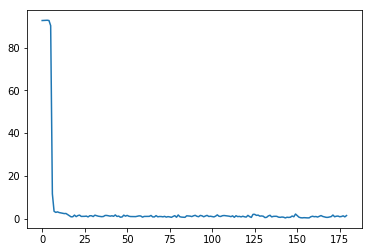

agent_value: 0.992693544021
input_value: 0.658535254027
output_value: 0.999556560084
mean diff: 1.412
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


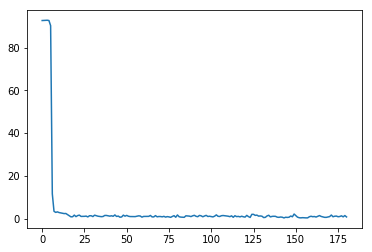

agent_value: 1.0018071547
input_value: 1.00593843201
output_value: 1.00816462164
mean diff: 0.771
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


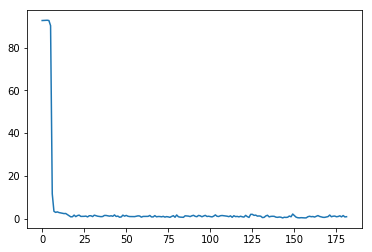

agent_value: 0.969627612726
input_value: 0.31651566233
output_value: 1.00254680259
mean diff: 0.874
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


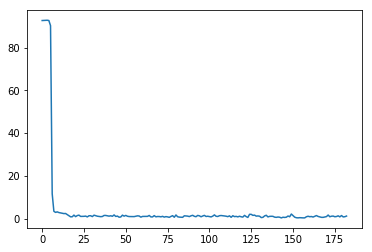

agent_value: 0.995557363407
input_value: 0.995715218796
output_value: 0.998501063188
mean diff: 1.172
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


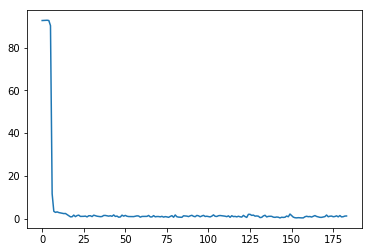

agent_value: 1.0072944507
input_value: 0.982908023024
output_value: 0.993432331246
mean diff: 1.21
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


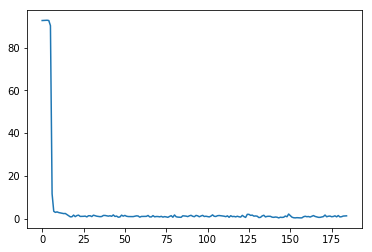

agent_value: 0.98415166484
input_value: 0.981309206647
output_value: 0.99205502164
mean diff: 1.272
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


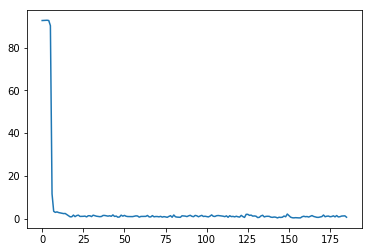

agent_value: 1.00118801616
input_value: 0.999484522032
output_value: 1.00173274574
mean diff: 0.632
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


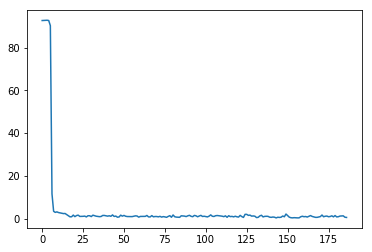

agent_value: 1.00027032914
input_value: 0.999995230958
output_value: 0.999335508869
mean diff: 0.526
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


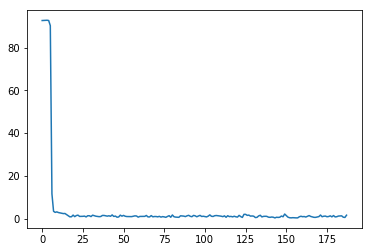

agent_value: 1.00095373319
input_value: 1.00208354952
output_value: 0.999666427446
mean diff: 1.58
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


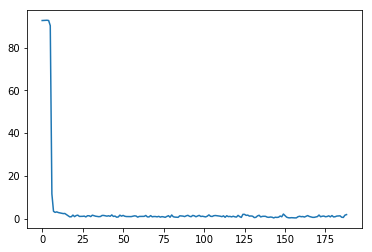

agent_value: 0.987050707409
input_value: 1.00257529057
output_value: 1.00188537288
mean diff: 1.859
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


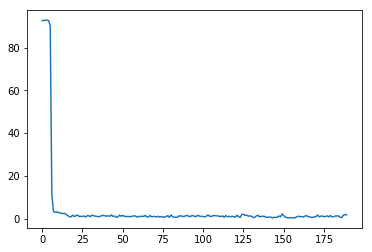

agent_value: 1.00351398053
input_value: 0.99739505276
output_value: 1.00401525267
mean diff: 1.773
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


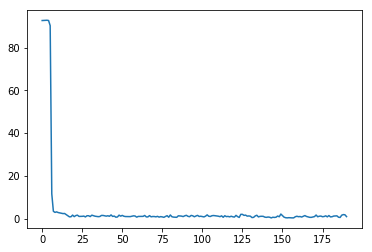

agent_value: 1.00090962363
input_value: 0.987112812794
output_value: 1.00035654243
mean diff: 0.921
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


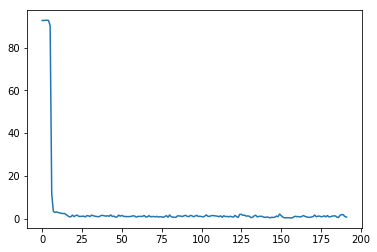

agent_value: 1.00132454452
input_value: 1.00047129658
output_value: 1.00188282671
mean diff: 0.69
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


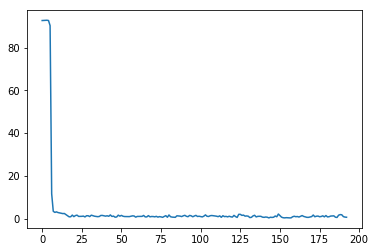

agent_value: 0.999157019471
input_value: 1.00410854543
output_value: 1.00157779567
mean diff: 0.624
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


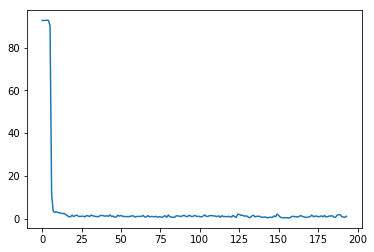

agent_value: 0.999411179314
input_value: 0.88431786587
output_value: 0.997758316651
mean diff: 1.066
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


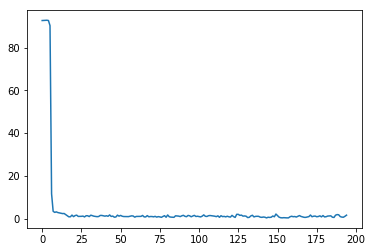

agent_value: 0.997792283143
input_value: 0.996502084752
output_value: 0.999467535696
mean diff: 1.591
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


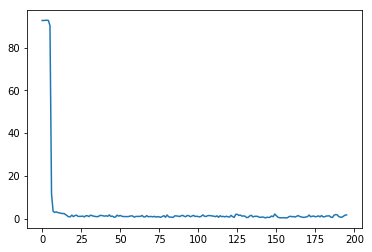

agent_value: 1.00114708162
input_value: 1.00426157112
output_value: 1.00415411262
mean diff: 1.689
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


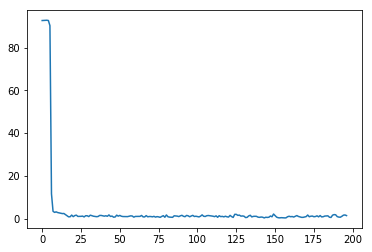

agent_value: 0.999851672947
input_value: 0.997399035112
output_value: 1.00006154449
mean diff: 1.396
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


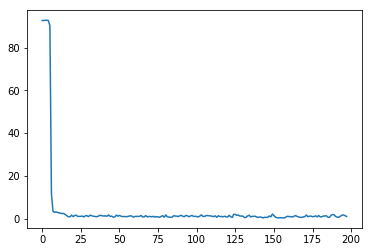

agent_value: 1.00436663081
input_value: 0.739898344467
output_value: 0.999738388525
mean diff: 0.964
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


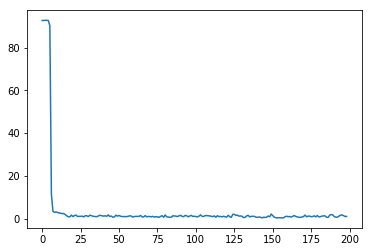

agent_value: 1.00107423496
input_value: 1.00301397731
output_value: 0.999911705794
mean diff: 1.015
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


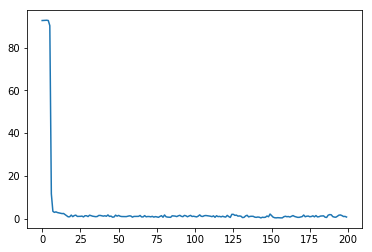

agent_value: 0.995736175463
input_value: 0.999933644058
output_value: 0.996239876223
mean diff: 0.718
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


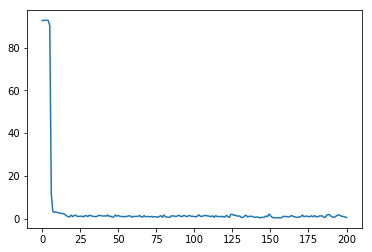

agent_value: 1.00764862339
input_value: 1.00017695185
output_value: 1.0027068189
mean diff: 0.5
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


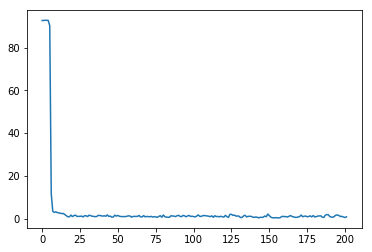

agent_value: 0.999661492608
input_value: 1.00042608404
output_value: 0.996658036747
mean diff: 0.822
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


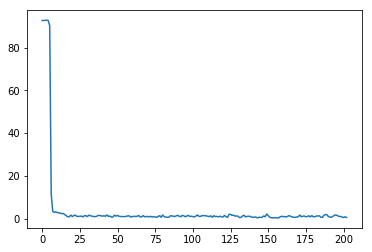

agent_value: 0.999988664489
input_value: 0.998842813864
output_value: 0.998397343604
mean diff: 0.5
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


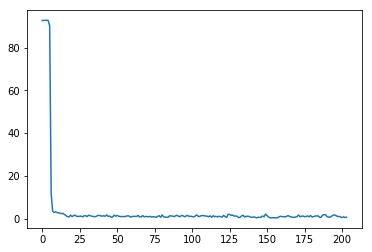

agent_value: 0.999190406801
input_value: 0.997813612473
output_value: 1.00126487722
mean diff: 0.646
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


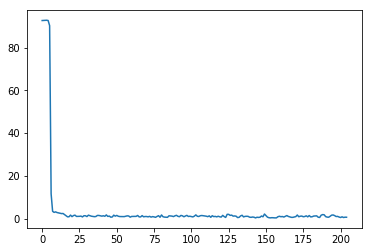

agent_value: 1.00048091105
input_value: 0.997935627918
output_value: 1.00202643879
mean diff: 0.622
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


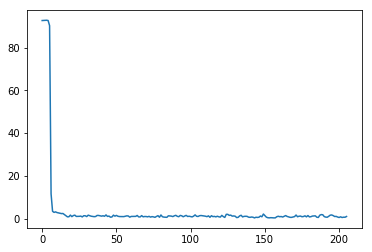

agent_value: 1.00169701753
input_value: 0.991706120877
output_value: 1.0071123391
mean diff: 0.967
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


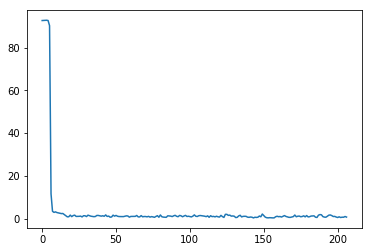

agent_value: 1.00160608008
input_value: 1.00914279113
output_value: 1.00861693921
mean diff: 0.694
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


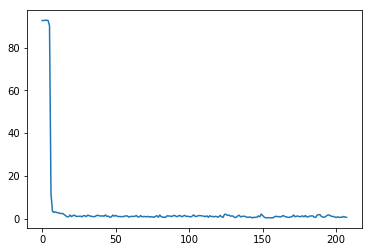

agent_value: 0.996962171388
input_value: 0.995833251359
output_value: 0.991603115308
mean diff: 0.594
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


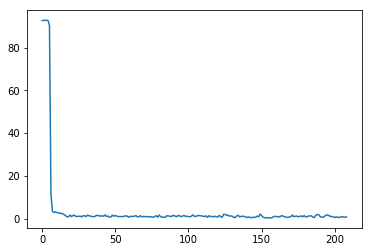

agent_value: 1.00013724201
input_value: 1.00150123872
output_value: 1.00200436198
mean diff: 0.817
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


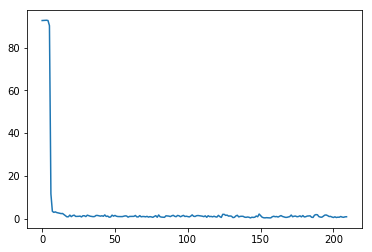

agent_value: 1.0016214144
input_value: 0.999366945745
output_value: 1.0037071826
mean diff: 0.852
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


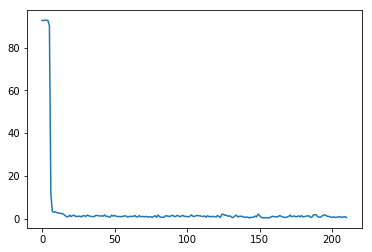

agent_value: 1.00141226476
input_value: 0.999262096453
output_value: 1.00053925094
mean diff: 0.468
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


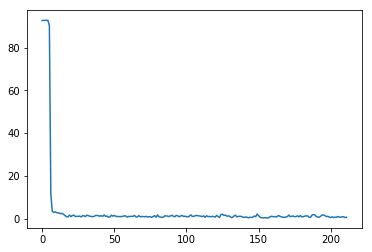

agent_value: 1.00218322401
input_value: 1.00176250594
output_value: 1.00322937672
mean diff: 0.61
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


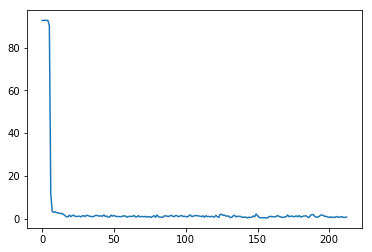

agent_value: 1.00044749278
input_value: 0.995481744093
output_value: 1.00207580416
mean diff: 0.708
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


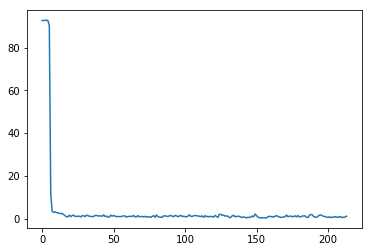

agent_value: 0.999345309334
input_value: 0.991456514694
output_value: 0.998542519551
mean diff: 1.129
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


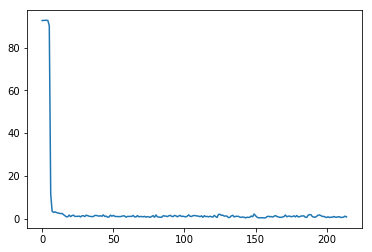

agent_value: 1.00067652929
input_value: 1.00423092614
output_value: 0.998696284305
mean diff: 0.74
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


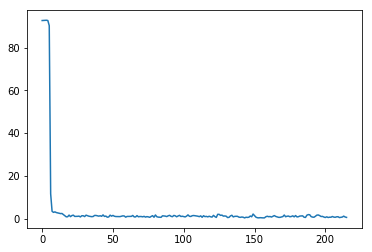

agent_value: 0.999300193695
input_value: 0.99188248608
output_value: 1.00076749239
mean diff: 0.552
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


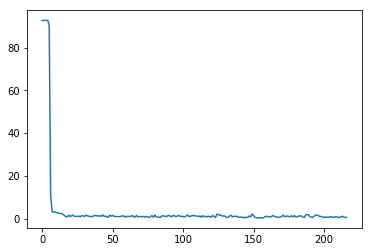

agent_value: 1.00055417939
input_value: 1.0005188986
output_value: 0.999802981365
mean diff: 0.524
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


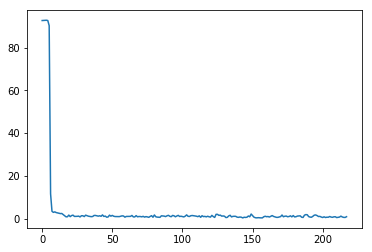

agent_value: 0.999236817856
input_value: 0.999212378828
output_value: 1.00009508516
mean diff: 0.87
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


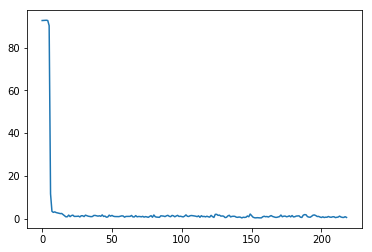

agent_value: 1.00058419788
input_value: 0.994239658292
output_value: 1.00079895548
mean diff: 0.53
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


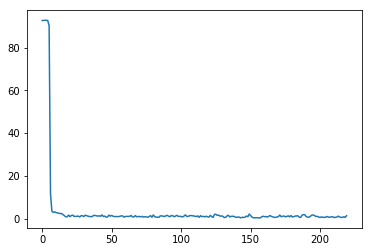

agent_value: 0.996563856476
input_value: 1.00083928832
output_value: 1.0035052009
mean diff: 1.337
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


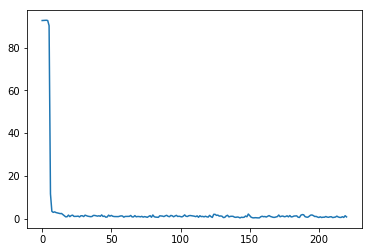

agent_value: 1.00003871276
input_value: 1.0167399619
output_value: 1.00697870266
mean diff: 0.774
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


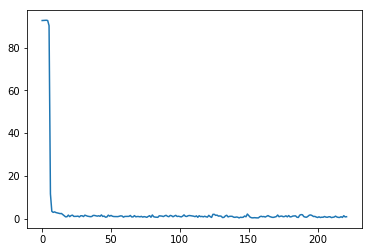

agent_value: 1.00481872322
input_value: 1.00456096291
output_value: 1.0016383501
mean diff: 0.867
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


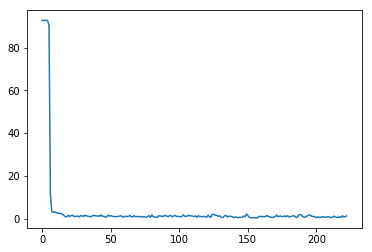

agent_value: 0.999143657549
input_value: 0.996384797358
output_value: 1.0007286798
mean diff: 1.241
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


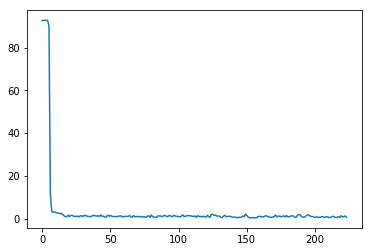

agent_value: 0.979294607915
input_value: -0.388486970638
output_value: 0.94136378038
mean diff: 0.619
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


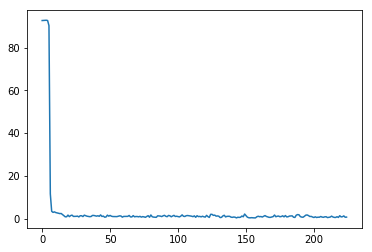

agent_value: 0.991350145064
input_value: 0.964347749302
output_value: 0.970557166364
mean diff: 0.681
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


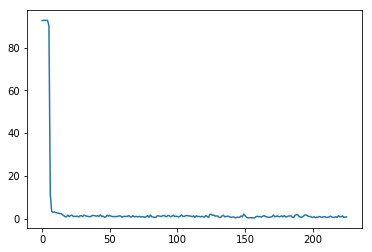

agent_value: 1.00061755634
input_value: 1.00310548763
output_value: 1.00055655539
mean diff: 0.754
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


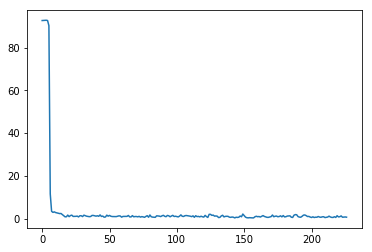

agent_value: 0.999686693038
input_value: 1.00371606946
output_value: 0.997398719735
mean diff: 0.654
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


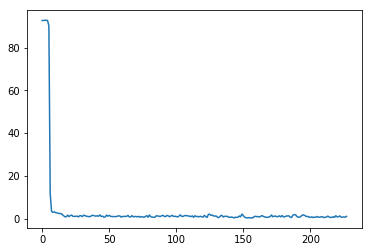

agent_value: 0.994953959463
input_value: 0.999450233194
output_value: 1.00028355272
mean diff: 1.034
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


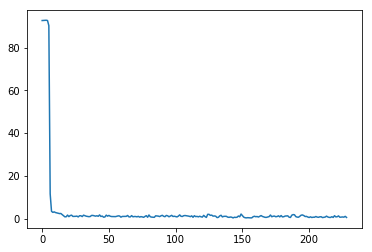

agent_value: 1.00320143484
input_value: 1.0005592433
output_value: 1.00098781727
mean diff: 0.536
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


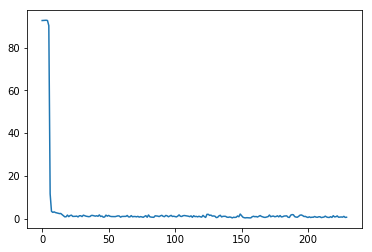

agent_value: 1.00089035829
input_value: 0.99751891897
output_value: 0.994245152407
mean diff: 0.622
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


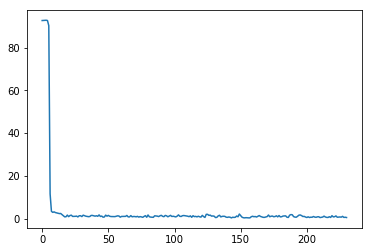

agent_value: 0.999884235187
input_value: 0.99760845989
output_value: 1.00418263483
mean diff: 0.492
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


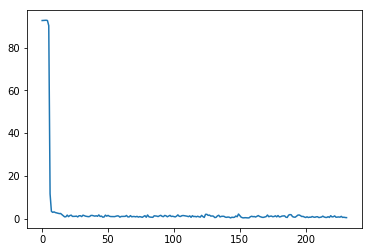

agent_value: 1.00259917357
input_value: 0.990006964495
output_value: 0.998310224466
mean diff: 0.436
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


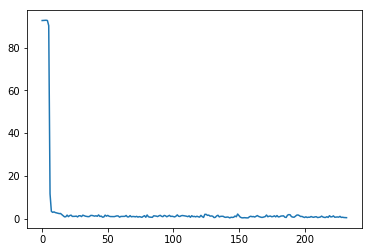

agent_value: 1.00066945595
input_value: 1.00011264042
output_value: 1.00231350477
mean diff: 0.416
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


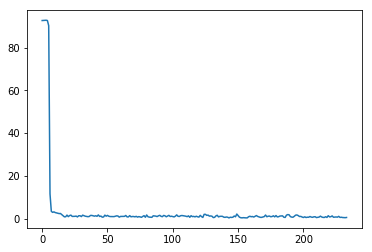

agent_value: 0.997773078478
input_value: 1.00093606309
output_value: 1.00054844424
mean diff: 0.506
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


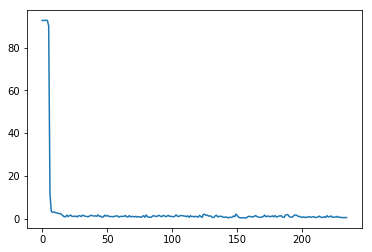

agent_value: 0.997797840514
input_value: 0.999946903142
output_value: 0.997604097958
mean diff: 0.444
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


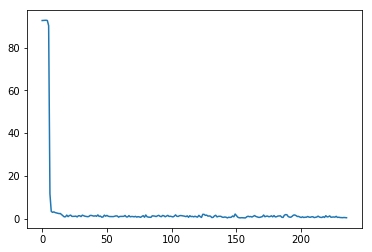

agent_value: 1.00041436842
input_value: 1.00089196847
output_value: 0.998130950575
mean diff: 0.388
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


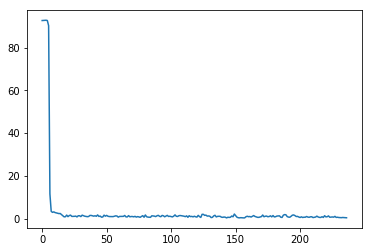

agent_value: 0.99889036083
input_value: 0.9973513837
output_value: 0.997558298068
mean diff: 0.372
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


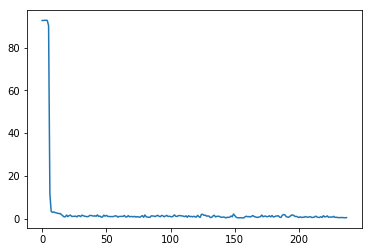

agent_value: 1.00595517093
input_value: 1.01089469604
output_value: 0.984433071914
mean diff: 0.45
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


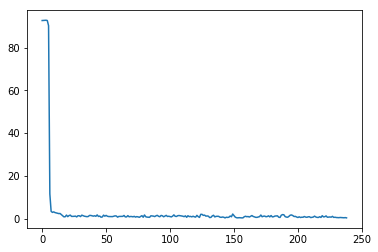

agent_value: 0.989973620575
input_value: 1.00386628947
output_value: 0.982248422884
mean diff: 0.328
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


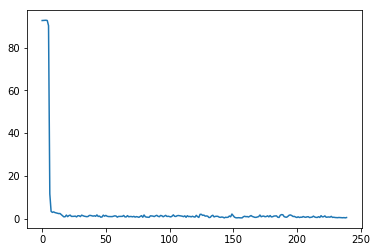

agent_value: 0.997953268457
input_value: 0.999439154161
output_value: 1.00309159992
mean diff: 0.48
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


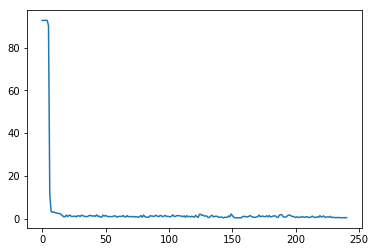

agent_value: 1.00046028394
input_value: 1.00013272045
output_value: 1.00082931956
mean diff: 0.404
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


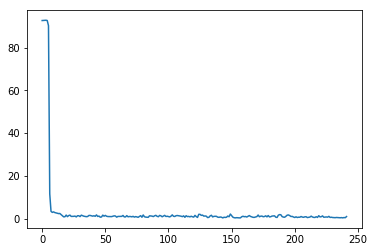

agent_value: 0.999543462788
input_value: 1.00443461604
output_value: 1.00271891729
mean diff: 0.935
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


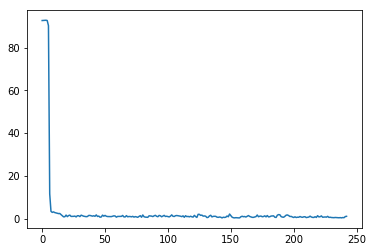

agent_value: 1.00279041239
input_value: 1.00380613541
output_value: 1.00132883597
mean diff: 1.05
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


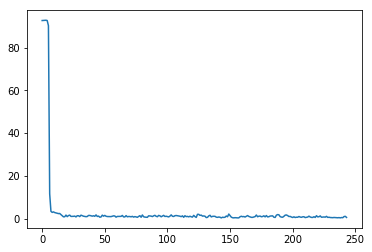

agent_value: 1.00144315365
input_value: 0.99584193225
output_value: 0.999336240883
mean diff: 0.538
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


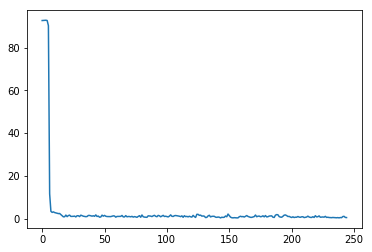

agent_value: 1.01671619316
input_value: 0.605045815273
output_value: 1.0721863046
mean diff: 0.466
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


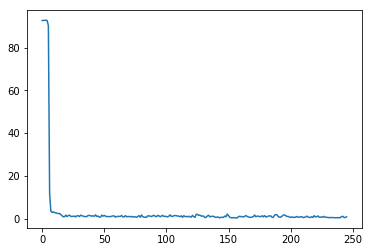

agent_value: 0.997135659956
input_value: 0.997584569697
output_value: 0.998230852433
mean diff: 0.836
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


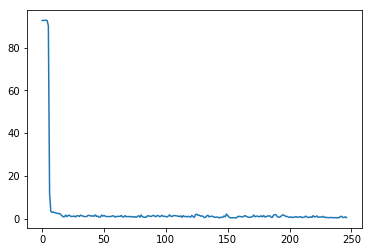

agent_value: 1.00078103501
input_value: 0.886442345684
output_value: 0.999571206305
mean diff: 0.474
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


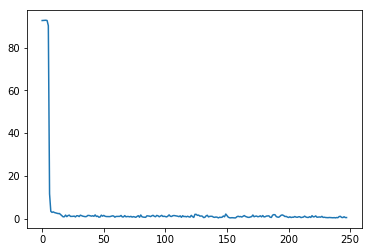

agent_value: 1.00030060297
input_value: 1.00025649297
output_value: 0.999322546296
mean diff: 0.472
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


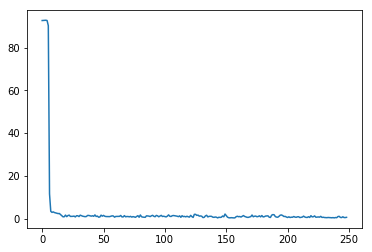

agent_value: 1.00669634328
input_value: 0.95624399206
output_value: 1.0088217178
mean diff: 0.576
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


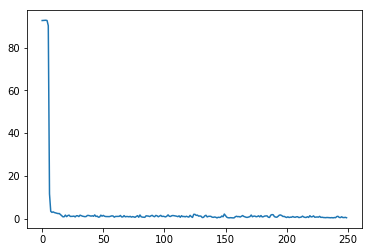

agent_value: 0.999260643407
input_value: 0.998582995907
output_value: 0.996567273119
mean diff: 0.39
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


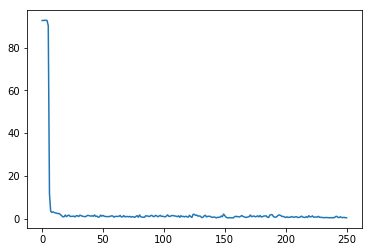

agent_value: 1.00105379062
input_value: 1.00325328722
output_value: 0.996261867676
mean diff: 0.368
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


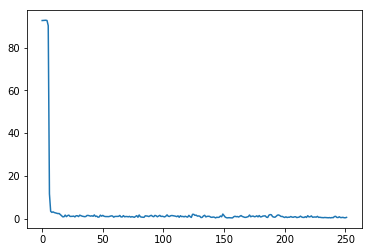

agent_value: 1.00029226715
input_value: 0.978662090738
output_value: 1.01203184722
mean diff: 0.546
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


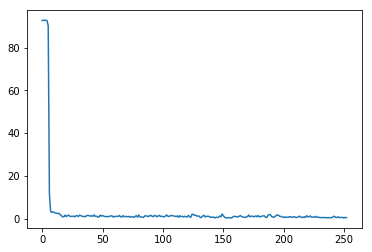

agent_value: 0.999518502827
input_value: 1.00216140676
output_value: 1.00163630088
mean diff: 0.424
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


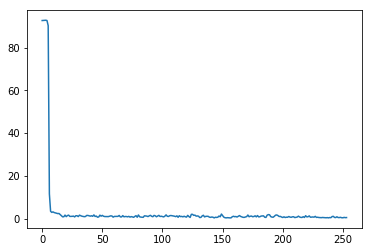

agent_value: 0.999321553416
input_value: 1.01296373636
output_value: 0.998192681268
mean diff: 0.468
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


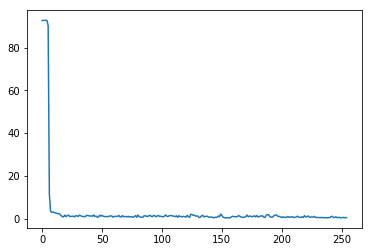

agent_value: 1.00094116578
input_value: 1.00231182956
output_value: 0.99839979317
mean diff: 0.43
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


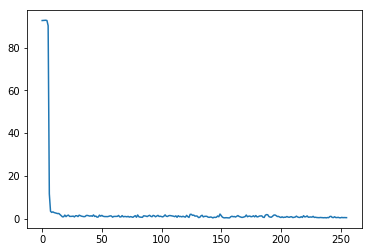

agent_value: 1.00180455642
input_value: 0.992124892375
output_value: 0.998925782214
mean diff: 0.426
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


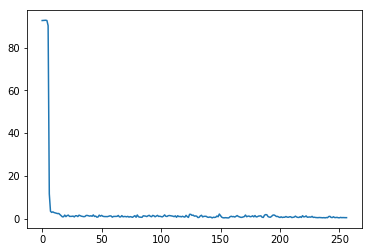

agent_value: 0.99657765834
input_value: 0.995491180124
output_value: 1.00713031649
mean diff: 0.422
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


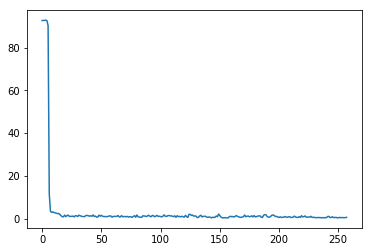

agent_value: 1.00527203159
input_value: 1.0198656857
output_value: 1.00298537859
mean diff: 0.578
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


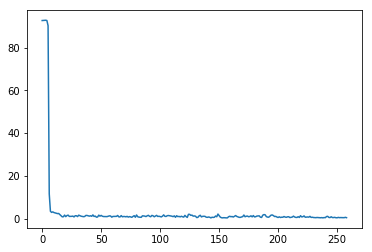

agent_value: 0.999493599107
input_value: 1.00036570127
output_value: 0.999862014508
mean diff: 0.416
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


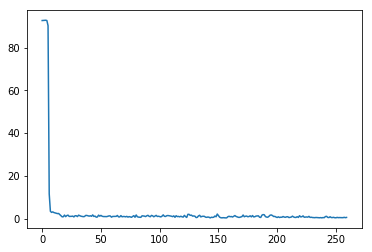

agent_value: 1.00249166901
input_value: 0.997844709197
output_value: 1.00020644936
mean diff: 0.528
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


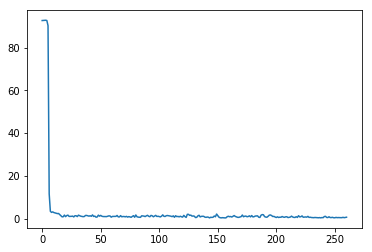

agent_value: 1.00083037581
input_value: 1.00015119998
output_value: 1.00432394274
mean diff: 0.63
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


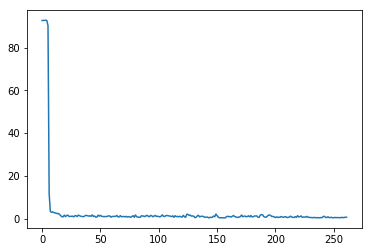

agent_value: 0.996247559178
input_value: 0.989309029966
output_value: 0.998257626849
mean diff: 0.604
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


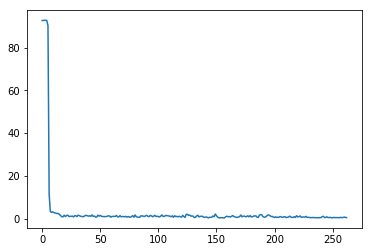

agent_value: 0.976174791998
input_value: 0.997403259891
output_value: 0.996893806601
mean diff: 0.442
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


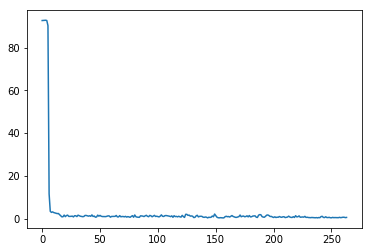

agent_value: 0.980362301623
input_value: 0.975646671765
output_value: 1.02213040053
mean diff: 0.53
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


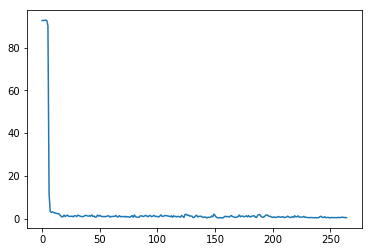

agent_value: 1.00094316558
input_value: 0.999246349874
output_value: 0.99899184086
mean diff: 0.398
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


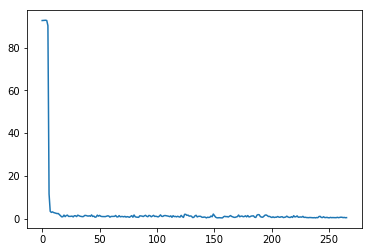

agent_value: 1.00161411941
input_value: 1.00351073691
output_value: 1.00145432198
mean diff: 0.438
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


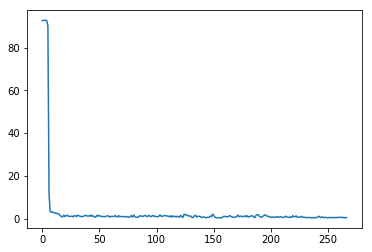

agent_value: 1.00005105318
input_value: 1.00042960499
output_value: 0.997512696955
mean diff: 0.43
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


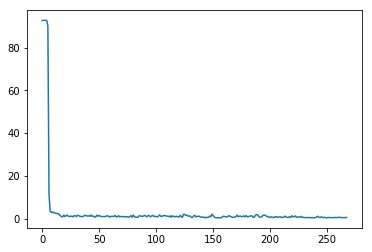

agent_value: 1.00071327677
input_value: 1.00534172823
output_value: 1.00530677417
mean diff: 0.488
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


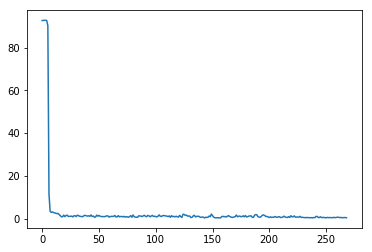

agent_value: 0.999813027776
input_value: 1.00081056245
output_value: 1.00031194529
mean diff: 0.37
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


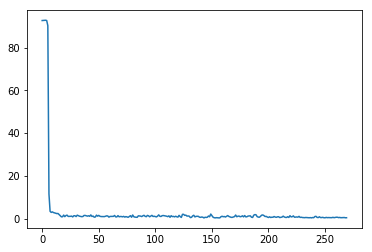

agent_value: 0.999678074262
input_value: 0.999268783878
output_value: 0.998273815853
mean diff: 0.39
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


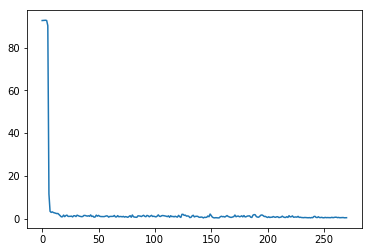

agent_value: 1.00070430753
input_value: 1.00086686806
output_value: 0.999391164871
mean diff: 0.404
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


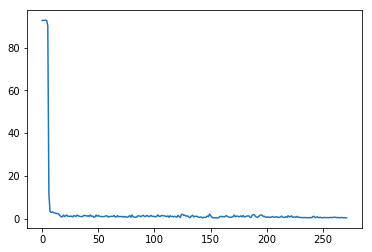

agent_value: 1.00020124265
input_value: 1.01341586728
output_value: 1.01469261332
mean diff: 0.356
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


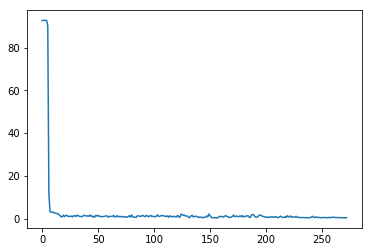

agent_value: 1.00069839232
input_value: 0.998980460067
output_value: 0.998636067082
mean diff: 0.362
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


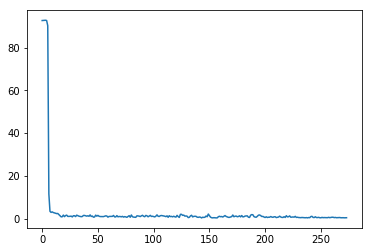

agent_value: 0.999311439274
input_value: 1.00113994745
output_value: 1.00008280155
mean diff: 0.39
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


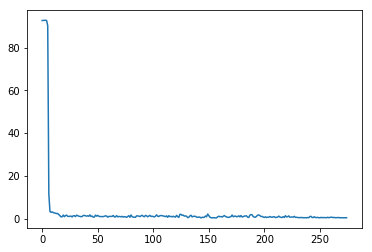

agent_value: 0.987421722544
input_value: 1.00241420415
output_value: 1.00054692694
mean diff: 0.388
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


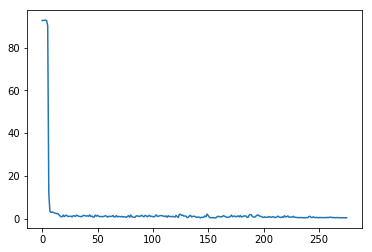

agent_value: 1.00035578424
input_value: 1.00130849187
output_value: 0.999984049471
mean diff: 0.4
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


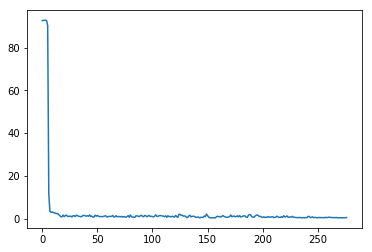

agent_value: 0.998900135481
input_value: 1.00587208842
output_value: 0.996174106711
mean diff: 0.48
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


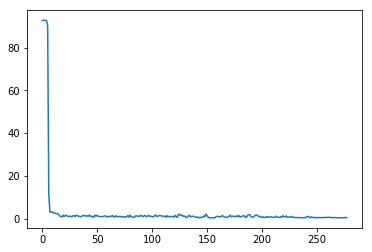

agent_value: 0.995255158605
input_value: 0.992347466106
output_value: 1.0133716652
mean diff: 0.402
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


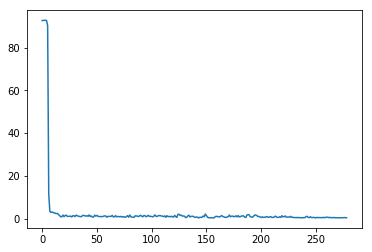

agent_value: 0.999217083153
input_value: 0.999550772697
output_value: 0.999826127218
mean diff: 0.376
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


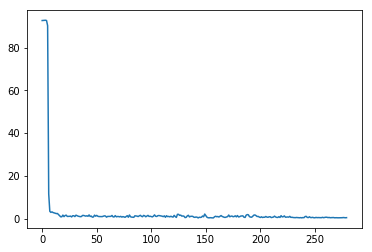

agent_value: 0.999216485695
input_value: 0.996339614021
output_value: 0.999669358253
mean diff: 0.422
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


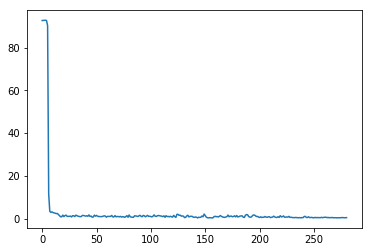

agent_value: 1.0006176781
input_value: 0.94030500495
output_value: 0.997478800063
mean diff: 0.436
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


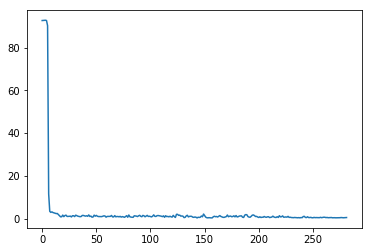

agent_value: 1.00126546038
input_value: 0.99888738724
output_value: 1.00167296129
mean diff: 0.478
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


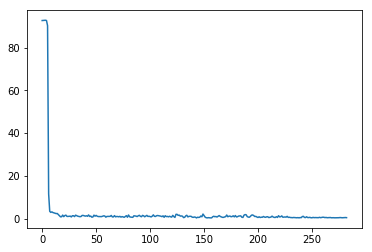

agent_value: 1.00356801876
input_value: 0.998017352504
output_value: 1.0015475092
mean diff: 0.42
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


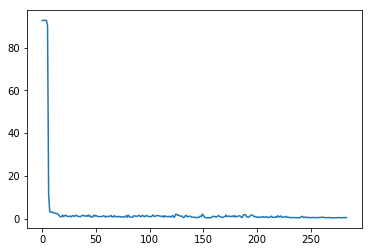

agent_value: 1.00009102817
input_value: 0.993901779783
output_value: 0.998407777622
mean diff: 0.444
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


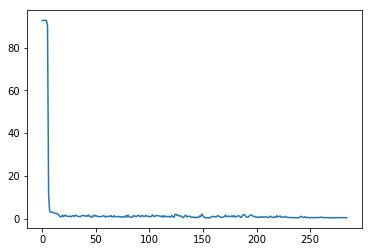

agent_value: 1.00058040316
input_value: 1.00221928914
output_value: 1.0008666491
mean diff: 0.342
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


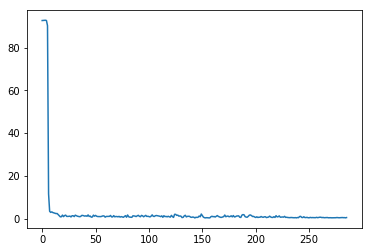

agent_value: 0.997924251667
input_value: 0.997690112128
output_value: 1.0002078989
mean diff: 0.466
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


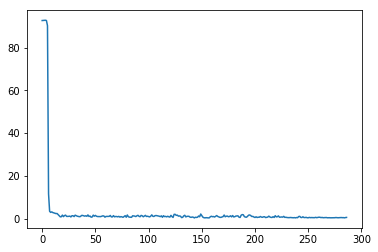

agent_value: 0.998602373844
input_value: 1.00123569372
output_value: 1.00025996292
mean diff: 0.534
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


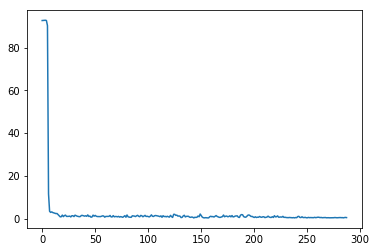

agent_value: 1.00038672312
input_value: 1.0001250527
output_value: 1.00145300555
mean diff: 0.45
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


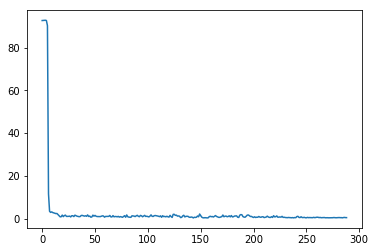

agent_value: 0.999314740173
input_value: 1.00005345651
output_value: 0.997836875411
mean diff: 0.432
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


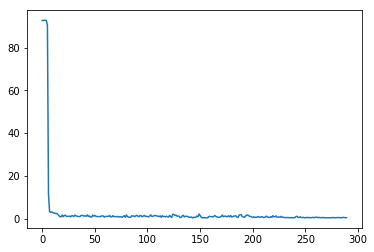

agent_value: 0.580542037358
input_value: 0.972259194052
output_value: 0.688848656575
mean diff: 0.418
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


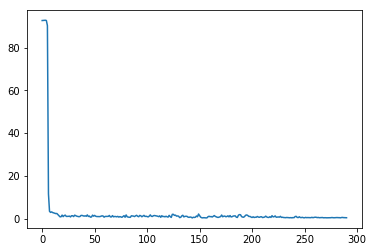

agent_value: 1.00073523753
input_value: 1.0005188604
output_value: 1.00061833863
mean diff: 0.386
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


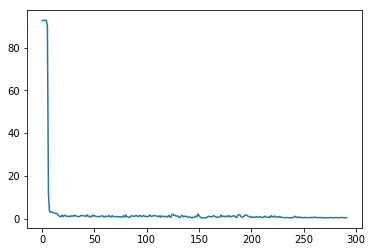

agent_value: 0.9995037419
input_value: 0.996795519475
output_value: 1.00034921863
mean diff: 0.388
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


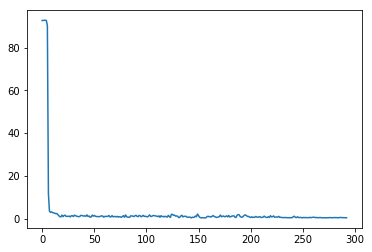

agent_value: 0.998742878518
input_value: 1.00276749499
output_value: 1.00214729614
mean diff: 0.38
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


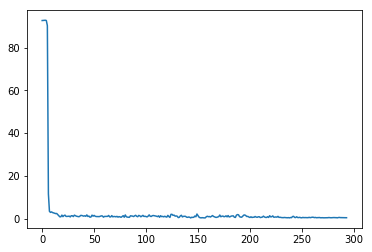

agent_value: 0.999418710705
input_value: 0.998405113254
output_value: 1.0009815945
mean diff: 0.392
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


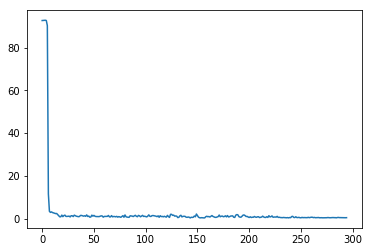

agent_value: 0.998865025323
input_value: 0.999241201297
output_value: 1.00187254372
mean diff: 0.416
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


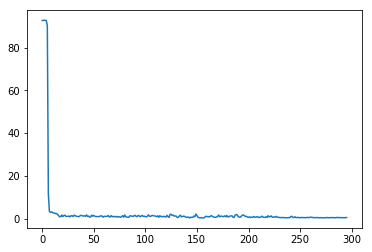

agent_value: 0.999413691219
input_value: 1.00100952119
output_value: 1.0019308347
mean diff: 0.486
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


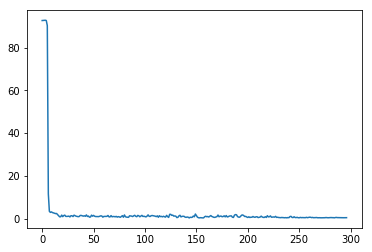

agent_value: 0.997517876687
input_value: 1.00168067017
output_value: 1.00287595076
mean diff: 0.418
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


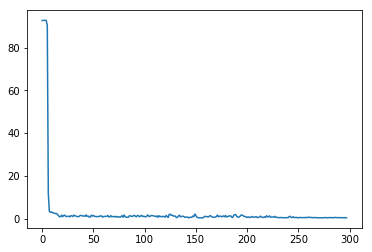

agent_value: 0.997174703466
input_value: 0.997720457733
output_value: 1.00053914875
mean diff: 0.394
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


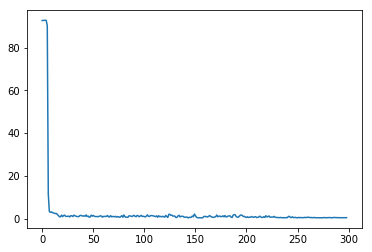

agent_value: 0.999771359679
input_value: 0.999089365426
output_value: 0.999249782656
mean diff: 0.444
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


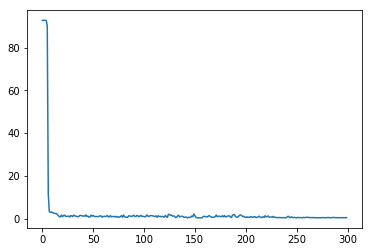

agent_value: 1.00223166954
input_value: 1.00005097685
output_value: 0.998973587507
mean diff: 0.448
mean o_gate_shared: 1.0
mean o_gate_non: 1.0


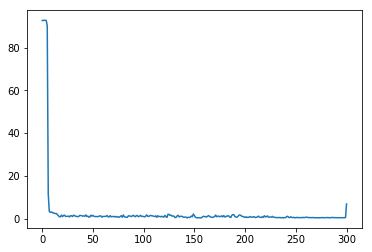

agent_value: 0.993641778957
input_value: 0.988732206076
output_value: 0.994953255242
mean diff: 6.838
mean o_gate_shared: 0.4142335766423358
mean o_gate_non: 0.6885041335205117


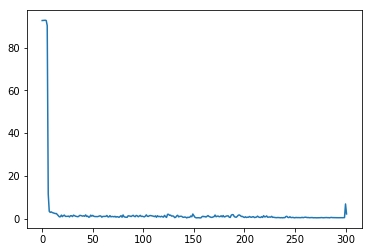

agent_value: 1.00326440074
input_value: 0.991030995201
output_value: 0.994404793972
mean diff: 2.165
mean o_gate_shared: 0.4385780395456458
mean o_gate_non: 0.896943231441048


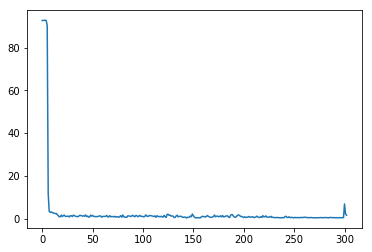

agent_value: 0.992076990921
input_value: 1.01296763901
output_value: 0.989565138347
mean diff: 1.571
mean o_gate_shared: 0.48038585209003215
mean o_gate_non: 0.9931068439192516


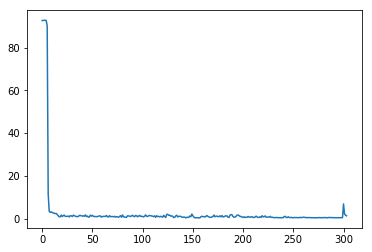

agent_value: 1.00252507744
input_value: 1.00189861144
output_value: 1.00227137203
mean diff: 1.284
mean o_gate_shared: 0.5649782259912904
mean o_gate_non: 0.991461332032203


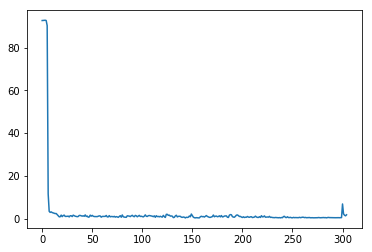

agent_value: 0.289489023158
input_value: 0.973357079275
output_value: 0.154982845943
mean diff: 1.762
mean o_gate_shared: 0.5600739371534196
mean o_gate_non: 0.9812454917047367


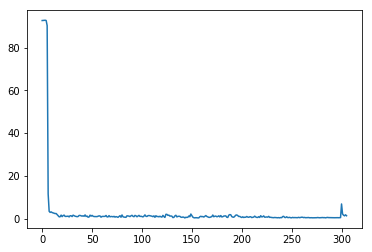

agent_value: 1.00025012931
input_value: 0.997300766753
output_value: 0.997747760988
mean diff: 1.32
mean o_gate_shared: 0.5915213071318172
mean o_gate_non: 0.9916132215096202


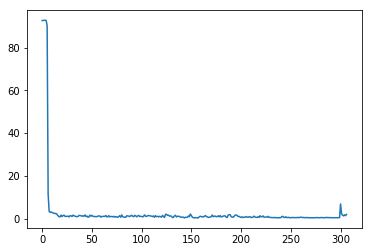

agent_value: 0.990961484134
input_value: 0.971562135384
output_value: 0.994371345057
mean diff: 1.96
mean o_gate_shared: 0.6459175424413904
mean o_gate_non: 0.9735973597359736


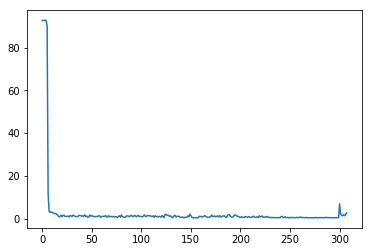

agent_value: 1.00134616757
input_value: 1.00757334427
output_value: 1.00120169972
mean diff: 2.626
mean o_gate_shared: 0.7387747998607727
mean o_gate_non: 0.9905109489051095


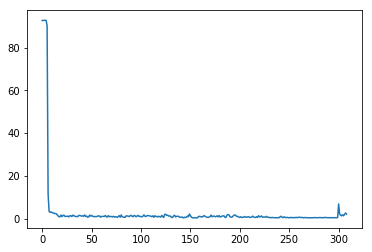

agent_value: 0.997424726771
input_value: 0.989852451299
output_value: 0.999068832184
mean diff: 2.112
mean o_gate_shared: 0.7254178002331908
mean o_gate_non: 0.9811957569913211


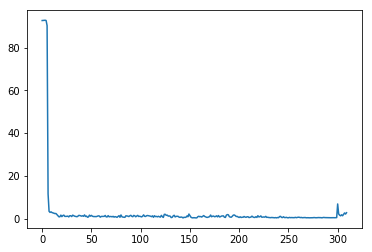

agent_value: 0.99065225489
input_value: 1.01110898143
output_value: 1.01580467428
mean diff: 2.73
mean o_gate_shared: 0.6046756899279311
mean o_gate_non: 0.9025089605734767


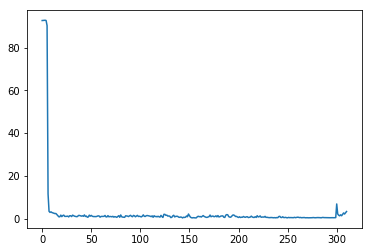

agent_value: 0.989783166099
input_value: 1.00443176972
output_value: 1.00063387494
mean diff: 3.293
mean o_gate_shared: 0.5031055900621118
mean o_gate_non: 0.804236669101534


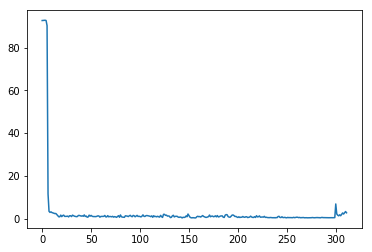

agent_value: 1.01079601425
input_value: 1.0061565675
output_value: 0.994842499106
mean diff: 2.702
mean o_gate_shared: 0.5072786436033567
mean o_gate_non: 0.8071998067165982


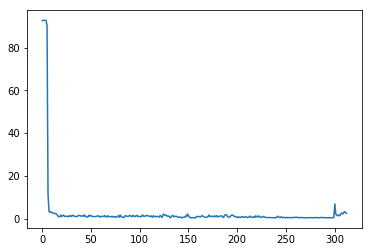

agent_value: 0.992044912591
input_value: 1.00028267389
output_value: 0.991146630372
mean diff: 2.506
mean o_gate_shared: 0.46227758007117437
mean o_gate_non: 0.7764791818845873


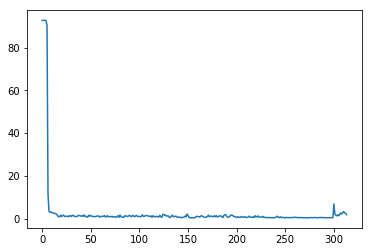

agent_value: 0.994924485297
input_value: 1.008264613
output_value: 1.00133626387
mean diff: 1.766
mean o_gate_shared: 0.48747980613893377
mean o_gate_non: 0.7480764457681807


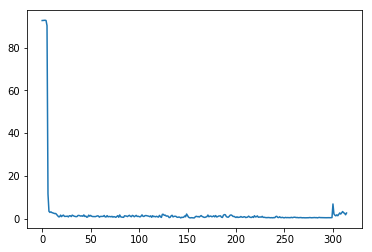

agent_value: 0.998742731319
input_value: 0.994268733243
output_value: 1.00308638594
mean diff: 2.584
mean o_gate_shared: 0.48211781206171106
mean o_gate_non: 0.68952802359882


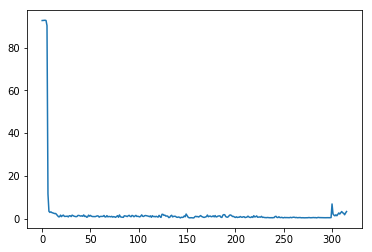

agent_value: 0.0327422512506
input_value: 1.00405327695
output_value: 1.00151609007
mean diff: 3.291
mean o_gate_shared: 0.5100806451612904
mean o_gate_non: 0.7168185176065008


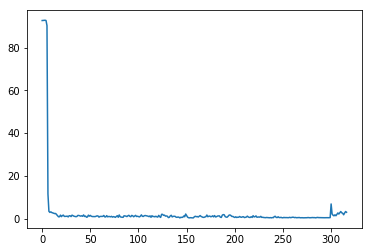

agent_value: 0.99326065604
input_value: 1.02097676087
output_value: 1.00986923016
mean diff: 2.958
mean o_gate_shared: 0.5846578008433344
mean o_gate_non: 0.6343711083437111


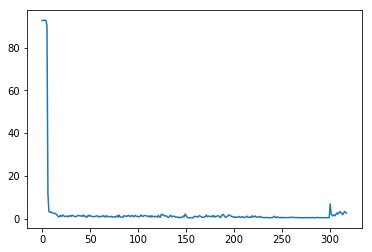

agent_value: 0.999938342676
input_value: 1.00909914443
output_value: 1.00195290357
mean diff: 2.579
mean o_gate_shared: 0.5758047767393562
mean o_gate_non: 0.621494167287168


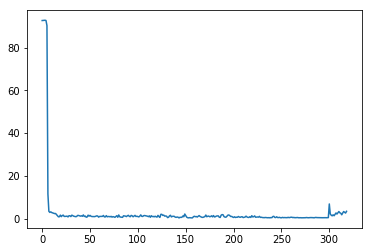

agent_value: 0.998809955098
input_value: 1.00493998567
output_value: 1.00769099518
mean diff: 3.393
mean o_gate_shared: 0.4543350817648874
mean o_gate_non: 0.6569539666993144


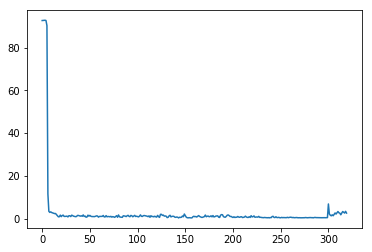

agent_value: 0.995580852302
input_value: 1.00878414779
output_value: 1.001252019
mean diff: 2.573
mean o_gate_shared: 0.40414057063326375
mean o_gate_non: 0.629227351271291


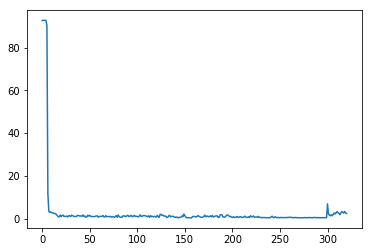

agent_value: 0.997429121516
input_value: 1.00050472421
output_value: 1.00020404353
mean diff: 2.394
mean o_gate_shared: 0.5146503685062017
mean o_gate_non: 0.6235059760956175


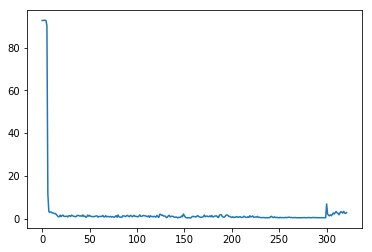

agent_value: 1.00608546864
input_value: 1.0113182438
output_value: 1.02589274408
mean diff: 2.76
mean o_gate_shared: 0.4781866464339909
mean o_gate_non: 0.858753456711338


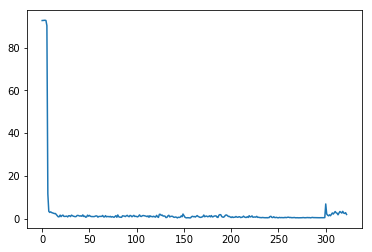

agent_value: 0.990712850175
input_value: 0.988884042627
output_value: 1.00848463036
mean diff: 1.923
mean o_gate_shared: 0.4790049751243781
mean o_gate_non: 0.9921741257031059


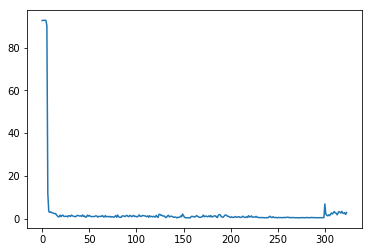

agent_value: 0.999736833385
input_value: 1.00743067711
output_value: 1.00464856826
mean diff: 2.848
mean o_gate_shared: 0.3552741209798367
mean o_gate_non: 0.9920477137176938


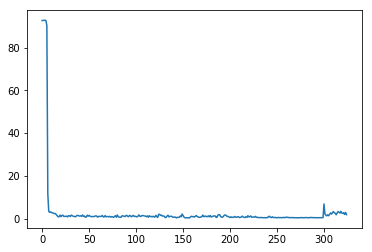

agent_value: 0.998870849878
input_value: 1.00500050286
output_value: 1.01154210493
mean diff: 1.838
mean o_gate_shared: 0.384321608040201
mean o_gate_non: 0.9233423712102539


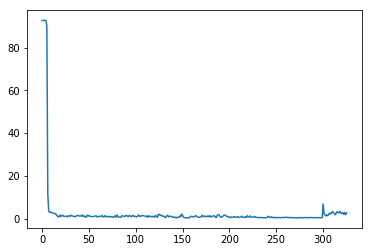

agent_value: 0.990768638009
input_value: 0.998691533743
output_value: 0.995413188771
mean diff: 2.662
mean o_gate_shared: 0.5317719993111761
mean o_gate_non: 0.9866303540480317


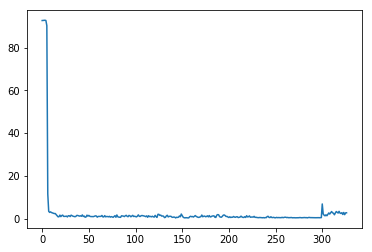

agent_value: 1.00614091249
input_value: 1.00512779275
output_value: 0.996943071506
mean diff: 2.706
mean o_gate_shared: 0.5597065847833504
mean o_gate_non: 0.9258893280632411


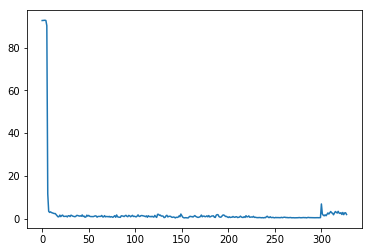

agent_value: 0.999753372308
input_value: 1.00386710648
output_value: 0.992485905108
mean diff: 1.903
mean o_gate_shared: 0.49247226624405704
mean o_gate_non: 0.935948361469712


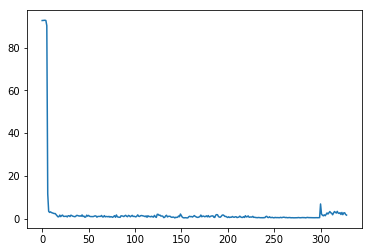

agent_value: 0.998712241434
input_value: 1.00029459843
output_value: 1.00066542465
mean diff: 1.614
mean o_gate_shared: 0.49498117942283565
mean o_gate_non: 0.9948096885813149


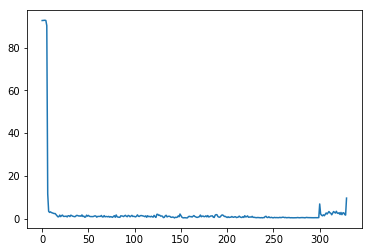

agent_value: 0.996335323778
input_value: 1.00846226303
output_value: 0.994741610934
mean diff: 9.581
mean o_gate_shared: 0.5095092545423672
mean o_gate_non: 0.841228939544103


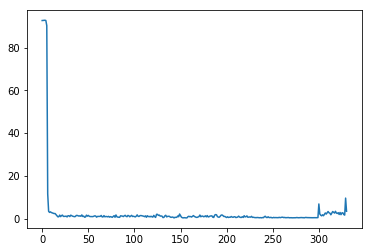

agent_value: 0.978366480799
input_value: 1.00884921608
output_value: 1.00307266666
mean diff: 3.432
mean o_gate_shared: 0.5553959418207937
mean o_gate_non: 0.8669275929549902


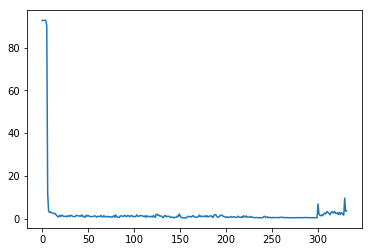

agent_value: 1.00262643814
input_value: 1.01259611444
output_value: 1.00538532022
mean diff: 3.666
mean o_gate_shared: 0.48556295916623954
mean o_gate_non: 0.8057199211045365


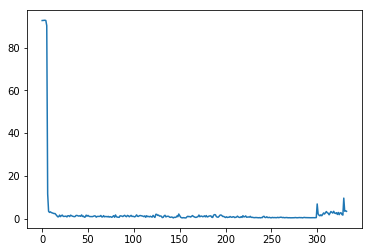

agent_value: 0.996680212963
input_value: 1.00021565117
output_value: 0.998027026463
mean diff: 3.401
mean o_gate_shared: 0.49636495819701926
mean o_gate_non: 0.8005842259006816


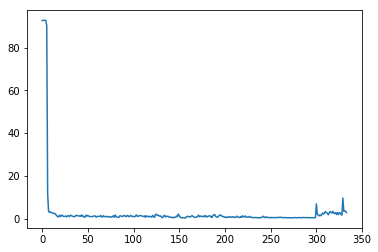

agent_value: 0.978889660551
input_value: 1.00993500225
output_value: 1.00517837419
mean diff: 2.746
mean o_gate_shared: 0.47468354430379744
mean o_gate_non: 0.7822757111597374


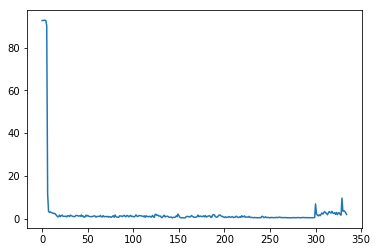

agent_value: 0.958279982418
input_value: 0.988729946764
output_value: 0.981045204785
mean diff: 1.926
mean o_gate_shared: 0.4120070629782225
mean o_gate_non: 0.7683407188577056


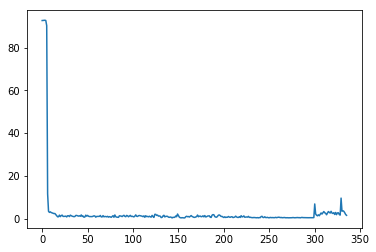

agent_value: 1.00400153639
input_value: 0.99592306902
output_value: 1.0051873217
mean diff: 1.521
mean o_gate_shared: 0.3689114781872088
mean o_gate_non: 0.7485133795837463


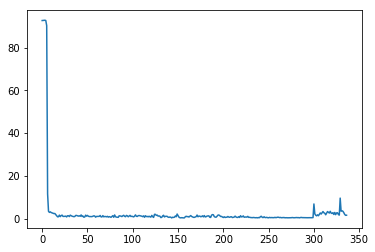

agent_value: 0.998678971765
input_value: 0.993604303123
output_value: 0.996252488437
mean diff: 1.57
mean o_gate_shared: 0.49157894736842106
mean o_gate_non: 0.6199161942321912


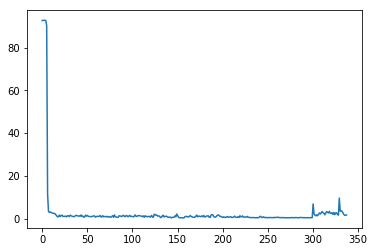

agent_value: 1.00641395581
input_value: 0.993932989537
output_value: 0.9946874421
mean diff: 1.694
mean o_gate_shared: 0.41816677012207737
mean o_gate_non: 0.6745796241345203


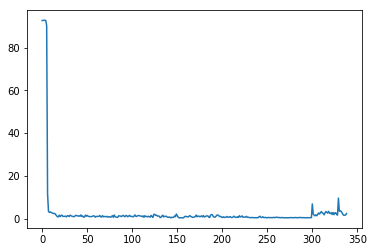

agent_value: 0.994505142747
input_value: 1.00519697414
output_value: 1.0078337514
mean diff: 2.357
mean o_gate_shared: 0.3940640085821563
mean o_gate_non: 0.8359025360517156


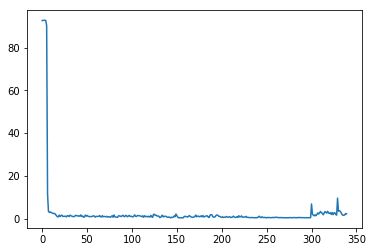

agent_value: 0.93327349746
input_value: 1.03233073474
output_value: 0.927379961437
mean diff: 2.196
mean o_gate_shared: 0.3511209931443394
mean o_gate_non: 0.8444554701066733


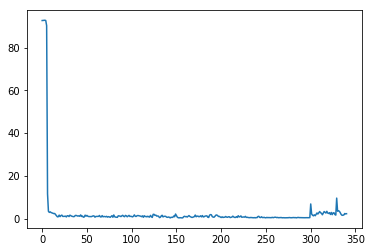

agent_value: 0.996494789246
input_value: 1.00610135599
output_value: 0.996176785406
mean diff: 2.277
mean o_gate_shared: 0.40860631905408024
mean o_gate_non: 0.7950877192982456


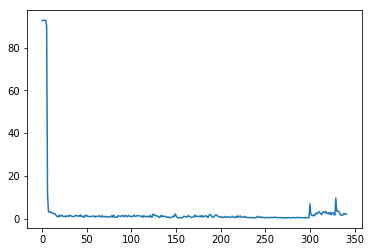

agent_value: 0.998403361219
input_value: 0.994079981796
output_value: 0.998396149968
mean diff: 2.031
mean o_gate_shared: 0.375
mean o_gate_non: 0.8551211321659871


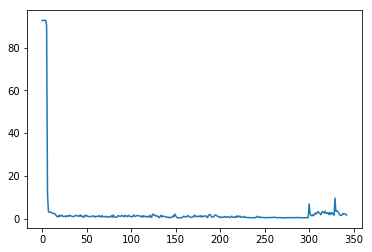

agent_value: 0.997661707717
input_value: 1.00775688004
output_value: 1.00283383833
mean diff: 1.585
mean o_gate_shared: 0.31308703819661865
mean o_gate_non: 0.8793658657418876


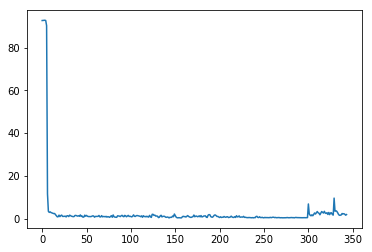

agent_value: 0.968976597381
input_value: 0.915717021445
output_value: 1.0359273709
mean diff: 1.868
mean o_gate_shared: 0.3926795305351104
mean o_gate_non: 0.7760416666666666


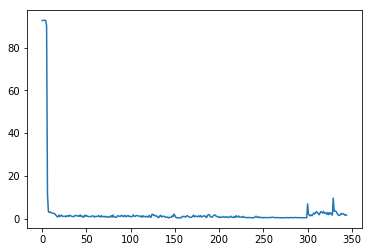

agent_value: 0.996524579932
input_value: 0.993988927139
output_value: 1.00070644749
mean diff: 1.549
mean o_gate_shared: 0.4337064141196728
mean o_gate_non: 0.7835351089588378


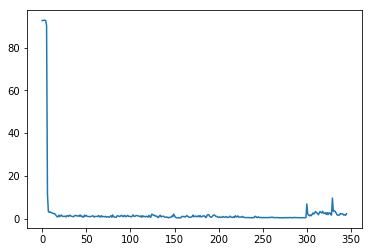

agent_value: 1.01310867378
input_value: 0.992130841282
output_value: 1.00532038506
mean diff: 2.291
mean o_gate_shared: 0.5209941630578045
mean o_gate_non: 0.7480657640232108


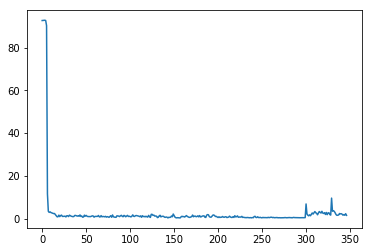

agent_value: 0.998165097478
input_value: 0.999479513612
output_value: 1.00140453335
mean diff: 1.508
mean o_gate_shared: 0.5372133275638252
mean o_gate_non: 0.7593543653705063


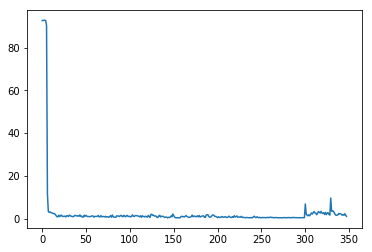

agent_value: 0.994439305881
input_value: 0.999498103753
output_value: 0.996305855959
mean diff: 1.048
mean o_gate_shared: 0.4958128078817734
mean o_gate_non: 0.8341092869394756


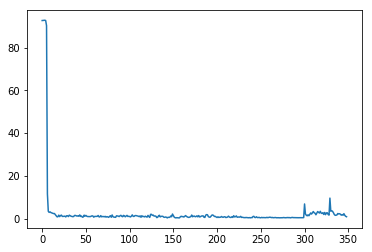

agent_value: 1.00293885648
input_value: 0.996932064075
output_value: 0.999598175376
mean diff: 0.866
mean o_gate_shared: 0.45586396599149787
mean o_gate_non: 0.8403237674760854


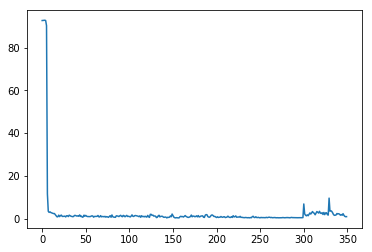

agent_value: 0.998282862646
input_value: 1.00162501108
output_value: 1.00023222462
mean diff: 0.904
mean o_gate_shared: 0.5858483388283033
mean o_gate_non: 0.7575608556675683


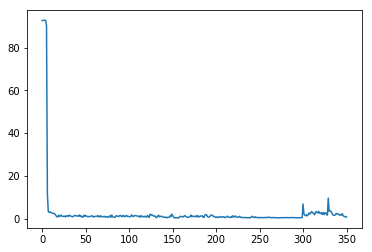

agent_value: 0.986611997699
input_value: 0.998182690115
output_value: 0.985518009613
mean diff: 0.676
mean o_gate_shared: 0.7252776308831306
mean o_gate_non: 0.8705565089482716


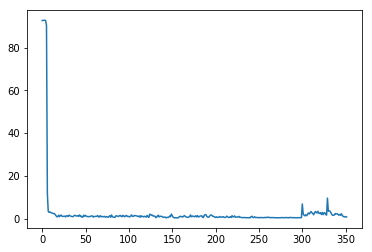

agent_value: 0.997991933154
input_value: 1.00076844117
output_value: 1.00412732431
mean diff: 0.806
mean o_gate_shared: 0.6961184882533197
mean o_gate_non: 0.7649499633878447


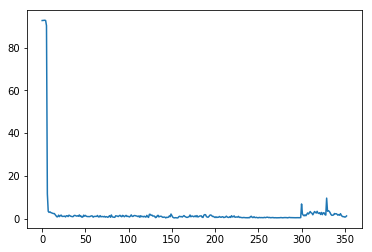

agent_value: 0.997034304706
input_value: 0.999021255437
output_value: 1.00083220721
mean diff: 1.228
mean o_gate_shared: 0.6904706157808476
mean o_gate_non: 0.7795218546244869


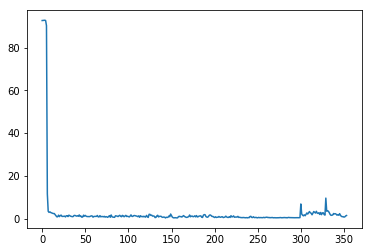

agent_value: 0.999199024453
input_value: 1.00524675011
output_value: 1.01251898626
mean diff: 1.424
mean o_gate_shared: 0.6895634832705517
mean o_gate_non: 0.7229384577961566


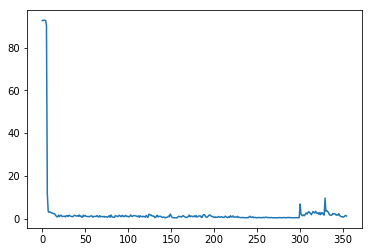

agent_value: 0.999330562234
input_value: 1.00077459388
output_value: 1.00449464973
mean diff: 1.19
mean o_gate_shared: 0.6901539897340178
mean o_gate_non: 0.8858536585365854


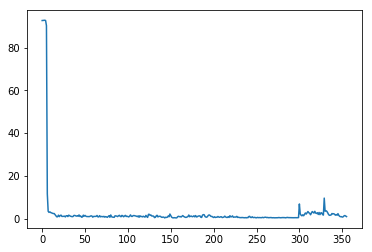

agent_value: 0.998807307138
input_value: 0.998777264614
output_value: 1.00162988642
mean diff: 0.936
mean o_gate_shared: 0.53458177278402
mean o_gate_non: 0.8784046692607004


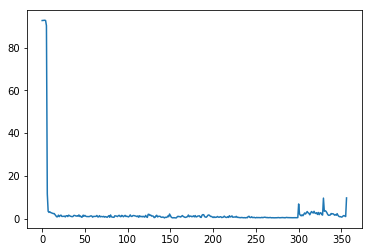

agent_value: 0.990147349283
input_value: 1.00319057435
output_value: 0.997031993342
mean diff: 9.668
mean o_gate_shared: 0.6875335223354532
mean o_gate_non: 0.8341013824884793


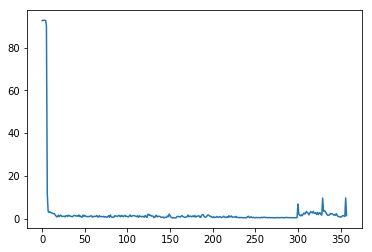

agent_value: 0.99005523497
input_value: 1.00326666546
output_value: 1.00027733277
mean diff: 1.426
mean o_gate_shared: 0.8156836461126006
mean o_gate_non: 0.8064516129032258


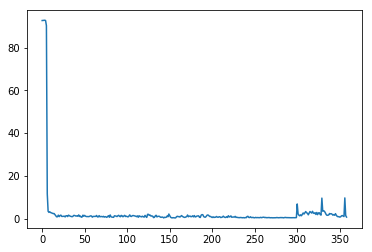

agent_value: 0.999360866312
input_value: 1.00183317833
output_value: 1.00375888508
mean diff: 0.692
mean o_gate_shared: 0.8417542959733265
mean o_gate_non: 0.7597322092734937


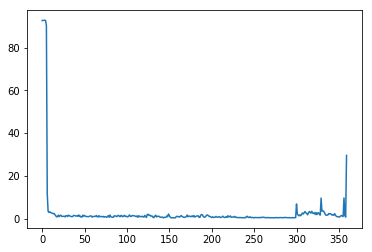

agent_value: 0.920702889233
input_value: 0.945686149086
output_value: 0.925178332695
mean diff: 29.584
mean o_gate_shared: 0.7286528118137552
mean o_gate_non: 0.519907159435815


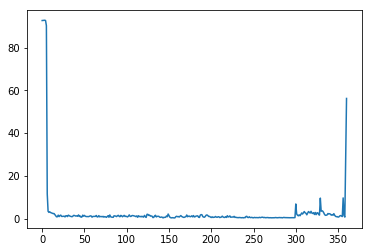

agent_value: 0.997629400717
input_value: 0.928270139917
output_value: 0.959987796903
mean diff: 56.25
mean o_gate_shared: 0.5505110256663052
mean o_gate_non: 0.5929902115566782


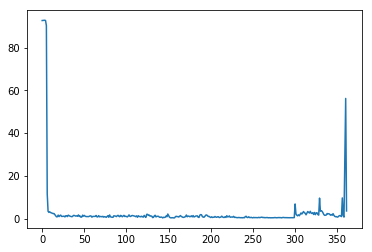

agent_value: 0.995859745194
input_value: 0.99337204703
output_value: 1.00104586131
mean diff: 3.55
mean o_gate_shared: 0.4425312096427034
mean o_gate_non: 0.6567699836867863


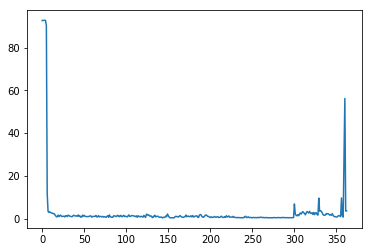

agent_value: 0.995319414879
input_value: 0.998839418739
output_value: 0.996748967662
mean diff: 3.595
mean o_gate_shared: 0.4439862542955326
mean o_gate_non: 0.6708781781313368


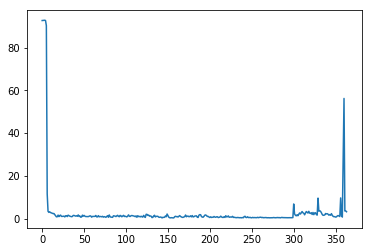

agent_value: 0.815925943245
input_value: 0.506281946429
output_value: 1.01850856008
mean diff: 3.194
mean o_gate_shared: 0.4249084249084249
mean o_gate_non: 0.7062634989200864


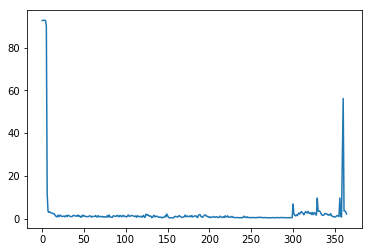

agent_value: 0.992706081352
input_value: 1.00214110102
output_value: 1.00316817459
mean diff: 2.148
mean o_gate_shared: 0.42335073564309444
mean o_gate_non: 0.8355951919348584


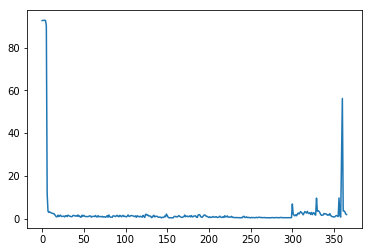

agent_value: 1.00465328579
input_value: 1.0046142406
output_value: 1.00511006282
mean diff: 1.902
mean o_gate_shared: 0.5610775661867162
mean o_gate_non: 0.8343815513626834


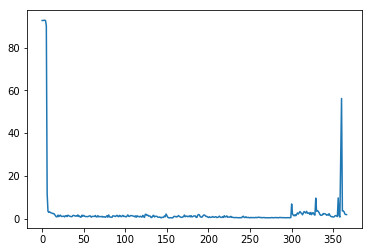

agent_value: 0.998087296919
input_value: 0.986825625147
output_value: 0.995552185267
mean diff: 1.848
mean o_gate_shared: 0.6852854330708661
mean o_gate_non: 0.7405153175086224


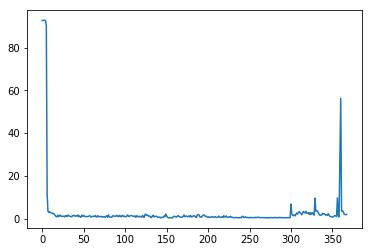

agent_value: 1.00787075539
input_value: 0.996135210303
output_value: 0.975209024797
mean diff: 1.912
mean o_gate_shared: 0.6571910383040231
mean o_gate_non: 0.731520644511581


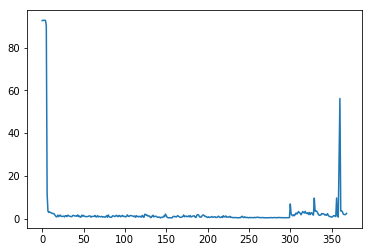

agent_value: 0.791486298652
input_value: 0.787181983261
output_value: 0.73784944606
mean diff: 2.43
mean o_gate_shared: 0.48865388852170083
mean o_gate_non: 0.7934846989141164


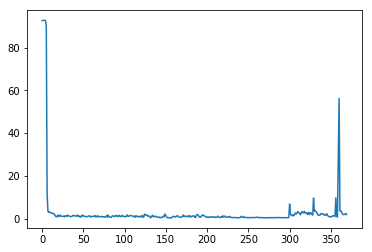

agent_value: 0.999957638484
input_value: 0.999740071918
output_value: 0.997831175524
mean diff: 1.916
mean o_gate_shared: 0.5058176433255764
mean o_gate_non: 0.8839002267573696


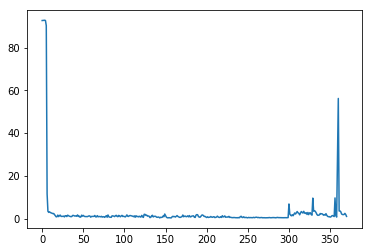

agent_value: 0.996656608775
input_value: 0.999748355444
output_value: 1.00386891616
mean diff: 1.018
mean o_gate_shared: 0.5609521519596057
mean o_gate_non: 0.8878780427833785


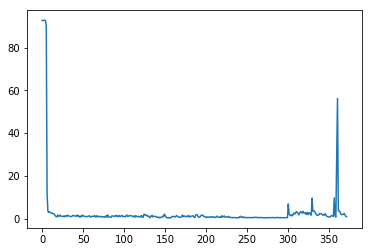

agent_value: 0.999898258398
input_value: 0.9991367392
output_value: 0.99957443998
mean diff: 0.844
mean o_gate_shared: 0.7187578894218631
mean o_gate_non: 0.9026853904902685


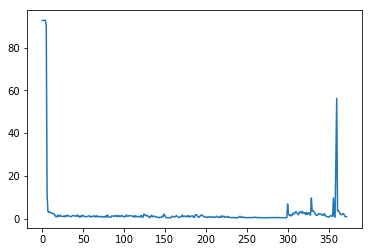

agent_value: 0.990729566061
input_value: 1.00041055231
output_value: 1.00415994749
mean diff: 0.866
mean o_gate_shared: 0.6877067956222958
mean o_gate_non: 0.8942354665363947


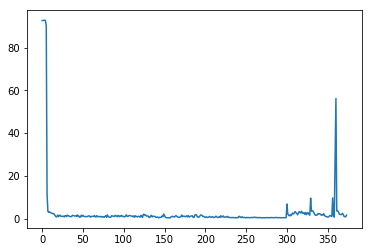

agent_value: 1.00080988134
input_value: 0.974090070973
output_value: 1.01178696376
mean diff: 1.578
mean o_gate_shared: 0.5711301926200975
mean o_gate_non: 0.8310901749663526


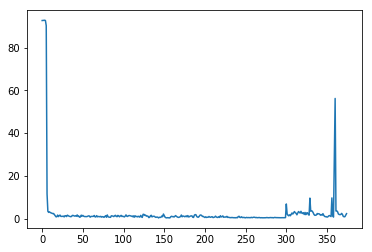

agent_value: 0.949698489711
input_value: 0.968302702508
output_value: 0.920288619975
mean diff: 2.296
mean o_gate_shared: 0.5073170731707317
mean o_gate_non: 0.8657314629258517


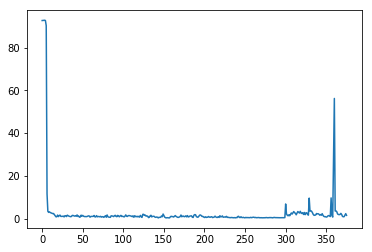

agent_value: 0.995474276915
input_value: 1.00397447028
output_value: 0.997048857072
mean diff: 1.514
mean o_gate_shared: 0.6068376068376068
mean o_gate_non: 0.5434362934362934


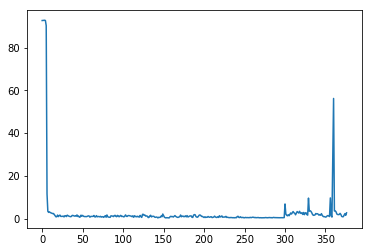

agent_value: 0.996566533938
input_value: 1.01043476764
output_value: 0.995034996233
mean diff: 2.677
mean o_gate_shared: 0.6111217641418983
mean o_gate_non: 0.6764831412718737


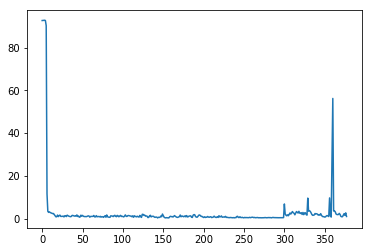

agent_value: 0.999897587159
input_value: 1.00207302981
output_value: 1.00058720914
mean diff: 0.982
mean o_gate_shared: 0.4825679249819668
mean o_gate_non: 0.62873364601333


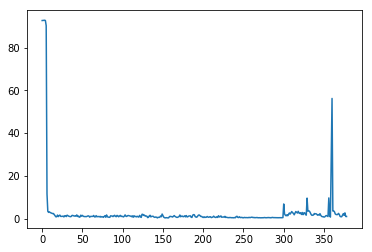

agent_value: 1.00061898815
input_value: 1.00350297376
output_value: 1.00225263808
mean diff: 0.958
mean o_gate_shared: 0.493886358187485
mean o_gate_non: 0.6220024721878863


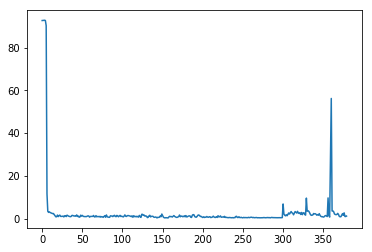

agent_value: 0.997490358985
input_value: 1.00149008738
output_value: 0.996514631682
mean diff: 1.172
mean o_gate_shared: 0.48475120385232745
mean o_gate_non: 0.6093903638151426


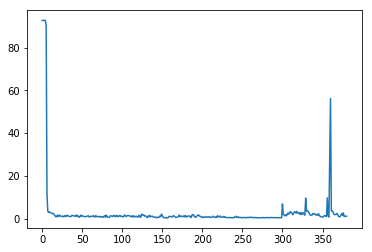

agent_value: 0.990243526747
input_value: 0.98787261641
output_value: 1.01103237826
mean diff: 1.102
mean o_gate_shared: 0.5353982300884956
mean o_gate_non: 0.6161963190184049


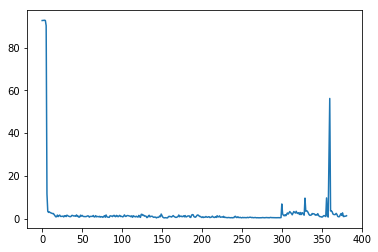

agent_value: 0.996305074822
input_value: 1.00020580521
output_value: 0.996592551884
mean diff: 1.33
mean o_gate_shared: 0.594777127420081
mean o_gate_non: 0.626741627963823


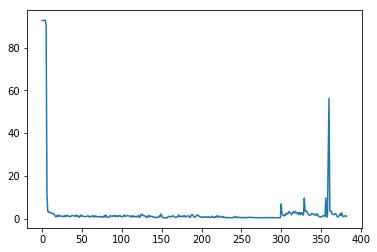

agent_value: 0.999403459141
input_value: 1.00038103471
output_value: 1.00193580173
mean diff: 1.086
mean o_gate_shared: 0.7504703668861712
mean o_gate_non: 0.8040324563560364


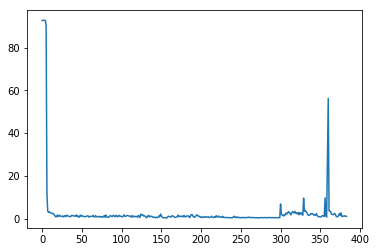

agent_value: 0.991088123993
input_value: 0.993699543721
output_value: 1.0121438084
mean diff: 0.994
mean o_gate_shared: 0.7502408477842004
mean o_gate_non: 0.8193215339233039


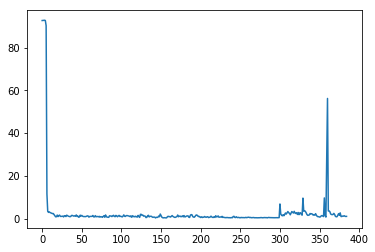

agent_value: 0.995623629165
input_value: 1.00902222432
output_value: 0.994972831902
mean diff: 1.024
mean o_gate_shared: 0.7587378640776699
mean o_gate_non: 0.7892786561264822


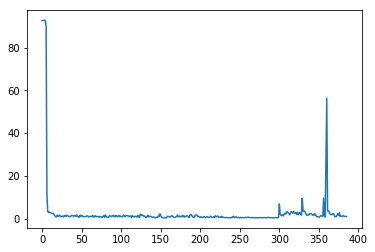

agent_value: 0.999960125271
input_value: 1.00807975522
output_value: 1.00808642553
mean diff: 0.974
mean o_gate_shared: 0.776682277544984
mean o_gate_non: 0.689757545769421


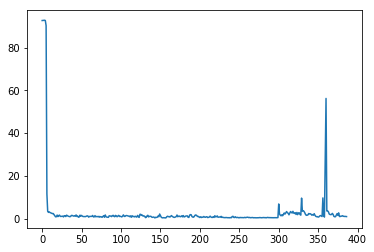

agent_value: 0.999162600283
input_value: 1.00156359771
output_value: 0.999748118686
mean diff: 0.934
mean o_gate_shared: 0.7493887530562348
mean o_gate_non: 0.6258586849852796


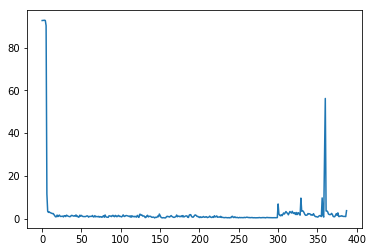

agent_value: 0.994018022877
input_value: 1.01851233048
output_value: 1.00427859955
mean diff: 3.702
mean o_gate_shared: 0.5571128241065172
mean o_gate_non: 0.781908777309314


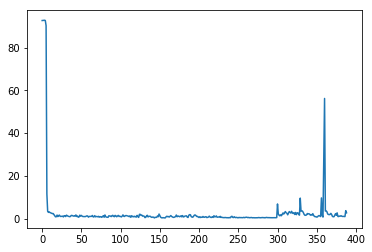

agent_value: 0.989757780183
input_value: 0.989862309635
output_value: 0.999998107171
mean diff: 2.714
mean o_gate_shared: 0.6136552872606161
mean o_gate_non: 0.8843975785979301


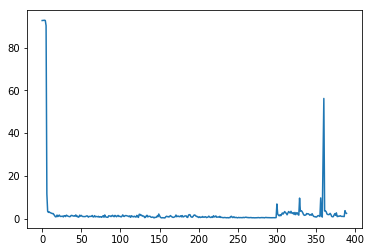

agent_value: 0.993016326259
input_value: 0.980986224362
output_value: 1.00000841767
mean diff: 2.448
mean o_gate_shared: 0.6564444444444445
mean o_gate_non: 0.8827774527013849


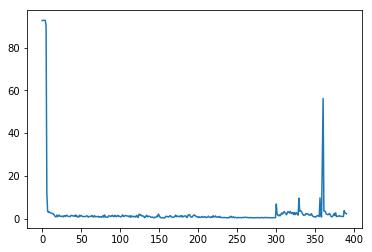

agent_value: 0.988359479255
input_value: 0.976563754378
output_value: 0.995541792204
mean diff: 2.258
mean o_gate_shared: 0.6254971739585514
mean o_gate_non: 0.8674185997020643


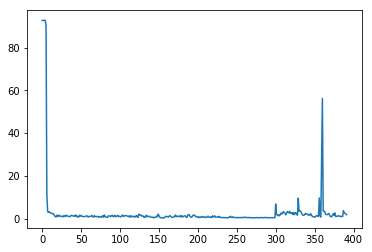

agent_value: 1.00032562343
input_value: 1.0081580732
output_value: 0.999570831675
mean diff: 1.802
mean o_gate_shared: 0.6659206510681587
mean o_gate_non: 0.8051821070642875


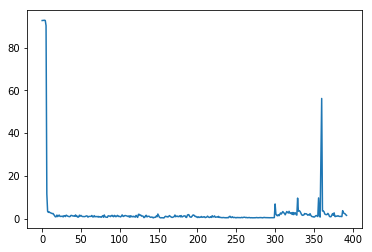

agent_value: 0.997466669045
input_value: 1.01608024325
output_value: 1.00755354506
mean diff: 1.508
mean o_gate_shared: 0.7164551223934723
mean o_gate_non: 0.8491895701198027


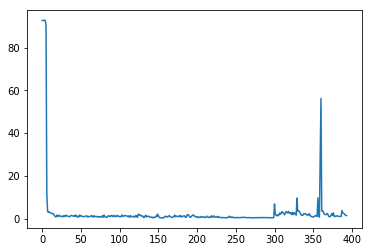

agent_value: 0.982700516726
input_value: 1.00226806913
output_value: 1.01815160031
mean diff: 1.403
mean o_gate_shared: 0.6991230042725433
mean o_gate_non: 0.8525301204819277


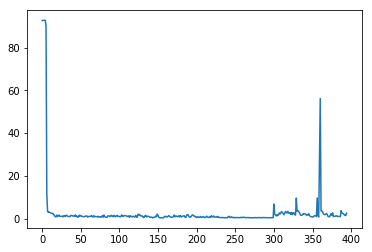

agent_value: 0.998082266578
input_value: 0.994625648742
output_value: 0.98720859423
mean diff: 2.534
mean o_gate_shared: 0.6245202989295092
mean o_gate_non: 0.9242171189979124


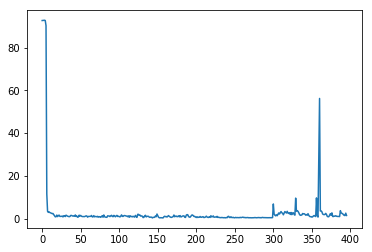

agent_value: 1.00528773324
input_value: 0.996692929675
output_value: 1.00032762177
mean diff: 1.454
mean o_gate_shared: 0.5978112175102599
mean o_gate_non: 0.8673445805407903


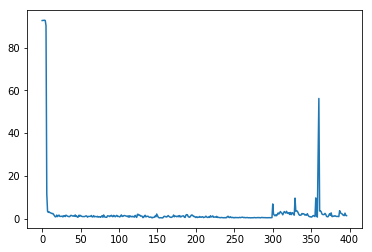

agent_value: 1.00126590126
input_value: 1.00605317969
output_value: 1.00163841529
mean diff: 1.372
mean o_gate_shared: 0.6194968553459119
mean o_gate_non: 0.7323702252693438


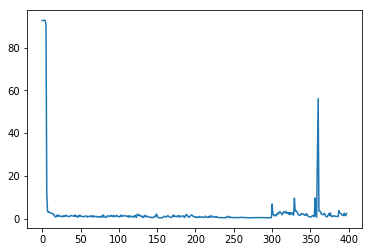

agent_value: 0.99151941504
input_value: 0.972992656563
output_value: 1.00324833467
mean diff: 2.407
mean o_gate_shared: 0.5738261361493494
mean o_gate_non: 0.839096357768557


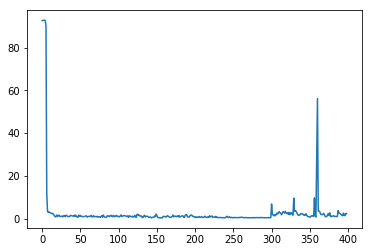

agent_value: 1.00468145933
input_value: 1.00012968131
output_value: 0.97773845263
mean diff: 2.279
mean o_gate_shared: 0.6517933390264731
mean o_gate_non: 0.6688810462943741


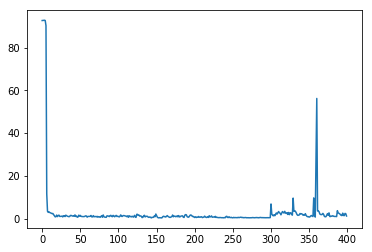

agent_value: 1.00597124905
input_value: 0.997526815518
output_value: 0.997529069269
mean diff: 1.197
mean o_gate_shared: 0.7136898920510304
mean o_gate_non: 0.8378942486085343


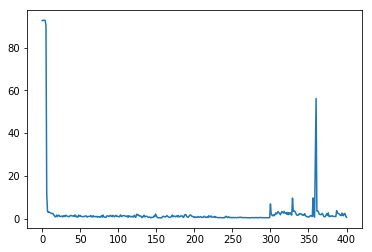

agent_value: 1.00021188783
input_value: 1.00238215717
output_value: 1.00032304247
mean diff: 0.57
mean o_gate_shared: 0.7109520021214532
mean o_gate_non: 1.0


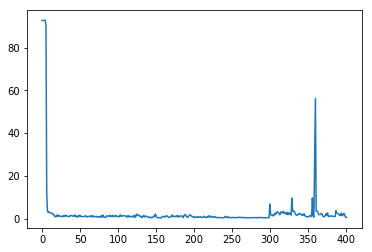

agent_value: 1.00175710611
input_value: 0.996960499887
output_value: 1.00230179351
mean diff: 0.542
mean o_gate_shared: 0.732
mean o_gate_non: 1.0


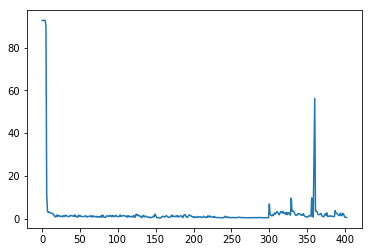

agent_value: 0.999944644497
input_value: 0.997845202904
output_value: 0.99801487739
mean diff: 0.534
mean o_gate_shared: 0.7387001872158331
mean o_gate_non: 1.0


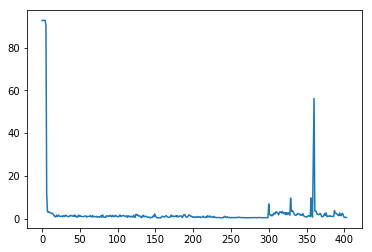

agent_value: 0.999912929
input_value: 0.998581735559
output_value: 1.00042746258
mean diff: 0.516
mean o_gate_shared: 0.7291275167785235
mean o_gate_non: 1.0


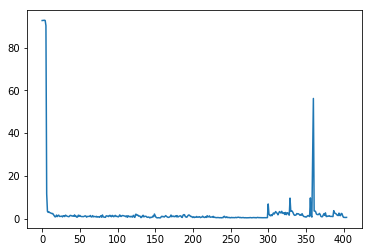

agent_value: 1.00001275686
input_value: 0.999708464637
output_value: 0.995481156257
mean diff: 0.554
mean o_gate_shared: 0.7407809110629068
mean o_gate_non: 1.0


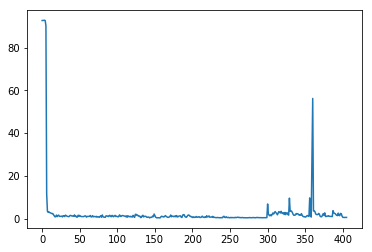

agent_value: 0.999947344945
input_value: 1.00029633184
output_value: 0.998350136453
mean diff: 0.536
mean o_gate_shared: 0.7362903225806452
mean o_gate_non: 1.0


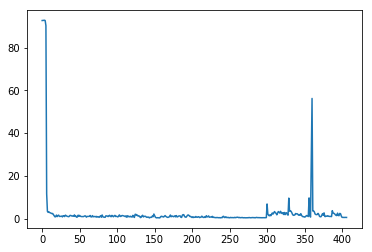

agent_value: 1.00001522718
input_value: 0.998293855456
output_value: 1.00309317569
mean diff: 0.526
mean o_gate_shared: 0.7268640930724485
mean o_gate_non: 1.0


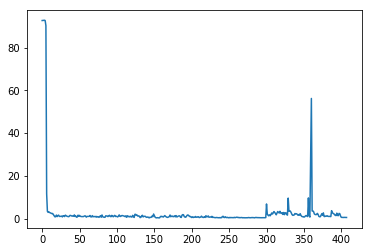

agent_value: 1.00000495832
input_value: 1.00149578886
output_value: 0.995625984805
mean diff: 0.512
mean o_gate_shared: 0.7392695281258331
mean o_gate_non: 1.0


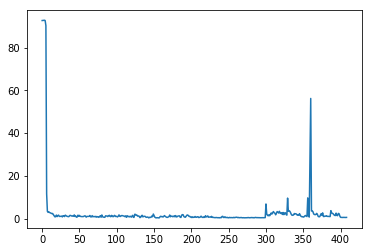

agent_value: 1.00000212018
input_value: 1.00151274434
output_value: 1.00215789275
mean diff: 0.546
mean o_gate_shared: 0.7333156779661016
mean o_gate_non: 1.0


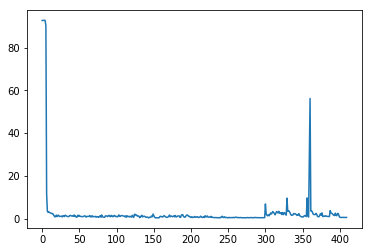

agent_value: 1.00000368066
input_value: 0.997571910168
output_value: 1.00330395128
mean diff: 0.546
mean o_gate_shared: 0.7330497208189312
mean o_gate_non: 1.0


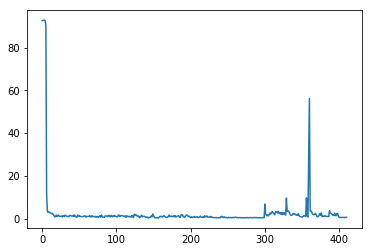

agent_value: 1.00000040493
input_value: 0.999532579932
output_value: 1.00090168592
mean diff: 0.582
mean o_gate_shared: 0.7183544303797469
mean o_gate_non: 1.0


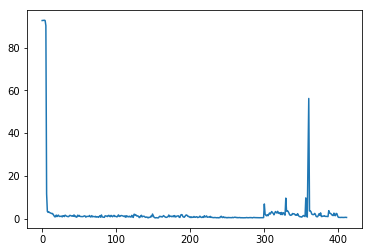

agent_value: 1.00000011328
input_value: 0.998731546298
output_value: 0.999613977591
mean diff: 0.524
mean o_gate_shared: 0.7377885131508319
mean o_gate_non: 1.0


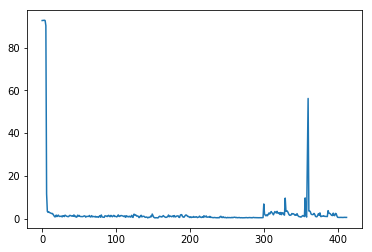

agent_value: 1.0000002011
input_value: 1.00225941551
output_value: 1.00216788968
mean diff: 0.544
mean o_gate_shared: 0.7342562432138979
mean o_gate_non: 1.0


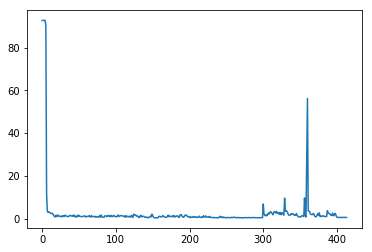

agent_value: 1.00000002362
input_value: 0.999103447878
output_value: 0.998933785996
mean diff: 0.504
mean o_gate_shared: 0.7299919159256265
mean o_gate_non: 1.0


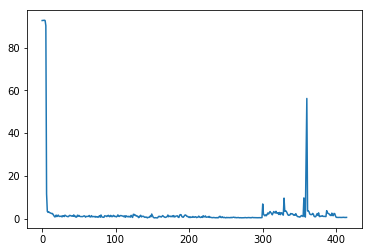

agent_value: 0.999999977339
input_value: 0.998242460074
output_value: 0.997001717067
mean diff: 0.548
mean o_gate_shared: 0.7294971766603926
mean o_gate_non: 1.0


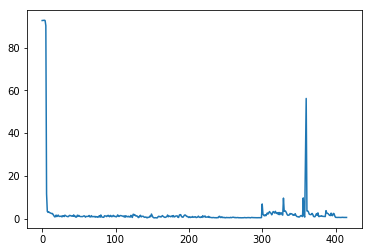

agent_value: 1.00000001429
input_value: 1.00131612551
output_value: 1.00062295331
mean diff: 0.526
mean o_gate_shared: 0.7239346019833824
mean o_gate_non: 1.0


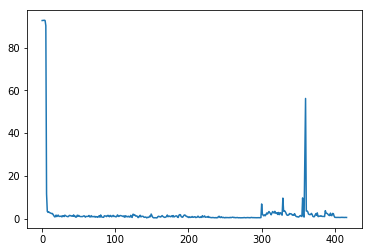

agent_value: 1.00000000249
input_value: 0.998319958409
output_value: 0.998266855498
mean diff: 0.516
mean o_gate_shared: 0.7381212452211906
mean o_gate_non: 1.0


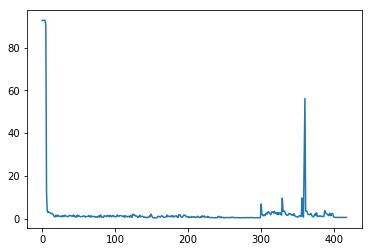

agent_value: 1.00000000585
input_value: 1.00001219739
output_value: 1.00183679261
mean diff: 0.514
mean o_gate_shared: 0.7310901749663526
mean o_gate_non: 1.0


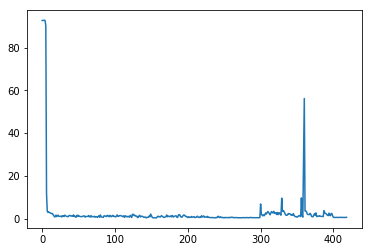

agent_value: 1.00000000203
input_value: 1.00103614632
output_value: 0.999603624034
mean diff: 0.58
mean o_gate_shared: 0.7249606712113267
mean o_gate_non: 1.0


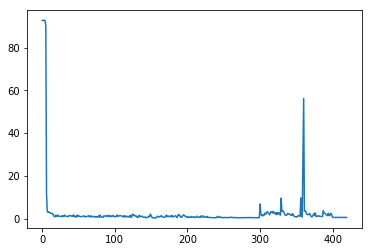

agent_value: 1.00000000091
input_value: 1.00026481432
output_value: 1.00154579733
mean diff: 0.518
mean o_gate_shared: 0.7358642972536349
mean o_gate_non: 1.0


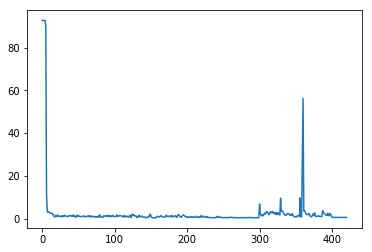

agent_value: 1.00000000088
input_value: 1.00107389764
output_value: 1.00333540531
mean diff: 0.51
mean o_gate_shared: 0.7432646592709984
mean o_gate_non: 1.0


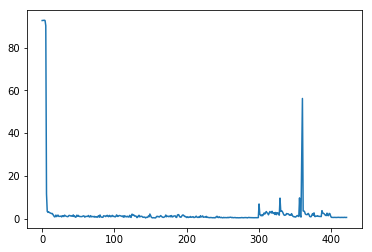

agent_value: 1.00000000022
input_value: 1.00013714774
output_value: 0.997569128271
mean diff: 0.534
mean o_gate_shared: 0.7354581673306773
mean o_gate_non: 1.0


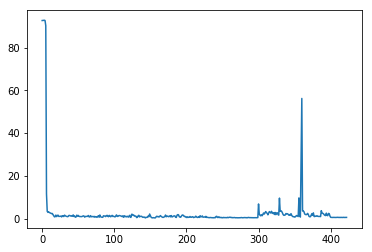

agent_value: 0.999999999834
input_value: 0.999465070941
output_value: 0.999798213914
mean diff: 0.546
mean o_gate_shared: 0.7254796001080789
mean o_gate_non: 1.0


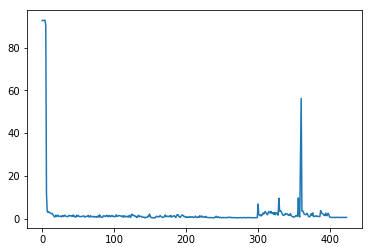

agent_value: 0.999999999975
input_value: 0.998654806512
output_value: 1.00281114536
mean diff: 0.538
mean o_gate_shared: 0.7306122448979592
mean o_gate_non: 1.0


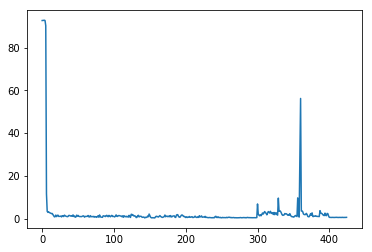

agent_value: 1.00000000006
input_value: 0.99998660734
output_value: 1.0000158614
mean diff: 0.57
mean o_gate_shared: 0.7201166180758017
mean o_gate_non: 1.0


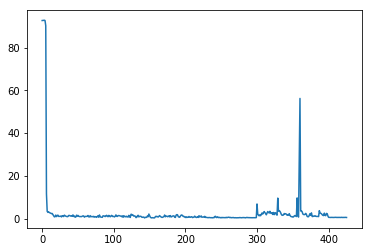

agent_value: 0.999999999995
input_value: 1.00260347402
output_value: 1.00211909271
mean diff: 0.506
mean o_gate_shared: 0.7265561293829845
mean o_gate_non: 1.0


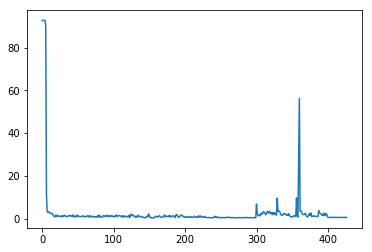

agent_value: 1.00000000002
input_value: 0.998875043435
output_value: 1.00197546782
mean diff: 0.532
mean o_gate_shared: 0.7416688882964543
mean o_gate_non: 1.0


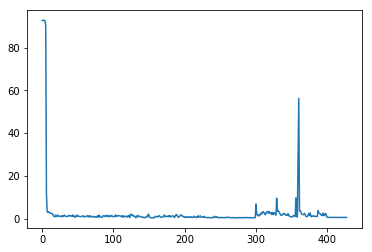

agent_value: 1.00000000001
input_value: 1.00093885783
output_value: 1.00026913764
mean diff: 0.538
mean o_gate_shared: 0.7286905082011293
mean o_gate_non: 1.0


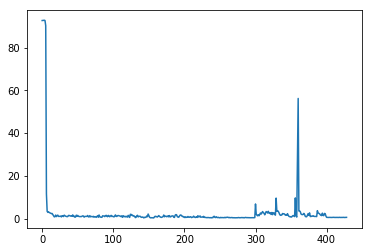

agent_value: 1.0
input_value: 1.00050715367
output_value: 0.999823422991
mean diff: 0.566
mean o_gate_shared: 0.7310746426680783
mean o_gate_non: 1.0


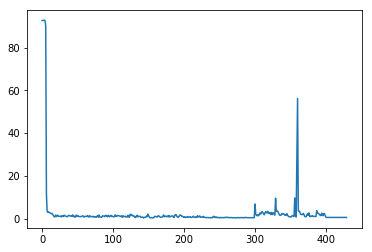

agent_value: 1.0
input_value: 0.99971978897
output_value: 0.999933222789
mean diff: 0.502
mean o_gate_shared: 0.7281081081081081
mean o_gate_non: 1.0


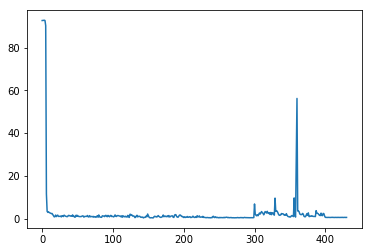

agent_value: 1.0
input_value: 1.0011615121
output_value: 1.00221288489
mean diff: 0.538
mean o_gate_shared: 0.726984126984127
mean o_gate_non: 1.0


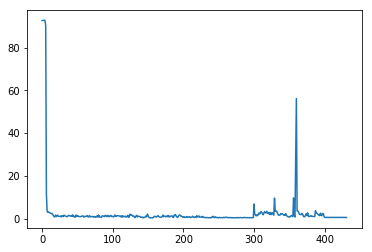

agent_value: 1.0
input_value: 0.999731317745
output_value: 1.0001474804
mean diff: 0.49
mean o_gate_shared: 0.7420399352401511
mean o_gate_non: 1.0


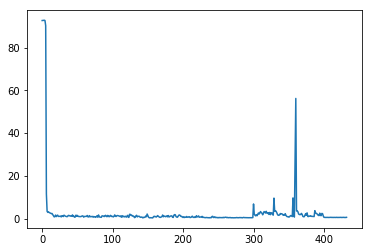

agent_value: 1.0
input_value: 0.998818253089
output_value: 1.00050895891
mean diff: 0.576
mean o_gate_shared: 0.7270550678371908
mean o_gate_non: 1.0


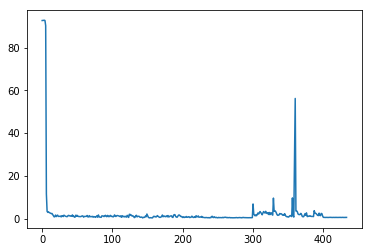

agent_value: 1.0
input_value: 1.00050424712
output_value: 0.999122124823
mean diff: 0.544
mean o_gate_shared: 0.7289719626168224
mean o_gate_non: 1.0


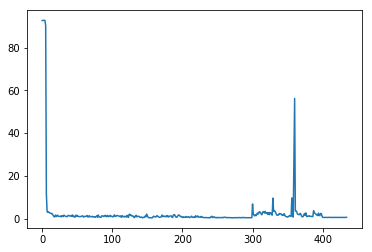

agent_value: 1.0
input_value: 1.00132450543
output_value: 0.997448971994
mean diff: 0.588
mean o_gate_shared: 0.7332446808510639
mean o_gate_non: 1.0


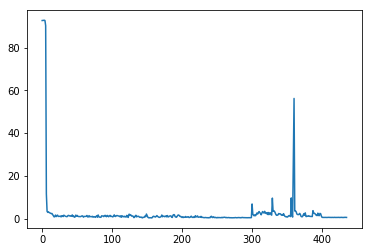

agent_value: 1.0
input_value: 1.00039585232
output_value: 0.999598595681
mean diff: 0.528
mean o_gate_shared: 0.7407706817569388
mean o_gate_non: 1.0


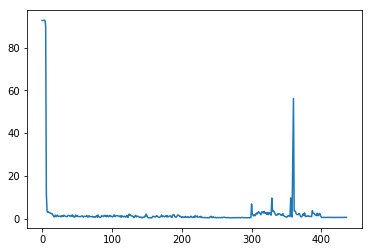

agent_value: 1.0
input_value: 1.00088063885
output_value: 0.999850974817
mean diff: 0.54
mean o_gate_shared: 0.7258964143426295
mean o_gate_non: 1.0


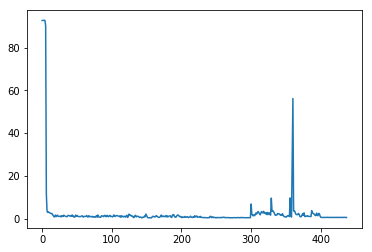

agent_value: 1.0
input_value: 1.00030118272
output_value: 1.00084943125
mean diff: 0.5
mean o_gate_shared: 0.7313950386769805
mean o_gate_non: 1.0


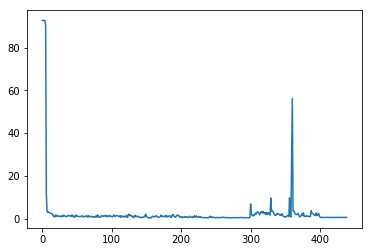

agent_value: 1.0
input_value: 1.0057898367
output_value: 1.00684243203
mean diff: 0.55
mean o_gate_shared: 0.718583599574015
mean o_gate_non: 1.0


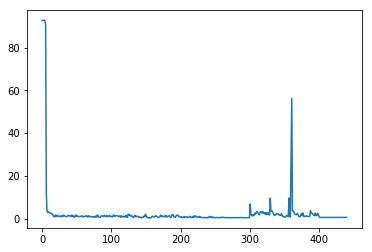

agent_value: 1.0
input_value: 0.998669455583
output_value: 1.00207884744
mean diff: 0.56
mean o_gate_shared: 0.7272014632871701
mean o_gate_non: 1.0


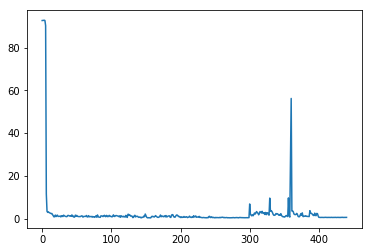

agent_value: 1.0
input_value: 0.998737342711
output_value: 0.999422742596
mean diff: 0.554
mean o_gate_shared: 0.7452400107267364
mean o_gate_non: 1.0


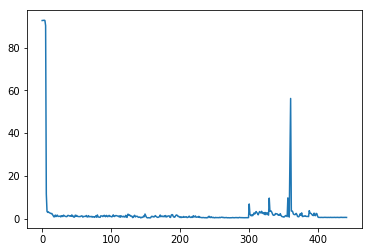

agent_value: 1.0
input_value: 1.00200072323
output_value: 0.998957616578
mean diff: 0.524
mean o_gate_shared: 0.7367717797969
mean o_gate_non: 1.0


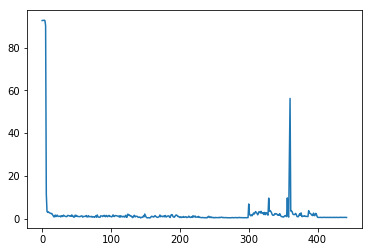

agent_value: 1.0
input_value: 0.998654012088
output_value: 1.00141617704
mean diff: 0.508
mean o_gate_shared: 0.7277613544746036
mean o_gate_non: 1.0


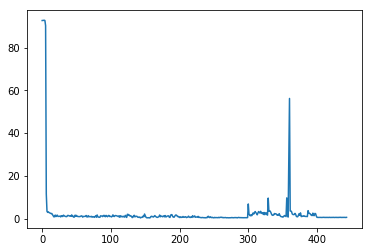

agent_value: 1.0
input_value: 0.998068695063
output_value: 1.00393333725
mean diff: 0.562
mean o_gate_shared: 0.7319285142704721
mean o_gate_non: 1.0


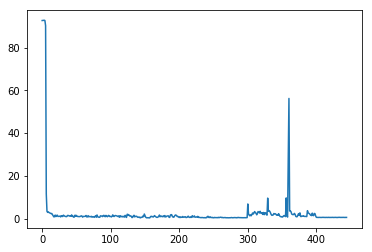

agent_value: 1.0
input_value: 1.0006944989
output_value: 1.00035313671
mean diff: 0.538
mean o_gate_shared: 0.7413885898815931
mean o_gate_non: 1.0


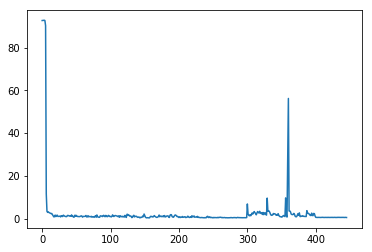

agent_value: 1.0
input_value: 0.999307623857
output_value: 1.00038516551
mean diff: 0.494
mean o_gate_shared: 0.7376344086021506
mean o_gate_non: 1.0


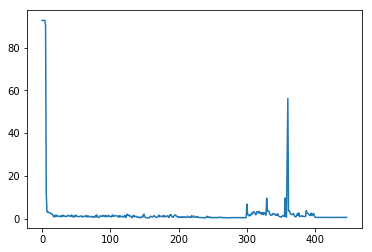

agent_value: 1.0
input_value: 0.999410688714
output_value: 1.00018494347
mean diff: 0.598
mean o_gate_shared: 0.7257158148247257
mean o_gate_non: 1.0


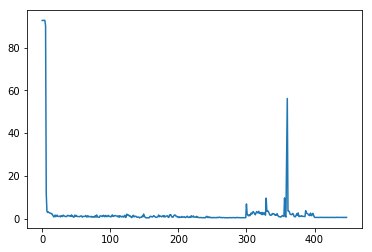

agent_value: 1.0
input_value: 0.998987564789
output_value: 0.998007799366
mean diff: 0.544
mean o_gate_shared: 0.7356722013926085
mean o_gate_non: 1.0


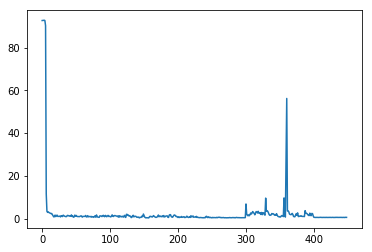

agent_value: 1.0
input_value: 0.997211948047
output_value: 1.00274221724
mean diff: 0.56
mean o_gate_shared: 0.7311914323962517
mean o_gate_non: 1.0


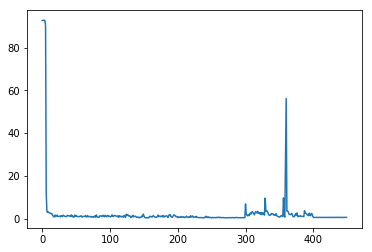

agent_value: 1.0
input_value: 0.99971190631
output_value: 0.998337021074
mean diff: 0.56
mean o_gate_shared: 0.733615221987315
mean o_gate_non: 1.0


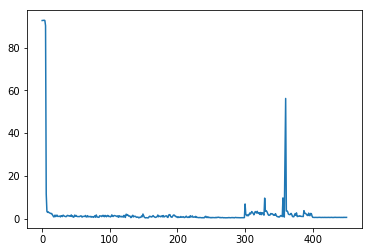

agent_value: 1.0
input_value: 0.997262903122
output_value: 0.99757799237
mean diff: 0.554
mean o_gate_shared: 0.7258021029927204
mean o_gate_non: 1.0


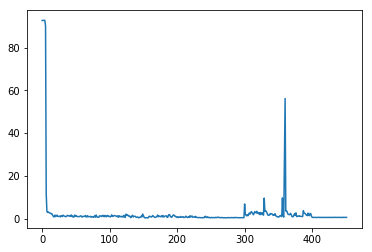

agent_value: 1.0
input_value: 0.999746911657
output_value: 0.99944266992
mean diff: 0.55
mean o_gate_shared: 0.732765504391802
mean o_gate_non: 1.0


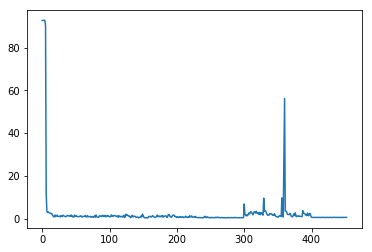

agent_value: 1.0
input_value: 1.00107774612
output_value: 0.998514279565
mean diff: 0.556
mean o_gate_shared: 0.7454301075268818
mean o_gate_non: 1.0


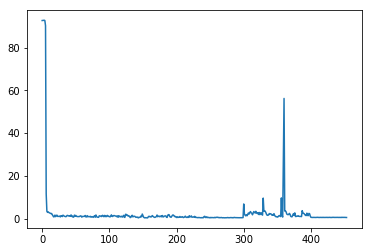

agent_value: 1.0
input_value: 0.999072715
output_value: 0.999796283884
mean diff: 0.5
mean o_gate_shared: 0.7315689981096408
mean o_gate_non: 1.0


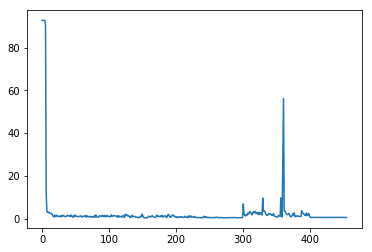

agent_value: 1.0
input_value: 0.998044502398
output_value: 0.99775715034
mean diff: 0.512
mean o_gate_shared: 0.7334588488434642
mean o_gate_non: 1.0


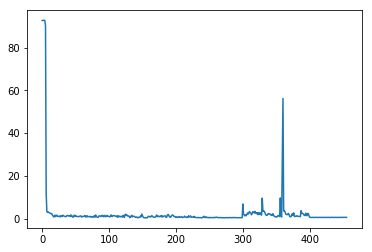

agent_value: 1.0
input_value: 1.00360104545
output_value: 1.00232230042
mean diff: 0.554
mean o_gate_shared: 0.7304092003209415
mean o_gate_non: 1.0


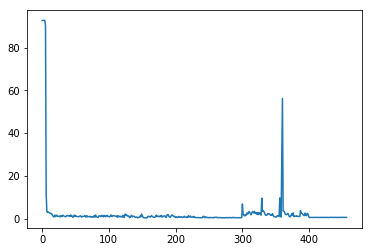

agent_value: 1.0
input_value: 1.00245658031
output_value: 0.997550707336
mean diff: 0.538
mean o_gate_shared: 0.7334568554790895
mean o_gate_non: 1.0


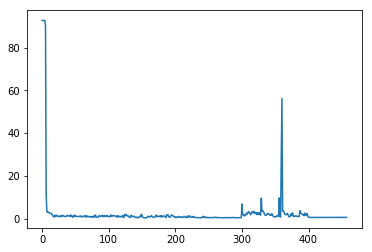

agent_value: 1.0
input_value: 0.999711443688
output_value: 1.00090007247
mean diff: 0.59
mean o_gate_shared: 0.7332630469161835
mean o_gate_non: 1.0


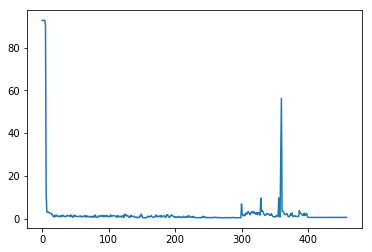

agent_value: 1.0
input_value: 0.999592086095
output_value: 0.99773400073
mean diff: 0.56
mean o_gate_shared: 0.7327127659574468
mean o_gate_non: 1.0


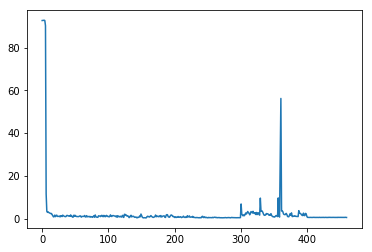

agent_value: 1.0
input_value: 1.00009182739
output_value: 0.999110925283
mean diff: 0.51
mean o_gate_shared: 0.7292002147074611
mean o_gate_non: 1.0


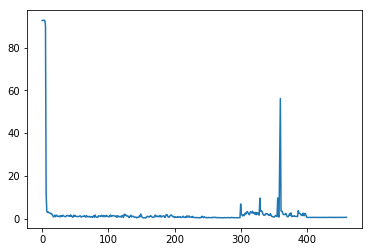

agent_value: 1.0
input_value: 1.00001064564
output_value: 1.00070503346
mean diff: 0.552
mean o_gate_shared: 0.7293233082706767
mean o_gate_non: 1.0


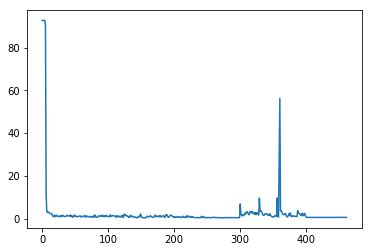

agent_value: 1.0
input_value: 0.999757827149
output_value: 0.996554983938
mean diff: 0.498
mean o_gate_shared: 0.744352909912304
mean o_gate_non: 1.0


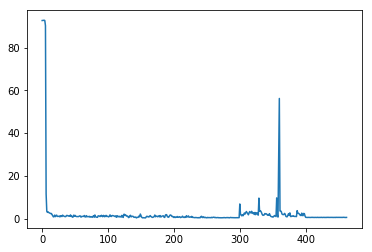

agent_value: 1.0
input_value: 0.999634301975
output_value: 0.99930425387
mean diff: 0.538
mean o_gate_shared: 0.7299867899603699
mean o_gate_non: 1.0


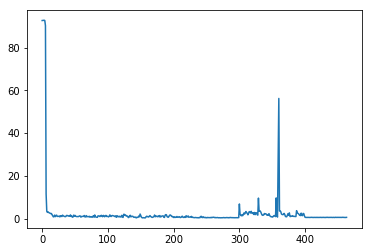

agent_value: 1.0
input_value: 1.00066397884
output_value: 1.0006181387
mean diff: 0.562
mean o_gate_shared: 0.7331717824448034
mean o_gate_non: 1.0


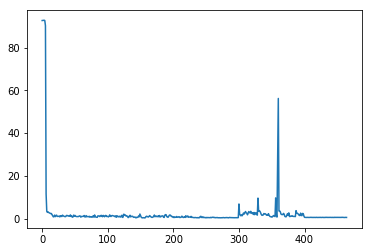

agent_value: 1.0
input_value: 1.00000321542
output_value: 0.998898102021
mean diff: 0.528
mean o_gate_shared: 0.7334047109207709
mean o_gate_non: 1.0


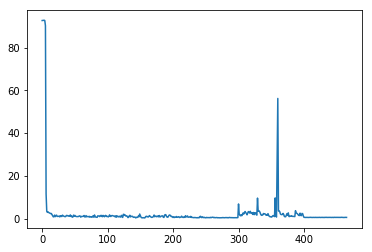

agent_value: 1.0
input_value: 1.00073901198
output_value: 1.00077319945
mean diff: 0.542
mean o_gate_shared: 0.7421317111875165
mean o_gate_non: 1.0


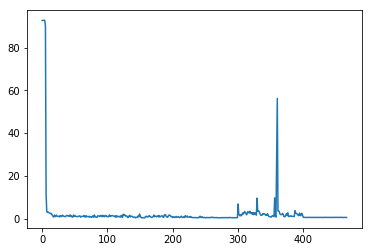

agent_value: 1.0
input_value: 1.00206895264
output_value: 1.002751356
mean diff: 0.498
mean o_gate_shared: 0.7239066273141938
mean o_gate_non: 1.0


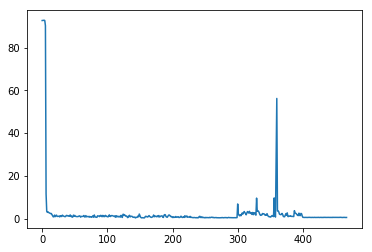

agent_value: 1.0
input_value: 1.00094699769
output_value: 1.00020074838
mean diff: 0.516
mean o_gate_shared: 0.7223749312809236
mean o_gate_non: 1.0


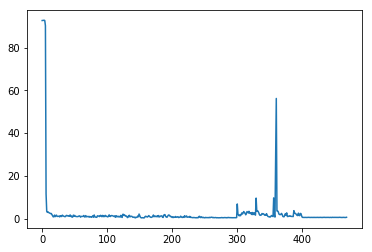

agent_value: 1.0
input_value: 1.0011118351
output_value: 1.00167853701
mean diff: 0.598
mean o_gate_shared: 0.7352708058124174
mean o_gate_non: 1.0


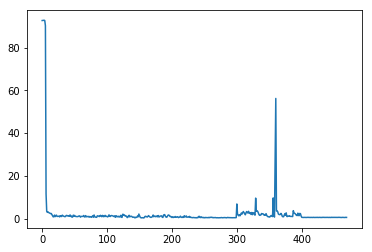

agent_value: 1.0
input_value: 0.997081633836
output_value: 0.997329785109
mean diff: 0.538
mean o_gate_shared: 0.7226510513707746
mean o_gate_non: 1.0


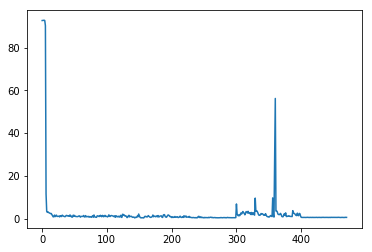

agent_value: 1.0
input_value: 1.00077363117
output_value: 1.00123378555
mean diff: 0.552
mean o_gate_shared: 0.7237886668491651
mean o_gate_non: 1.0


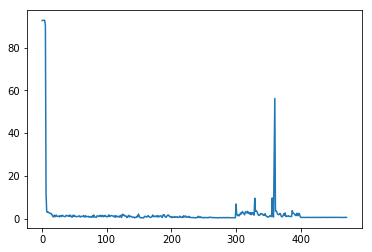

agent_value: 1.0
input_value: 1.00008459859
output_value: 0.998526584256
mean diff: 0.538
mean o_gate_shared: 0.7337765957446809
mean o_gate_non: 1.0


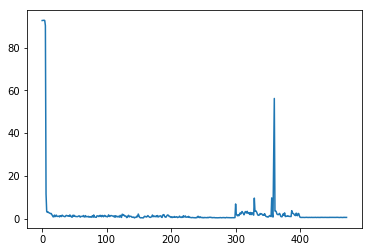

agent_value: 1.0
input_value: 1.0012391169
output_value: 0.998967813196
mean diff: 0.54
mean o_gate_shared: 0.7343961091596866
mean o_gate_non: 1.0


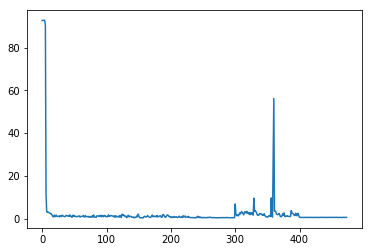

agent_value: 1.0
input_value: 1.00130931218
output_value: 1.00219638581
mean diff: 0.548
mean o_gate_shared: 0.736272439281943
mean o_gate_non: 1.0


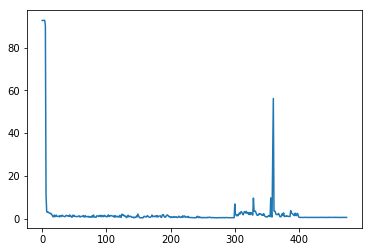

agent_value: 1.0
input_value: 0.998680525703
output_value: 0.999109743
mean diff: 0.526
mean o_gate_shared: 0.7314987977558108
mean o_gate_non: 1.0


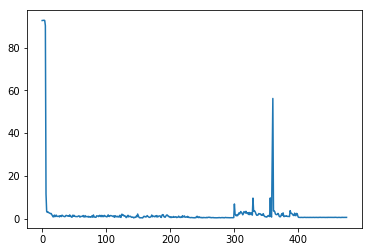

agent_value: 1.0
input_value: 1.00069911187
output_value: 0.999413267936
mean diff: 0.55
mean o_gate_shared: 0.7326116373477672
mean o_gate_non: 1.0


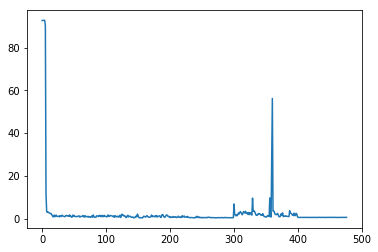

agent_value: 1.0
input_value: 0.999425738022
output_value: 0.999869494827
mean diff: 0.564
mean o_gate_shared: 0.7372836916622968
mean o_gate_non: 1.0


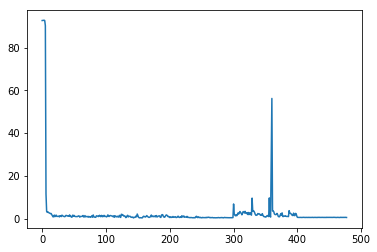

agent_value: 1.0
input_value: 0.999303483294
output_value: 1.00180636738
mean diff: 0.508
mean o_gate_shared: 0.7383426592059685
mean o_gate_non: 1.0


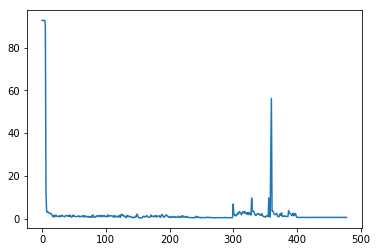

agent_value: 1.0
input_value: 1.00082180654
output_value: 1.00060637401
mean diff: 0.52
mean o_gate_shared: 0.7332981251650383
mean o_gate_non: 1.0


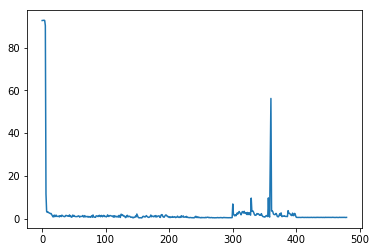

agent_value: 1.0
input_value: 1.00366127952
output_value: 0.999871241044
mean diff: 0.55
mean o_gate_shared: 0.7232502011263073
mean o_gate_non: 1.0


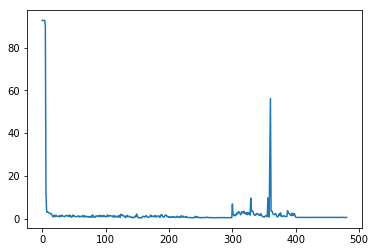

agent_value: 1.0
input_value: 0.998495491369
output_value: 1.00278816887
mean diff: 0.538
mean o_gate_shared: 0.7302100161550888
mean o_gate_non: 1.0


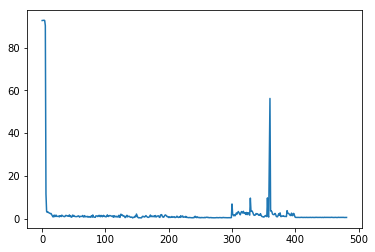

agent_value: 1.0
input_value: 1.0011316281
output_value: 0.998231645257
mean diff: 0.524
mean o_gate_shared: 0.7374331550802139
mean o_gate_non: 1.0


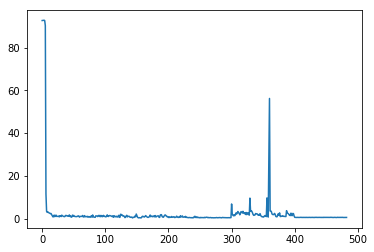

agent_value: 1.0
input_value: 0.998991393738
output_value: 1.00141518782
mean diff: 0.528
mean o_gate_shared: 0.7367576243980738
mean o_gate_non: 1.0


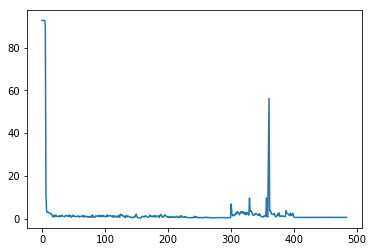

agent_value: 1.0
input_value: 1.00014649781
output_value: 1.00035390579
mean diff: 0.578
mean o_gate_shared: 0.7367156208277703
mean o_gate_non: 1.0


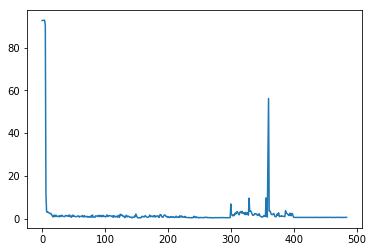

agent_value: 1.0
input_value: 0.999323033254
output_value: 0.999184903585
mean diff: 0.564
mean o_gate_shared: 0.7426373043247546
mean o_gate_non: 1.0


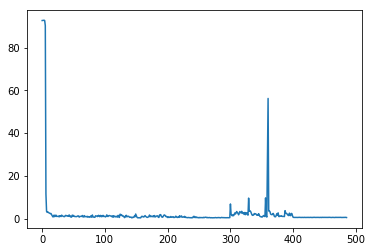

agent_value: 1.0
input_value: 1.00041502554
output_value: 0.998337852334
mean diff: 0.484
mean o_gate_shared: 0.737869341284901
mean o_gate_non: 1.0


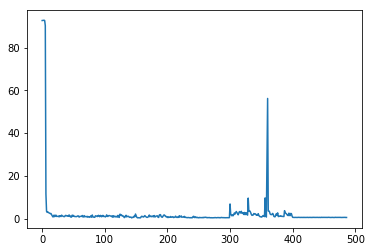

agent_value: 1.0
input_value: 0.99734169942
output_value: 0.996854462265
mean diff: 0.512
mean o_gate_shared: 0.7333156075511832
mean o_gate_non: 1.0


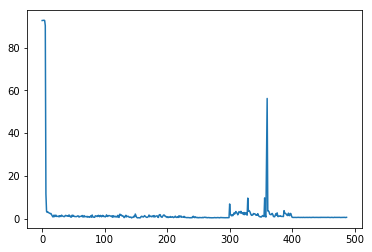

agent_value: 1.0
input_value: 0.998273156808
output_value: 0.997583489889
mean diff: 0.57
mean o_gate_shared: 0.7447319285142705
mean o_gate_non: 1.0


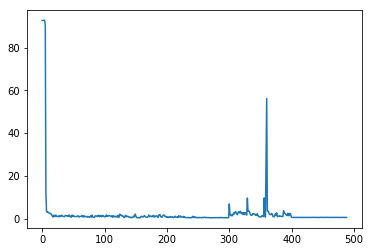

agent_value: 1.0
input_value: 0.999776941856
output_value: 1.00055053809
mean diff: 0.504
mean o_gate_shared: 0.7329560765292374
mean o_gate_non: 1.0


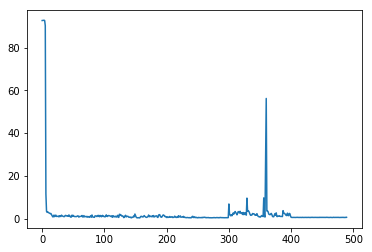

agent_value: 1.0
input_value: 1.00097534974
output_value: 0.998766372013
mean diff: 0.594
mean o_gate_shared: 0.7344632768361582
mean o_gate_non: 1.0


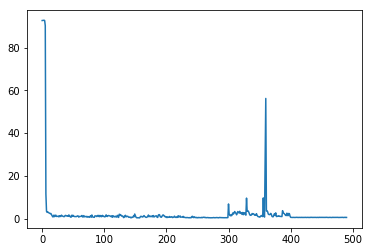

agent_value: 1.0
input_value: 1.00283896037
output_value: 1.00401870125
mean diff: 0.526
mean o_gate_shared: 0.735828586927041
mean o_gate_non: 1.0


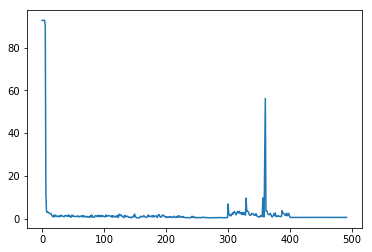

agent_value: 1.0
input_value: 0.99789596416
output_value: 0.999774540391
mean diff: 0.536
mean o_gate_shared: 0.7244897959183674
mean o_gate_non: 1.0


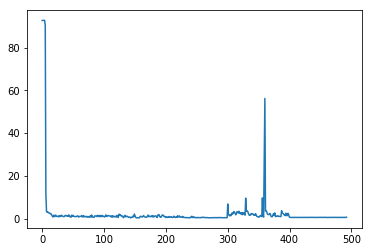

agent_value: 1.0
input_value: 0.999260710986
output_value: 1.00014986154
mean diff: 0.628
mean o_gate_shared: 0.7298365840801265
mean o_gate_non: 1.0


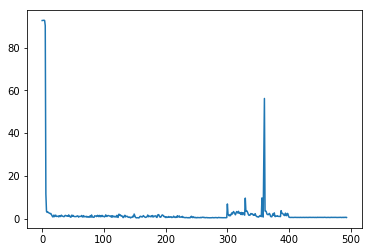

agent_value: 1.0
input_value: 1.00149865478
output_value: 0.999335796231
mean diff: 0.506
mean o_gate_shared: 0.7330634278002699
mean o_gate_non: 1.0


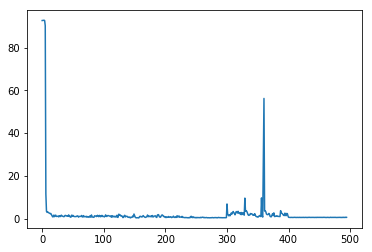

agent_value: 1.0
input_value: 0.998957135228
output_value: 1.00018438264
mean diff: 0.574
mean o_gate_shared: 0.7201810436634718
mean o_gate_non: 1.0


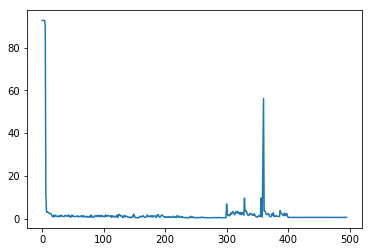

agent_value: 1.0
input_value: 1.00016840879
output_value: 0.999179228959
mean diff: 0.554
mean o_gate_shared: 0.7479892761394102
mean o_gate_non: 1.0


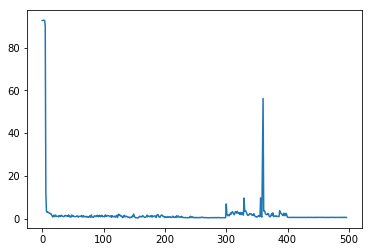

agent_value: 1.0
input_value: 1.0033689436
output_value: 1.00541868237
mean diff: 0.494
mean o_gate_shared: 0.725583864118896
mean o_gate_non: 1.0


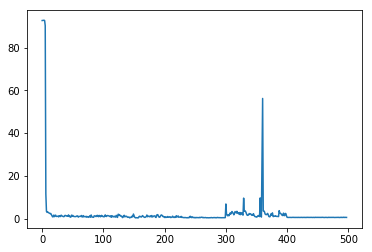

agent_value: 1.0
input_value: 0.997068603278
output_value: 1.00378345473
mean diff: 0.536
mean o_gate_shared: 0.7322042868483726
mean o_gate_non: 1.0


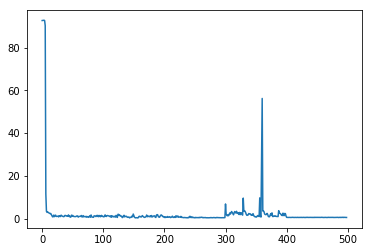

agent_value: 1.0
input_value: 1.00087147576
output_value: 1.00142417602
mean diff: 0.514
mean o_gate_shared: 0.7274436090225563
mean o_gate_non: 1.0


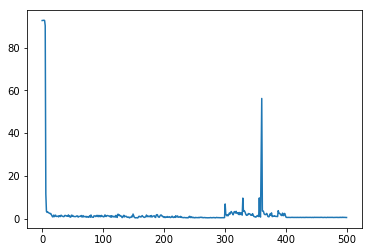

agent_value: 1.0
input_value: 1.00193640369
output_value: 1.00301177804
mean diff: 0.498
mean o_gate_shared: 0.7197400487408611
mean o_gate_non: 1.0


In [13]:
LTM_obj2, agent2, i_gate2, o_gate2, WM2 = IO_gate_model([5,5],500000,1000)

In [14]:
WM_Objs = [LTM_obj2, agent2, i_gate2, o_gate2, WM2]

In [ ]:
Testing_Phase(WM_Objs,[5,5],5000,100)

# Testing Stuff

In [ ]:
n = 10
LTM_obj = hrr.LTM(n,True)
#agent = gate.Q_learning(n,LTM_obj,epsilon=0.05,bias=1)
agent = gate.Q_learning(n,LTM_obj,epsilon=0.01,bias=1)

In [ ]:
agent.get_weights()

In [ ]:
W = hrr.hrr(n)

In [ ]:
agent2 = gate.Q_learning(n,LTM_obj,epsilon=0.01,bias=1, W=W)

In [ ]:
agent2.get_weights()

In [ ]:
agent3 = gate.Q_learning(n,LTM_obj,epsilon=0.01,bias=1)

In [ ]:
my_W = agent3.get_weights()
print(my_W)

In [ ]:
fname = "weight_test.txt"
datalist = my_W
store_weights(fname,datalist)

In [ ]:
new_W = load_weights(fname)

In [ ]:
new_W

In [ ]:
new_W[0]

In [ ]:
a=2
b=3

# Transfer Task

In [15]:
def Transfer_Task(WM_Objs,state_size,nepisodes,stat_window):
    n = 128
    nagent_actions = 4
    gate_actions = 2
    ncolors = 3
    nslots = 1
    nroles = 1
    nrolestates = 2
    Closed,Open = 0,1
    agent_actions = ['up','down','left','right']
    colors = ['red','green','purple',''] # external colors
    nothing = len(colors)-1
    #wm_colors = ['wm_red','wm_green',''] # internal colors
    roles = ['role_avail','role_unavail']
    gate_actions = ['closed','open']
    gateclosed = 'gateclosed'
    gateopen = 'gateopen'
    
    nrows,ncols = state_size
    state_table = state_machine.state_machine.generate_state_table_bottle(nrows,ncols)
    
    #WA = load_weights("IO_Model_agent_weights.txt")
    #WI = load_weights("IO_Model_input_weights.txt")
    #WO = load_weights("IO_Model_output_weights.txt")
    
    LTM_obj = WM_Objs[0]
    #agent = gate.Q_learning(n,LTM_obj,epsilon=0.05,bias=1)
    agent = WM_Objs[1]
    i_gate = WM_Objs[2]
    o_gate = WM_Objs[3]
    WM = WM_Objs[4]
    s_mac = state_machine.state_machine(state_table)
    nsteps = 100
    goal = [ [0,0],[0,ncols-1],[0,2] ]
    value_function = np.zeros((nrows,ncols)) # store Q values for statitics
     # track performance
    opt_array = []
    diff_array = []
    t1 = ""
    
    handhold = 400000
    anneal = 500000
    
    o_gate_correct = 0 # stats for output gate
    o_gate_total = 0 # stats for output gate
    o_gate_correct_shared = 0
    o_gate_correct_non = 0
    shared_total = 0
    non_total = 0
    o_gate_stat = []
    mean_o_gate = []
    
    for episode in range(nepisodes):
        
        count = 0
        #t1 = str(count)
        t1 = "t1"
        row = random.randrange(2,nrows) # get random row for state (in shared area)
        col = random.randrange(0,ncols) # get random col for state
        cur_loc = [row,col] # current location of agent
        color_signal = random.randrange(0,ncolors) # get random color
        color = color_signal # used for reward because color signal may change
        #r = reward(cur_loc,colors[color],state_size) if color!=nothing else 0
        
        if episode == anneal:
            agent.epsilon,i_gate.epsilon,o_gate.epsilon = 0,0,0
        #optimal_steps = optimal_path_length(cur_loc,color_signal) # get optimal steps to goal 
        optimal_steps = optimal_path_length_bottle(cur_loc,color_signal) # get optimal steps to goal 
        state = (state_table[row][col])["state"] # current state
        
        role_i = 0 if color_signal!=nothing else 1
        slot = 0
        igate_restrict = [0,1] # restricted set 
        #ogate_restrict = [0,1] # restricted set
        ogate_restrict = [0,1] # restricted set
        #igate_restrict = [1] if episode < 20000 else [0,1] # hand holding
        #ogate_restrict = [1] if episode < handhold else [0,1] # hand holding
        '''
        if episode < handhold: # hand holding
            ogate_restrict = [0] if row >= 2 else [1]
        else:
            ogate_restrict = [0,1]
        '''
        
        WM.flush_all_wm_maint()
        #print("cue:",colors[color_signal])
        #print("role_i:",roles[role_i])
        i_gate_input = roles[role_i]+'*'+state+'*'+t1
        LTM_obj.encode(i_gate_input)
        i_gate_state,i_value,i_max,i_input,i_values = i_gate.action(i_gate_input,gate_actions,igate_restrict)
        WM.wm_in_flow(i_gate_state,slot,color_signal) # control flow of wm contents
        #print("i_gate:",i_gate_state)
        #print("wm_in:",WM.get_one_wm_maint(slot))
        role_o = 1 if WM.wm_maint_slot_is_empty(slot) else 0
        #print("role_o:",roles[role_o])
        o_gate_input = roles[role_o]+'*'+state+'*'+t1
        LTM_obj.encode(o_gate_input)
        o_gate_state,o_value,o_max,o_input,o_values = o_gate.action(o_gate_input,gate_actions,ogate_restrict)
        WM.wm_out_flow(o_gate_state,slot) # wm out contents for given slots
        wm_out = WM.get_one_wm_output(slot)
        #print("o_gate:",o_gate_state)
        #print("wm_out:",WM.get_one_wm_output(slot))
        #print("\n\n")
        
        if o_gate_state == Closed:
            agent_input = gateclosed+'*'+colors[color_signal]+'*'+state+'*'+wm_out+'*'+t1
            LTM_obj.encode(agent_input)
        else:
            agent_input = colors[color_signal]+'*'+state+'*'+wm_out+'*'+t1
            LTM_obj.encode(agent_input)
        
        #agent_input = colors[color_signal]+'*'+state+'*'+wm_out+'*'+t1
        action_restrict = (state_table[row][col])["action_restrict"]# get restricted action set
        action,a_value,a_max,a_input,a_values = agent.action(agent_input,agent_actions,action_restrict) # agent action
        #print("agent_value: ",a_value)
        #print("input_value: ",i_value)
        #print("output_value:",o_value)
        
        o_gate_correct_shared += 1 if o_gate_state == Closed else 0
        shared_total += 1
        
        i_gate.set_eligibility_zero()
        o_gate.set_eligibility_zero()
        agent.set_eligibility_zero() # set eligibility trace to zero
        WM.flush_all_wm_output()
        count += 1
        for step in range(nsteps):
            
            #t1 = str(count)
            t1 = ''
            r = reward(cur_loc,colors[color],state_size) if color!=nothing else 0
            #r = punishment(cur_loc,colors[color],state_size) if color!=nothing else -1
            #print(state)
            if color!=nothing and cur_loc == goal[color]:
                i_gate.eligibility_trace_update(i_input)
                o_gate.eligibility_trace_update(o_input)
                agent.eligibility_trace_update(a_input)
                i_gate.td_update_goal(r,i_value)
                o_gate.td_update_goal(r,o_value)
                agent.td_update_goal(r,a_value)
                #print('goal!!!')
                break
                
            p_a_input = agent_input
            p_i_input = i_gate_input
            p_o_input = o_gate_input
            p_a_action = action
            p_i_action = i_gate_state
            p_o_action = o_gate_state
            p_action_restrict = action_restrict
            p_igate_restrict = igate_restrict
            p_ogate_restrict = ogate_restrict
        
            p_loc = cur_loc
            p_i_value = i_value # Q val for input gate
            p_i_max = i_max
            p_o_value = o_value # Q val for output gate
            p_o_max = o_max
            p_a_value = a_value # Q val for agent
            p_a_max = a_max
            
            # update eligibility traces
            i_gate.eligibility_trace_update(i_input)
            o_gate.eligibility_trace_update(o_input)
            agent.eligibility_trace_update(a_input)
            # move agent
            state,cur_loc = s_mac.move(p_loc,action)
            row,col = cur_loc[0],cur_loc[1]
            color_signal = 2 # turn off cue
            
            role_i = 0 if color_signal!=nothing else 1
            igate_restrict = [0] # restricted set 
            ogate_restrict = [0,1] # restricted set
            #ogate_restrict = [1] if episode < handhold else [0,1] # hand holding
            '''
            if episode < handhold: # hand holding
                ogate_restrict = [0] if row >= 2 else [1]
            else:
                ogate_restrict = [0,1]
            '''
            #
            #print("cue:",colors[color_signal])
            #print("role_i:",roles[role_i])
            i_gate_input = roles[role_i]+'*'+state+'*'+t1
            LTM_obj.encode(i_gate_input)
            i_gate_state,i_value,i_max,i_input,i_values = i_gate.action(i_gate_input,gate_actions,igate_restrict)
            #print("i_gate:",i_gate_state)
            WM.wm_in_flow(i_gate_state,slot,color_signal) # control flow of wm contents
            #print("wm_in:",WM.get_one_wm_maint(slot))
            role_o = 1 if WM.wm_maint_slot_is_empty(slot) else 0
            o_gate_input = roles[role_o]+'*'+state+'*'+t1
            LTM_obj.encode(o_gate_input)
            o_gate_state,o_value,o_max,o_input,o_values = o_gate.action(o_gate_input,gate_actions,ogate_restrict)
            #print("role_o:",roles[role_o])
            #print("o_gate:",o_gate_state)
            WM.wm_out_flow(o_gate_state,slot) # wm out contents for given slots
            wm_out = WM.get_one_wm_output(slot)
            #print("wm_out:",wm_out)
            #print("\n\n")
            
            if o_gate_state == Closed:
                agent_input = gateclosed+'*'+colors[color_signal]+'*'+state+'*'+wm_out+'*'+t1
                LTM_obj.encode(agent_input)
            else:
                agent_input = colors[color_signal]+'*'+state+'*'+wm_out+'*'+t1
                LTM_obj.encode(agent_input)
            
            #agent_input = colors[color_signal]+'*'+state+'*'+wm_out
            action_restrict = (state_table[row][col])["action_restrict"]# get restricted action set
            action,a_value,a_max,a_input,a_values = agent.action(agent_input,agent_actions,action_restrict) # agent action
            # ----------------------------------
            # Bias gates to stay in a state for long periods of time
            
            a_beta = 0
            '''
            if a_value > 0:
                if p_a_action == action:
                    a_beta = 0
                else:
                    a_beta = 1
            else:
                if p_a_action == action:
                    a_beta = 1
                else:
                    a_beta = 0
            '''
            o_beta = 0
            '''
            if a_value > 0:
                if p_o_action == o_gate_state:
                    o_beta = 0
                else:
                    o_beta = 1
            else:
                if p_o_action == o_gate_state:
                    o_beta = 1
                else:
                    o_beta = 0
            '''       
            i_beta = 0
            '''
            if a_value > 0:
                if p_i_action == i_gate_state:
                    i_beta = 0
                else:
                    i_beta = 1
            else:
                if p_i_action == i_gate_state:
                    i_beta = 1
                else:
                    i_beta = 0
            '''
            # -------------------------------------
            if row >= 2:
                o_gate_correct_shared += 1 if o_gate_state == Closed else 0
                shared_total += 1
            else:
                o_gate_correct_non += 1 if o_gate_state == Open else 0
                non_total += 1
            
            
            '''
            agent.td_update(r,a_value,p_a_value)
            o_gate.td_update(r,a_value,p_o_value)
            i_gate.td_update(r,a_value,p_i_value)
            '''
            
            agent.td_update_transfer(r,a_value,p_a_value,a_beta)
            o_gate.td_update_transfer(r,a_value,p_o_value,o_beta)
            i_gate.td_update_transfer(r,a_value,p_i_value,i_beta)
            
            
            WM.flush_all_wm_output()
            count += 1
        if color != nothing:    
            step_diff = abs(step-optimal_steps)
            #print(step_diff)
            opt_array.append(step_diff)
        if (episode+1)%stat_window == 0:
            # print performance
            mean_diff = sum(opt_array)/len(opt_array)
            diff_array.append(mean_diff)
            plt.plot(diff_array)
            plt.show()
            opt_array = []
            print("agent_value:",a_value)
            print("input_value:",i_value)
            print("output_value:",o_value)
            print("mean diff:",mean_diff)
            ###################
            if shared_total > 0:
                print("mean o_gate_shared:",o_gate_correct_shared/shared_total)
            if non_total > 0:
                print("mean o_gate_non:",o_gate_correct_non/non_total)
            o_gate_correct_shared = 0
            o_gate_correct_non = 0
            shared_total = 0
            non_total = 0
            o_gate_total = 0
    fname = "IO_model_TransferTask_handheld_error.dat"
    store_weights(fname,diff_array) # stores error points to file
    #WA,fname1 = agent.get_weights(), "IO_Model_agent_weights_Transfer.txt" # agent weights
    #WO,fname2 = o_gate.get_weights(), "IO_Model_output_weights_Transfer.txt"# output gate weights
    #WI,fname3 = i_gate.get_weights(), "IO_Model_input_weights_Transfer.txt"# input gate weights
    #store_weights(fname1,WA) # store agent weights
    #store_weights(fname2,WO) # store output gate weights
    #store_weights(fname3,WI) # store input gate weights
    return LTM_obj, agent, i_gate, o_gate, WM

# Baseline for transfer task

In [16]:
def IO_gate_model_transfer_baseline(state_size,nepisodes,stat_window):
    n = 1024
    nagent_actions = 4
    gate_actions = 2
    ncolors = 3
    nslots = 1
    nroles = 1
    nrolestates = 2
    Closed,Open = 0,1
    agent_actions = ['up','down','left','right']
    colors = ['red','green','purple',''] # external colors
    nothing = len(colors)-1
    #wm_colors = ['wm_red','wm_green',''] # internal colors
    roles = ['role_avail','role_unavail']
    gate_actions = ['closed','open']
    gateclosed = 'gateclosed'
    gateopen = 'gateopen'
    
    nrows,ncols = state_size
    state_table = state_machine.state_machine.generate_state_table_bottle(nrows,ncols)
    
    LTM_obj = hrr.LTM(n,True)
    #agent = gate.Q_learning(n,LTM_obj,epsilon=0.05,bias=1)
    agent = gate.Q_learning(n,LTM_obj,epsilon=0.01,bias=1)
    i_gate = gate.Q_learning(n,LTM_obj,epsilon=0.01,bias=1)
    o_gate = gate.Q_learning(n,LTM_obj,epsilon=0.01,bias=1)
    WM = gate.wm_content(colors,nslots,LTM_obj)
    s_mac = state_machine.state_machine(state_table)
    nsteps = 100
    goal = [ [0,0],[0,ncols-1],[0,2] ]
    value_function = np.zeros((nrows,ncols)) # store Q values for statitics
     # track performance
    opt_array = []
    diff_array = []
    t1 = ""
    
    handhold = 400000
    anneal = 500000
    
    o_gate_correct = 0 # stats for output gate
    o_gate_total = 0 # stats for output gate
    o_gate_correct_shared = 0
    o_gate_correct_non = 0
    shared_total = 0
    non_total = 0
    o_gate_stat = []
    mean_o_gate = []
    
    for episode in range(nepisodes):
        
        count = 0
        #t1 = str(count)
        t1 = "t1"
        row = random.randrange(2,nrows) # get random row for state (in shared area)
        col = random.randrange(0,ncols) # get random col for state
        cur_loc = [row,col] # current location of agent
        color_signal = random.randrange(0,ncolors) # get random color
        color = color_signal # used for reward because color signal may change
        #r = reward(cur_loc,colors[color],state_size) if color!=nothing else 0
        
        if episode == anneal:
            agent.epsilon,i_gate.epsilon,o_gate.epsilon = 0,0,0
        #optimal_steps = optimal_path_length(cur_loc,color_signal) # get optimal steps to goal 
        optimal_steps = optimal_path_length_bottle(cur_loc,color_signal) # get optimal steps to goal 
        #print('color:',colors[color])
        #print('location:',cur_loc)
        #print('optimal_steps:',optimal_steps)
        
        state = (state_table[row][col])["state"] # current state
        
        role_i = 0 if color_signal!=nothing else 1
        slot = 0
        igate_restrict = [0,1] # restricted set 
        ogate_restrict = [0,1] # restricted set
        
        '''
        if episode < handhold: # hand holding
            ogate_restrict = [0] if row >= 2 else [1]
        else:
            ogate_restrict = [0,1]
        '''
        
        WM.flush_all_wm_maint()
        #print("cue:",colors[color_signal])
        #print("role_i:",roles[role_i])
        i_gate_input = roles[role_i]+'*'+state+'*'+t1
        LTM_obj.encode(i_gate_input)
        i_gate_state,i_value,i_max,i_input,i_values = i_gate.action(i_gate_input,gate_actions,igate_restrict)
        WM.wm_in_flow(i_gate_state,slot,color_signal) # control flow of wm contents
        #print("i_gate:",i_gate_state)
        #print("wm_in:",WM.get_one_wm_maint(slot))
        role_o = 1 if WM.wm_maint_slot_is_empty(slot) else 0
        #print("role_o:",roles[role_o])
        o_gate_input = roles[role_o]+'*'+state+'*'+t1
        LTM_obj.encode(o_gate_input)
        o_gate_state,o_value,o_max,o_input,o_values = o_gate.action(o_gate_input,gate_actions,ogate_restrict)
        WM.wm_out_flow(o_gate_state,slot) # wm out contents for given slots
        wm_out = WM.get_one_wm_output(slot)
        #print("o_gate:",o_gate_state)
        #print("wm_out:",WM.get_one_wm_output(slot))
        #print("\n\n")
        
        if o_gate_state == Closed:
            agent_input = gateclosed+'*'+colors[color_signal]+'*'+state+'*'+wm_out+'*'+t1
            LTM_obj.encode(agent_input)
        else:
            agent_input = colors[color_signal]+'*'+state+'*'+wm_out+'*'+t1
            LTM_obj.encode(agent_input)
        
        #agent_input = colors[color_signal]+'*'+state+'*'+wm_out+'*'+t1
        action_restrict = (state_table[row][col])["action_restrict"]# get restricted action set
        action,a_value,a_max,a_input,a_values = agent.action(agent_input,agent_actions,action_restrict) # agent action
        #print("agent_value: ",a_value)
        #print("input_value: ",i_value)
        #print("output_value:",o_value)
        
        o_gate_correct_shared += 1 if o_gate_state == Closed else 0
        shared_total += 1
        
        i_gate.set_eligibility_zero()
        o_gate.set_eligibility_zero()
        agent.set_eligibility_zero() # set eligibility trace to zero
        WM.flush_all_wm_output()
        count += 1
        for step in range(nsteps):
            
            #t1 = str(count)
            t1 = ''
            r = reward(cur_loc,colors[color],state_size) if color!=nothing else 0
            #r = punishment(cur_loc,colors[color],state_size) if color!=nothing else -1
            #print(state)
            if color!=nothing and cur_loc == goal[color]:
                i_gate.eligibility_trace_update(i_input)
                o_gate.eligibility_trace_update(o_input)
                agent.eligibility_trace_update(a_input)
                i_gate.td_update_goal(r,i_value)
                o_gate.td_update_goal(r,o_value)
                agent.td_update_goal(r,a_value)
                #print('goal!!!',cur_loc)
                #print()
                break
                
            p_a_input = agent_input
            p_i_input = i_gate_input
            p_o_input = o_gate_input
            p_a_action = action
            p_i_action = i_gate_state
            p_o_action = o_gate_state
            p_action_restrict = action_restrict
            p_igate_restrict = igate_restrict
            p_ogate_restrict = ogate_restrict
        
            p_loc = cur_loc
            p_i_value = i_value # Q val for input gate
            p_i_max = i_max
            p_o_value = o_value # Q val for output gate
            p_o_max = o_max
            p_a_value = a_value # Q val for agent
            p_a_max = a_max
            
            # update eligibility traces
            i_gate.eligibility_trace_update(i_input)
            o_gate.eligibility_trace_update(o_input)
            agent.eligibility_trace_update(a_input)
            # move agent
            state,cur_loc = s_mac.move(p_loc,action)
            row,col = cur_loc[0],cur_loc[1]
            color_signal = 2 # turn off cue
            
            role_i = 0 if color_signal!=nothing else 1
            igate_restrict = [0] # restricted set 
            ogate_restrict = [0,1] # restricted set
            #ogate_restrict = [1] if episode < handhold else [0,1] # hand holding
            '''
            if episode < handhold: # hand holding
                ogate_restrict = [0] if row >= 2 else [1]
            else:
                ogate_restrict = [0,1]
            '''
            #
            #print("cue:",colors[color_signal])
            #print("role_i:",roles[role_i])
            i_gate_input = roles[role_i]+'*'+state+'*'+t1
            LTM_obj.encode(i_gate_input)
            i_gate_state,i_value,i_max,i_input,i_values = i_gate.action(i_gate_input,gate_actions,igate_restrict)
            #print("i_gate:",i_gate_state)
            WM.wm_in_flow(i_gate_state,slot,color_signal) # control flow of wm contents
            #print("wm_in:",WM.get_one_wm_maint(slot))
            role_o = 1 if WM.wm_maint_slot_is_empty(slot) else 0
            o_gate_input = roles[role_o]+'*'+state+'*'+t1
            LTM_obj.encode(o_gate_input)
            o_gate_state,o_value,o_max,o_input,o_values = o_gate.action(o_gate_input,gate_actions,ogate_restrict)
            #print("role_o:",roles[role_o])
            #print("o_gate:",o_gate_state)
            WM.wm_out_flow(o_gate_state,slot) # wm out contents for given slots
            wm_out = WM.get_one_wm_output(slot)
            #print("wm_out:",wm_out)
            #print("\n\n")
            
            if o_gate_state == Closed:
                agent_input = gateclosed+'*'+colors[color_signal]+'*'+state+'*'+wm_out+'*'+t1
                LTM_obj.encode(agent_input)
            else:
                agent_input = colors[color_signal]+'*'+state+'*'+wm_out+'*'+t1
                LTM_obj.encode(agent_input)
            
            #agent_input = colors[color_signal]+'*'+state+'*'+wm_out
            action_restrict = (state_table[row][col])["action_restrict"]# get restricted action set
            action,a_value,a_max,a_input,a_values = agent.action(agent_input,agent_actions,action_restrict) # agent action
            # ----------------------------------
            # Bias gates to stay in a state for long periods of time
            
            a_beta = 0
            '''
            if a_value > 0:
                if p_a_action == action:
                    a_beta = 0
                else:
                    a_beta = 1
            else:
                if p_a_action == action:
                    a_beta = 1
                else:
                    a_beta = 0
            '''
            o_beta = 0
            '''
            if a_value > 0:
                if p_o_action == o_gate_state:
                    o_beta = 0
                else:
                    o_beta = 1
            else:
                if p_o_action == o_gate_state:
                    o_beta = 1
                else:
                    o_beta = 0
            '''       
            i_beta = 0
            '''
            if a_value > 0:
                if p_i_action == i_gate_state:
                    i_beta = 0
                else:
                    i_beta = 1
            else:
                if p_i_action == i_gate_state:
                    i_beta = 1
                else:
                    i_beta = 0
            '''
            # -------------------------------------
            if row >= 2:
                o_gate_correct_shared += 1 if o_gate_state == Closed else 0
                shared_total += 1
            else:
                o_gate_correct_non += 1 if o_gate_state == Open else 0
                non_total += 1
            
            
            '''
            agent.td_update(r,a_value,p_a_value)
            o_gate.td_update(r,a_value,p_o_value)
            i_gate.td_update(r,a_value,p_i_value)
            '''
            
            agent.td_update_transfer(r,a_value,p_a_value,a_beta)
            o_gate.td_update_transfer(r,a_value,p_o_value,o_beta)
            i_gate.td_update_transfer(r,a_value,p_i_value,i_beta)
            
            
            WM.flush_all_wm_output()
            count += 1
        #print('step_diff:',abs(step-optimal_steps))
        #print('\n')
        if color != nothing:    
            step_diff = abs(step-optimal_steps)
            #print(step_diff)
            opt_array.append(step_diff)
        if (episode+1)%stat_window == 0:
            # print performance
            mean_diff = sum(opt_array)/len(opt_array)
            diff_array.append(mean_diff)
            plt.plot(diff_array)
            plt.show()
            opt_array = []
            print("agent_value:",a_value)
            print("input_value:",i_value)
            print("output_value:",o_value)
            print("mean diff:",mean_diff)
            ###################
            if shared_total > 0:
                print("mean o_gate_shared:",o_gate_correct_shared/shared_total)
            if non_total > 0:
                print("mean o_gate_non:",o_gate_correct_non/non_total)
            o_gate_correct_shared = 0
            o_gate_correct_non = 0
            shared_total = 0
            non_total = 0
            o_gate_total = 0
    fname = "IO_model_baselineTask_error.dat"
    store_weights(fname,diff_array) # stores error points to file
    #WA,fname1 = agent.get_weights(), "IO_Model_agent_weights.txt" # agent weights
    #WO,fname2 = o_gate.get_weights(), "IO_Model_output_weights.txt"# output gate weights
    #WI,fname3 = i_gate.get_weights(), "IO_Model_input_weights.txt"# input gate weights
    #store_weights(fname1,WA) # store agent weights
    #store_weights(fname2,WO) # store output gate weights
    #store_weights(fname3,WI) # store input gate weights
    return LTM_obj, agent, i_gate, o_gate, WM

# Call Transfer Task

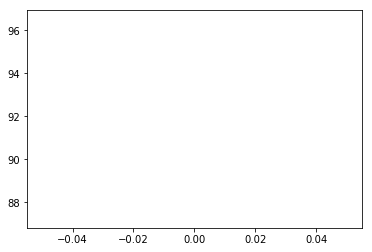

agent_value: 2.19697682363e-06
input_value: -5.84626926919e-06
output_value: 0.0004155818584
mean diff: 91.87
mean o_gate_shared: 0.5886095122690094
mean o_gate_non: 0.46


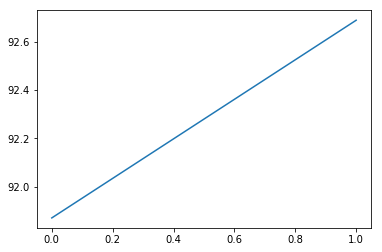

agent_value: 5.06848718995e-06
input_value: -2.45977277935e-07
output_value: -0.000241192256945
mean diff: 92.69
mean o_gate_shared: 0.49558764540714
mean o_gate_non: 0.8243243243243243


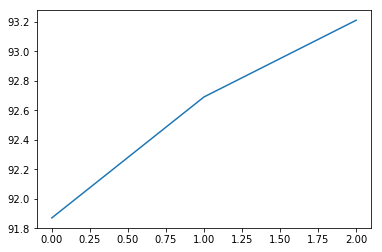

agent_value: 2.4529199249e-05
input_value: -5.66725495814e-05
output_value: 0.000106129379987
mean diff: 93.21
mean o_gate_shared: 0.4771287128712871


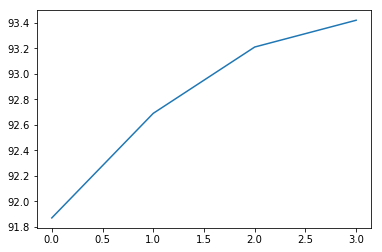

agent_value: -4.82457888443e-06
input_value: 0.000293826713615
output_value: -0.000167338051056
mean diff: 93.42
mean o_gate_shared: 0.4011
mean o_gate_non: 1.0


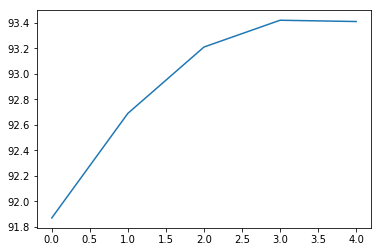

agent_value: 4.79675575189e-06
input_value: -8.9269629858e-05
output_value: -0.000100198807695
mean diff: 93.41
mean o_gate_shared: 0.3963
mean o_gate_non: 1.0


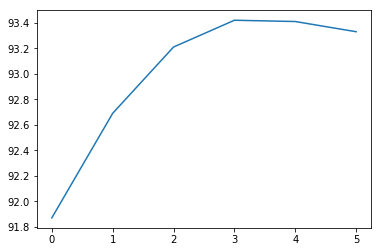

agent_value: 3.54053907414e-07
input_value: 0.000189779980033
output_value: -7.99479164416e-05
mean diff: 93.33
mean o_gate_shared: 0.3971680364392514
mean o_gate_non: 1.0


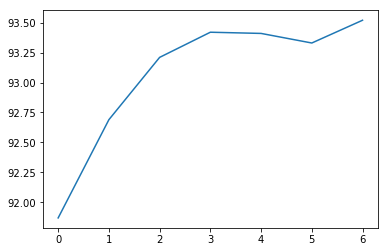

agent_value: -2.51243804187e-06
input_value: 5.57735599257e-05
output_value: -3.00230246578e-05
mean diff: 93.52
mean o_gate_shared: 0.41008120419885125
mean o_gate_non: 1.0


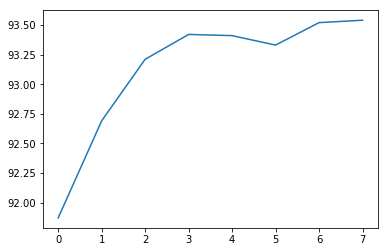

agent_value: -1.70181341241e-09
input_value: -4.94175305334e-05
output_value: -0.000315464397109
mean diff: 93.54
mean o_gate_shared: 0.41839968310556547
mean o_gate_non: 1.0


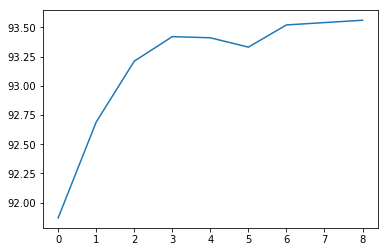

agent_value: -3.67544278266e-06
input_value: 1.21751827703e-05
output_value: 0.000412089240105
mean diff: 93.56
mean o_gate_shared: 0.505941770647653
mean o_gate_non: 1.0


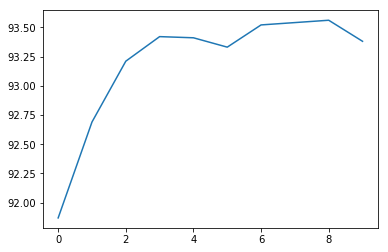

agent_value: 1.19778630898e-06
input_value: -1.20631358299e-05
output_value: -8.90137212051e-06
mean diff: 93.38
mean o_gate_shared: 0.40532778768072886
mean o_gate_non: 1.0


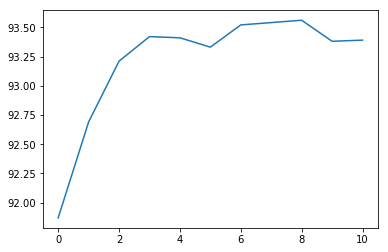

agent_value: -0.000321730637961
input_value: -0.000500497969823
output_value: -0.000143983862984
mean diff: 93.39
mean o_gate_shared: 0.3745023986934776
mean o_gate_non: 0.3465346534653465


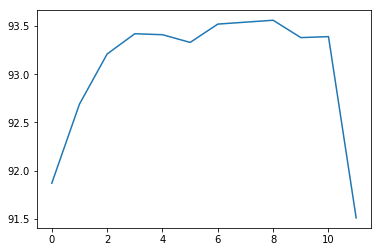

agent_value: 3.99080110006e-05
input_value: 0.000145239708261
output_value: 0.000533060276208
mean diff: 91.51
mean o_gate_shared: 0.31105214817838556
mean o_gate_non: 0.08256880733944955


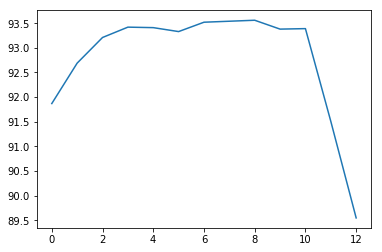

agent_value: 8.75317025233e-06
input_value: 7.64551569488e-05
output_value: -1.41803877601e-05
mean diff: 89.55
mean o_gate_shared: 0.5804123711340207
mean o_gate_non: 1.0


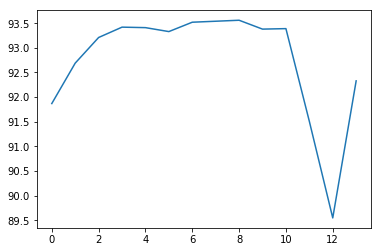

agent_value: -1.58949172183e-06
input_value: 4.02227523283e-05
output_value: -3.12354469152e-05
mean diff: 92.33
mean o_gate_shared: 0.5547
mean o_gate_non: 1.0


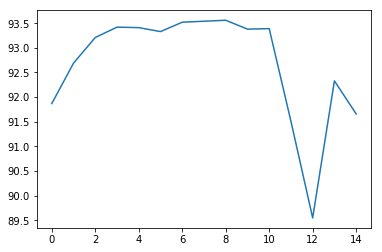

agent_value: -1.23253321405e-05
input_value: 5.47060882362e-05
output_value: 6.78130328933e-05
mean diff: 91.66
mean o_gate_shared: 0.5534343434343434
mean o_gate_non: 1.0


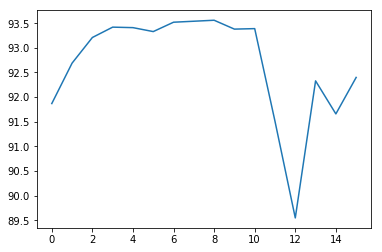

agent_value: 1.1163075559e-06
input_value: -4.30124409906e-06
output_value: -1.75190256697e-05
mean diff: 92.4
mean o_gate_shared: 0.6235
mean o_gate_non: 1.0


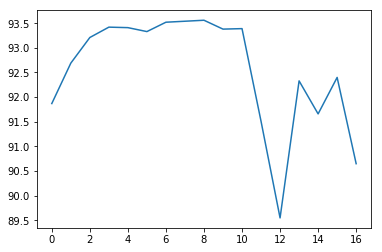

agent_value: 4.92341506855e-06
input_value: -3.94461594287e-05
output_value: -8.22643247852e-05
mean diff: 90.65
mean o_gate_shared: 0.5859183673469388
mean o_gate_non: 1.0


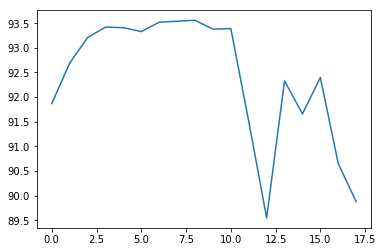

agent_value: -1.55545061375e-06
input_value: 3.72933112003e-05
output_value: -5.22683774103e-05
mean diff: 89.88
mean o_gate_shared: 0.5216494845360825
mean o_gate_non: 1.0


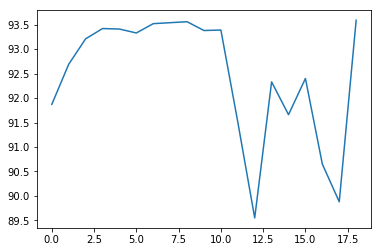

agent_value: 1.53354032778e-06
input_value: -1.81783402162e-06
output_value: 7.6817996479e-06
mean diff: 93.59
mean o_gate_shared: 0.5610891089108911


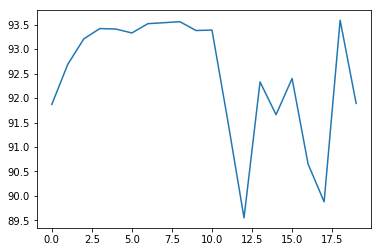

agent_value: -1.80469136579e-07
input_value: 1.26528662092e-06
output_value: 9.09670927313e-06
mean diff: 91.89
mean o_gate_shared: 0.44303030303030305
mean o_gate_non: 1.0


KeyboardInterrupt: 

In [17]:
Transfer_Task(WM_Objs,[5,5],200000,100)

In [ ]:
#LTM_obj3, agent3, i_gate3, o_gate3, WM3 = IO_gate_model_transfer_baseline([5,5],200000,100)

In [ ]:
#WM_Objs2 = [LTM_obj3, agent3, i_gate3, o_gate3, WM3]